In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) { //This functions disables the scroll
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
#Imports
import os
import pandas as pd
import time
from datetime import datetime
import matplotlib.pyplot as plot
import matplotlib.dates as md
import numpy as np
from dateutil import tz #Used to get time zone

from datetime import datetime
import pytz
pst = pytz.timezone('US/Eastern')
r=lambda ts: pytz.UTC.localize(datetime.utcfromtimestamp(ts)).astimezone(pst)

In [3]:
#Constants

TIME_ZONE = tz.gettz('US/Eastern');
SENSOR_DATA_DIR = 'sensor_data'
NO_OF_DIRECTORIES_TO_READ = -1 #-1 will go for all directories except last one
print(TIME_ZONE)
#Dictionary Containting Sensors Constants
dict_vars = {'TEMP': {'filename':'TEMP.csv', 'names':['TEMP'], 'min':24.0, 'max':43.0,'gap':0.24}, # names, min, max
              'IBI':{'filename':'IBI.csv', 'names':['IBI'], 'min':0.6, 'max':1.26},# Experimental
              'HR': {'filename':'HR.csv', 'names':['HR'], 'min':35.0, 'max':200.0},# Experimental
              'EDA':{'filename':'EDA.csv', 'names':['EDA'], 'min':0.0, 'max':20.0},# GSR
              'BVP':{'filename':'BVP.csv', 'names':['BVP'], 'min':35.0, 'max':200.0},#Experimental
              'ACC':{'filename':'ACC.csv', 'names':['ACC_x','ACC_y','ACC_z'], 'min':None, 'max':None}
             }

#Configurations
plot.rcParams['figure.figsize'] = [15, 5]



tzfile('US/Eastern')


In [4]:
#Getting the directories
def get_list_of_folder_names_inside_dir(dir_name):
    """
    Returns the list of paths of folders in side the provided directory
    
    Keyword arguments:
    dir_name -- the name of the folder to find paths in.
    """
    folder_name_list=[]
    for root, dirs, files in os.walk(dir_name):
        folder_name_list.append(root)
        #print(root, end="\n")
        #print(sum(getsize(join(root, name)) for name in files), end=" ")
        #print("bytes in", len(files), "non-directory files")
    return folder_name_list[1:] #Returning names except root directory

#Getting Sensor Data Folders
sensor_data_folders_name_list = get_list_of_folder_names_inside_dir(SENSOR_DATA_DIR)
print("Number of folders: ",len(sensor_data_folders_name_list), end = '\n')
print("Displaying names of Folders:\n")
print(sensor_data_folders_name_list)

Number of folders:  103
Displaying names of Folders:

['sensor_data\\A010e9_170413-003439', 'sensor_data\\A010e9_170417-154337', 'sensor_data\\A010e9_170420-130630', 'sensor_data\\A010e9_170421-001318', 'sensor_data\\A010e9_170421-133357', 'sensor_data\\A010e9_170422-121529', 'sensor_data\\A010e9_170422-172924', 'sensor_data\\A010e9_170423-024315', 'sensor_data\\A010e9_170423-151800', 'sensor_data\\A010e9_170423-215035', 'sensor_data\\A010e9_170424-013505', 'sensor_data\\A010e9_170425-153257', 'sensor_data\\A010e9_170425-170627', 'sensor_data\\A010e9_170426-033400', 'sensor_data\\A010e9_170427-023310', 'sensor_data\\A010e9_170428-140616', 'sensor_data\\A010e9_170428-175123', 'sensor_data\\A010e9_170429-115559', 'sensor_data\\A010e9_170501-133356', 'sensor_data\\A010e9_170502-131606', 'sensor_data\\A010e9_170505-133418', 'sensor_data\\A010e9_170510-020112', 'sensor_data\\A01119_170412-152301', 'sensor_data\\A01119_170422-144412', 'sensor_data\\A0111b_170405-145139', 'sensor_data\\A0111b

In [6]:
#Reading Temperature Data from Directories
def get_indexed_dataframe_from_file(dir_name, dict_var):
     df_temp = pd.read_csv(dir_name + "/" + dict_var['filename'], names = dict_var['names'])#Reading one directory file
     initial_time = df_temp.iloc[0][0] #Getting initial time from file
     frequency = df_temp.iloc[1][0] #Getting frequency
     delta_time = 1/frequency #Converting frequency to time seconds

     print("File name: ", dir_name, "/", dict_var['filename'],", Initial Time: ",initial_time, ", Frequency: ",frequency,
           ", No of Rows: ",df_temp.shape[0])
     df_temp.drop([0,1],inplace = True) #Deleting Initial time and frequency

     time_column = [initial_time + (row_id * delta_time) for row_id in range( df_temp.shape[0])] # init + Δtime * row 
     #print(time_column)
     df_temp.insert(loc = 0 ,column = 'time_stamp', value = time_column) #inserting time column
        
#     time_column = df_temp['time_stamp'].apply(np.floor) # init + Δtime * row 
#     df_temp.insert(loc = 1 ,column = 'time_stamp_cieled', value = time_column) #inserting time column
     
#      df_temp.set_index('time_stamp') # Setting timestamp as index
     return df_temp

def get_all_data(dict_var):
#    print("Reading All Files:", dict_var,"\n")
    df_merged = pd.DataFrame() #Creating empty dataframe
    for dir_name in sensor_data_folders_name_list[ 0 : NO_OF_DIRECTORIES_TO_READ ]:
#        print("Reading: ",dir_name)
        df_merged = pd.concat([df_merged, get_indexed_dataframe_from_file(dir_name,dict_var)])
    return df_merged

# Temperature

In [53]:
#Reading Temperature Data
df_temp = get_all_data(dict_vars['TEMP'])
df_temp.reset_index(inplace=True,drop=True)
print("\nInitially Data Size: " , df_temp.shape)

File name:  sensor_data\A010e9_170413-003439 / TEMP.csv , Initial Time:  1492043679.0 , Frequency:  4.0 , No of Rows:  325826
File name:  sensor_data\A010e9_170417-154337 / TEMP.csv , Initial Time:  1492443817.0 , Frequency:  4.0 , No of Rows:  1954
File name:  sensor_data\A010e9_170420-130630 / TEMP.csv , Initial Time:  1492693590.0 , Frequency:  4.0 , No of Rows:  1346
File name:  sensor_data\A010e9_170421-001318 / TEMP.csv , Initial Time:  1492733598.0 , Frequency:  4.0 , No of Rows:  162274
File name:  sensor_data\A010e9_170421-133357 / TEMP.csv , Initial Time:  1492781637.0 , Frequency:  4.0 , No of Rows:  320730
File name:  sensor_data\A010e9_170422-121529 / TEMP.csv , Initial Time:  1492863329.0 , Frequency:  4.0 , No of Rows:  75058
File name:  sensor_data\A010e9_170422-172924 / TEMP.csv , Initial Time:  1492882164.0 , Frequency:  4.0 , No of Rows:  132634
File name:  sensor_data\A010e9_170423-024315 / TEMP.csv , Initial Time:  1492915395.0 , Frequency:  4.0 , No of Rows:  1808

File name:  sensor_data\A012ce_170420-114354 / TEMP.csv , Initial Time:  1492688634.0 , Frequency:  4.0 , No of Rows:  236962
File name:  sensor_data\A012ce_170421-041235 / TEMP.csv , Initial Time:  1492747955.0 , Frequency:  4.0 , No of Rows:  330330
File name:  sensor_data\A012ce_170422-122454 / TEMP.csv , Initial Time:  1492863894.0 , Frequency:  4.0 , No of Rows:  520114
File name:  sensor_data\A012ce_170424-010522 / TEMP.csv , Initial Time:  1492995922.0 , Frequency:  4.0 , No of Rows:  475370
File name:  sensor_data\A012ce_170425-104408 / TEMP.csv , Initial Time:  1493117048.0 , Frequency:  4.0 , No of Rows:  386082
File name:  sensor_data\A012ce_170427-031805 / TEMP.csv , Initial Time:  1493263085.0 , Frequency:  4.0 , No of Rows:  734234
File name:  sensor_data\A012ce_170429-152714 / TEMP.csv , Initial Time:  1493479634.0 , Frequency:  4.0 , No of Rows:  141730
File name:  sensor_data\A012ce_170430-143057 / TEMP.csv , Initial Time:  1493562657.0 , Frequency:  4.0 , No of Rows: 

In [54]:
#Visualizing Temperature Data
print("\n\n Displaying 10 heads\n")
# df_temperature.head(10)

from datetime import datetime
import pytz
# since we have unix timestamp in UTC
# local_tz = pytz.timezone("US/Eastern") 
# utc_dt = datetime.utcfromtimestamp(timestamp).replace(tzinfo=pytz.utc)
# local_dt = local_tz.normalize(utc_dt.astimezone(local_tz))

d = datetime.utcfromtimestamp(1.491404e+09)
print(d)
# add timezone info
d = pytz.UTC.localize(d)
print('another d')
print(d)
# >>> datetime.datetime(2017, 9, 13, 17, 53, 37, tzinfo=<UTC>)
pst = pytz.timezone('US/Eastern')
print(d.astimezone(pst))

ts=1.491404e+09
r=lambda ts: pytz.UTC.localize(datetime.utcfromtimestamp(ts)).astimezone(pst)
# ts.map(r)
print('lambda test')
print(ts)
# >>> datetime.datetime(2017, 9, 13, 10, 53, 37, tzinfo=<DstTzInfo 'America/Los_Angeles' PDT-1 day, 17:00:00 DST>)



# lambda ts: 

#Lambdas
TIME_FORMAT = '%H:%M:%S'
# lambda_str_to_date_string = lambda ts: datetime.fromtimestamp(ts, tz = TIME_ZONE).strftime('%y-%m-%d %I:%M:%S')
lambda_str_to_time_string = lambda ts: datetime.fromtimestamp(ts, tz = TIME_ZONE).strftime(TIME_FORMAT)

lambda_str_to_date_string = lambda ts: datetime.fromtimestamp(ts, tz = TIME_ZONE)
# datetime.utcfromtimestamp(timestamp).replace(tzinfo=timezone.utc).astimezone(whatever_timezone)
# df_temp['DatenTime'] = df_temp['time_stamp'].map(lambda_str_to_date_string)

df_temp['mydatentime'] = df_temp['time_stamp'].map(r)



 Displaying 10 heads

2017-04-05 14:53:20
another d
2017-04-05 14:53:20+00:00
2017-04-05 10:53:20-04:00
lambda test
1491404000.0


In [59]:
#As we can see that data is having repeated values so we delete the values which are same contegiously
print("Keeping Values between: ",dict_vars['TEMP']['min']," and ",dict_vars['TEMP']['max'])
df_temp = df_temp[(df_temp.TEMP >= dict_vars['TEMP']['min']) &
                                (df_temp.TEMP <= dict_vars['TEMP']['max'])] #Only keeping values lower than 200
# display_frequency_bar_chart(df_temp['TEMP'],"Temperature (°C)","Count")
plot.show()
df_temp.describe()
df_temp.head()


# df_temp.set_index('mydatentime', inplace=True)
# df_temp.drop('time_stamp', axis=1, inplace=True)
# df_temp.drop('DatenTime', axis=1, inplace=True)
oneminuteaverage=df_temp.resample('T').mean()
print(oneminuteaverage)
# oneminuteaverage=df_temp.resample('T').mean()
# print(len(oneminuteaverage.index))
fifteenminuteaverage=df_temp.resample('15T').mean()

# print(len(fifteenminuteaverage.index))
# df_temp.head(100)
# print(oneminuteaverage)
# print(df_temp)
# print(fifteenminuteaverage)

Keeping Values between:  24.0  and  43.0
                                TEMP
mydatentime                         
2017-04-05 10:51:00-04:00  33.185500
2017-04-05 10:52:00-04:00  33.032167
2017-04-05 10:53:00-04:00  32.989500
2017-04-05 10:54:00-04:00  33.078000
2017-04-05 10:55:00-04:00  33.290667
2017-04-05 10:56:00-04:00  33.365333
2017-04-05 10:57:00-04:00  33.469500
2017-04-05 10:58:00-04:00  33.260500
2017-04-05 10:59:00-04:00  33.145333
2017-04-05 11:00:00-04:00  33.288333
2017-04-05 11:01:00-04:00  33.511000
2017-04-05 11:02:00-04:00  33.713167
2017-04-05 11:03:00-04:00  33.769667
2017-04-05 11:04:00-04:00  33.716000
2017-04-05 11:05:00-04:00  33.281000
2017-04-05 11:06:00-04:00  33.162667
2017-04-05 11:07:00-04:00  33.208000
2017-04-05 11:08:00-04:00  33.151333
2017-04-05 11:09:00-04:00  33.092833
2017-04-05 11:10:00-04:00  33.092667
2017-04-05 11:11:00-04:00  33.124000
2017-04-05 11:12:00-04:00  32.989833
2017-04-05 11:13:00-04:00  32.897500
2017-04-05 11:14:00-04:00  32.9578

2017-04-05 10:51:00-04:00
2017-07-20 21:06:00-04:00
2017-04-12 10:51:00-04:00
2017-04-19 10:51:00-04:00
2017-04-26 10:51:00-04:00
2017-05-03 10:51:00-04:00
2017-05-10 10:51:00-04:00
2017-05-17 10:51:00-04:00
2017-05-24 10:51:00-04:00
2017-05-31 10:51:00-04:00
2017-06-07 10:51:00-04:00
2017-06-14 10:51:00-04:00
2017-06-21 10:51:00-04:00
2017-06-28 10:51:00-04:00
2017-07-05 10:51:00-04:00
2017-07-12 10:51:00-04:00
2017-07-19 10:51:00-04:00
2017-07-26 10:51:00-04:00


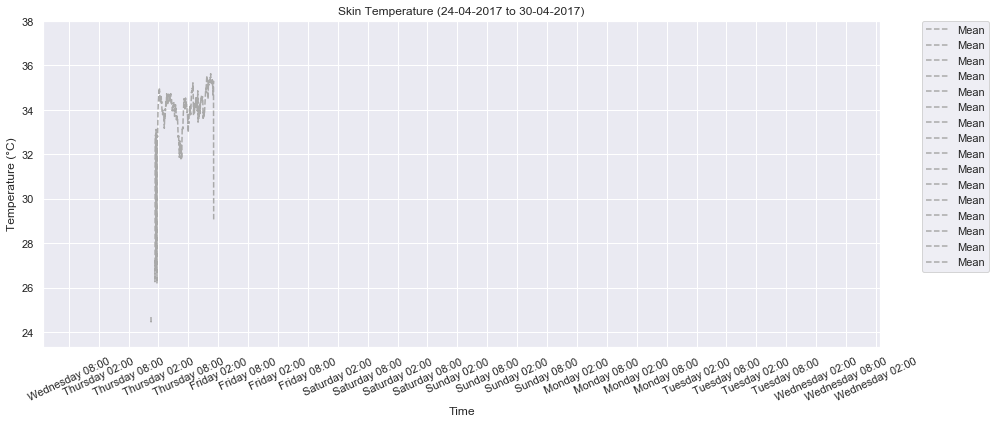

In [60]:
# fig, ax = plt.subplots()
from datetime import date, timedelta
import seaborn as sns
import matplotlib.dates as mdates

# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(15, 6)})
hours = mdates.HourLocator(interval = 6)
start=oneminuteaverage.index.min()
end=oneminuteaverage.index.max()
print(start)
print(end)
# print(oneminuteaverage.loc['2017-04-18', 'TEMP'])
plt.xticks( rotation=25 )
ax=plt.gca()
# ax.set_xlim(["00:00:00", "23:59:59"])
# Set x-axis major ticks to weekly interval, on Mondays
# ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));
h_fmt = mdates.DateFormatter('%A %I:%M')
# plt.gcf().axes[0].xaxis.set_major_formatter(h_fmt)
# oneminuteaverage.sort_index()
# df.PRe[startDate:stopDate].plot(ax=axes[k])
# ax=df_temp.loc['2017-04-24':'2017-04-30', 'TEMP'].plot(marker='o',linestyle='-',label='Temperature')
delta = timedelta(days=7)
# fig.autofmt_xdate()
while start<=end:
    plt.plot(oneminuteaverage.loc[start:start+delta, 'TEMP'], label='Mean', linestyle='--',c='darkgrey')
#     ax = oneminuteaverage.loc[start:start+delta, 'TEMP'].plot( linestyle='-',label='average per minute')
#     ax = fifteenminuteaverage.loc['2017-04-24':'2017-04-30', 'TEMP'].plot(marker='o',linestyle='--',label='average per 15 minute')
    print(start+delta)
    ax.set_xlim([start, start+delta])

    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(h_fmt)
    ax.set_ylabel('Temperature (°C)')
    ax.set_xlabel('Time')
    ax.set_title('Skin Temperature (24-04-2017 to 30-04-2017)')
    start=start+delta
# fig.autofmt_xdate()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
# fig.tight_layout()

# fig, ax = plt.subplots(figsize=(25,15))#figsize=(15,15)
# markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
i=0
count=0

# for date in oneminuteaverage.index:
#     df = df_temp[df_temp.dates == date]
# #     plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date+"='{0}'".format(markers[i]))
#     plt.plot(df['NewTime'],df['TEMP'],'o',label=date)
#     i=i+1   
#     count=count+1
#     if i % 1==0:
#         i = 0
#         print(df)
#         plt.plot(df['NewTime'],df['mean_total'], label='Mean', linestyle='--',c='darkgrey')
# #         datenums=md.date2num(date)
#         plt.xticks( rotation=25 )
#         ax=plt.gca()
#         ax.set_xlim(["00:00:00", "23:59:59"])
#         plt.title("Skin Temperature (Day="+str(date)+")",fontsize=20)
# #         hours = mdates.HourLocator(interval = 1)
# #         h_fmt = mdates.DateFormatter('%H:%M:%S')
# #         ax.xaxis.set_major_locator(hours)
# #         ax.xaxis.set_major_formatter(h_fmt)
#         ax.set_ylabel('Temperature (°C)')
#         ax.set_xlabel('Time')
#         fig.autofmt_xdate()
#         plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# #         plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
#         fig.tight_layout()
# #         plt.savefig("daily_temperature/Date="+str(date)+""+".png",bbox_inches="tight")
#         plt.show() 
#         if(count==5):
#             break

In [61]:


#df_temp['TEMP'].head()
# df_temp.head(5)
# oneminuteaverage.head(5)
fifteenminuteaverage.head(5)

TEMP
mydatentime                         
2017-04-05 10:45:00-04:00  33.203140
2017-04-05 11:00:00-04:00  33.263722
2017-04-05 11:15:00-04:00  32.467867
2017-04-05 11:30:00-04:00  31.975133
2017-04-05 11:45:00-04:00  31.374756

In [62]:
#make date time columns seperately
import datetime as dt
import pytz
import pandas as pd

date_time_str = '2018-06-29 17:08:00'
date_time_obj = dt.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')

# dateList = []
# TimeList=[]
# dateandtimeList=[]
# averagetemplist=[]
# finaldate = dt.datetime.today()
# i=0
# for date,time in zip(df_temp.date, df_temp.time): 
#     dateList.append(dt.datetime.strptime(date +" "+time, '%y-%m-%d %H:%M:%S').date())
#     TimeList.append(dt.datetime.strptime(date +" "+time, '%y-%m-%d %H:%M:%S').time())
#     dateandtimeList.append(dt.datetime.strptime(date +" "+time, '%y-%m-%d %H:%M:%S'))
#     i=i+1
count=0
# for date in df_temp.date: 
#     count=count+1
#     df = df_temp[df_temp.date == date]
#     averagetemplist.append(df['TEMP'].mean())
    
# df_temp['mean_total']=df_temp['TEMP'].mean()
# df_temp['averagedaytemp']=averagetemplist
# df_temp['datess']=dateList
# df_temp['NewTime']=TimeList
# df_temp['DatenTime']=dateandtimeList

    
# df12=df_temp[['DatenTime','TEMP']]

# Convert the data to daily frequency, without filling any missings
# df12['DatenTime'] = df12['DatenTime'].asfreq('H')
# # Create a column with missings forward filled
# df12['forward filll'] = df12.asfreq('H', method='ffill')
# df12.head()

print(df_temp)


                                   TEMP
mydatentime                            
2017-04-12 20:34:40-04:00         33.87
2017-04-12 20:34:40.250000-04:00  33.87
2017-04-12 20:34:40.500000-04:00  33.87
2017-04-12 20:34:40.750000-04:00  33.87
2017-04-12 20:34:41-04:00         33.89
2017-04-12 20:34:41.250000-04:00  33.89
2017-04-12 20:34:41.500000-04:00  33.89
2017-04-12 20:34:41.750000-04:00  33.89
2017-04-12 20:34:42-04:00         33.87
2017-04-12 20:34:42.250000-04:00  33.87
2017-04-12 20:34:42.500000-04:00  33.87
2017-04-12 20:34:42.750000-04:00  33.87
2017-04-12 20:34:43-04:00         33.89
2017-04-12 20:34:43.250000-04:00  33.89
2017-04-12 20:34:43.500000-04:00  33.89
2017-04-12 20:34:43.750000-04:00  33.89
2017-04-12 20:34:44-04:00         33.93
2017-04-12 20:34:44.250000-04:00  33.93
2017-04-12 20:34:44.500000-04:00  33.93
2017-04-12 20:34:44.750000-04:00  33.93
2017-04-12 20:34:45-04:00         33.77
2017-04-12 20:34:45.250000-04:00  33.77
2017-04-12 20:34:45.500000-04:00  33.77


In [ ]:
#daily with matplotlib sorting dates in correct order
import matplotlib.pyplot as plt
from datetime import time
import seaborn as sns
import numpy as np


df_temp.describe()
print(df_temp)
# sns.set(style="darkgrid")
# df_sub = df_temp[['DatenTime','datess','NewTime','TEMP','mean_total','averagedaytemp']]

# df['tick_datetime'] = pd.to_datetime(df['tick_datetime'])
# df = df.set_index('tick_datetime')

# df_sub.set_index('DatenTime', inplace=True)
# hourly_avg = df_sub.groupby(pd.TimeGrouper('H')).mean()
# hourly_avg.head()

# Date = hourly_avg.groupby(pd.TimeGrouper('D'))
# Date.head()



# plt.plot(hourly_avg['TEMP'],'o')

# print(hourly_avg)
# df_sub.sort_values(by='datess')
# df_sub.head()
# all_dates = set(df_sub['datess'])#Getting all dates
# all_detes=sorted(all_dates)
# all_date_list = list(sorted(all_dates))

# pd.plotting.register_matplotlib_converters()
# df_temp.plot(x = "DatenTime", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
i = 0
# fig, ax = plt.subplots(figsize=(25,15))#figsize=(15,15)
# markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
# i=0
# count=0

# for date in Date.index:
#     df = df_sub[df_sub.datess == date]
# #     plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date+"='{0}'".format(markers[i]))
#     plt.plot(df['NewTime'],df['TEMP'],'o',label=date)
#     i=i+1   
#     count=count+1
#     if i % 1==0:
#         i = 0
#         print(df)
#         plt.plot(df['NewTime'],df['mean_total'], label='Mean', linestyle='--',c='darkgrey')
# #         datenums=md.date2num(date)
#         plt.xticks( rotation=25 )
#         ax=plt.gca()
#         ax.set_xlim(["00:00:00", "23:59:59"])
#         plt.title("Skin Temperature (Day="+str(date)+")",fontsize=20)
# #         hours = mdates.HourLocator(interval = 1)
# #         h_fmt = mdates.DateFormatter('%H:%M:%S')
# #         ax.xaxis.set_major_locator(hours)
# #         ax.xaxis.set_major_formatter(h_fmt)
#         ax.set_ylabel('Temperature (°C)')
#         ax.set_xlabel('Time')
#         fig.autofmt_xdate()
#         plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# #         plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
#         fig.tight_layout()
# #         plt.savefig("daily_temperature/Date="+str(date)+""+".png",bbox_inches="tight")
#         plt.show() 
#         if(count==5):
#             break
           #remove this to generate plots for all dates


In [63]:
# df_sub = df_temp[['datess','NewTime','TEMP','mean_total','averagedaytemp']]
# ticks = ['12:00 AM', '1:00 AM', '2:00 AM', '3:00 AM', '4:00 AM', '5:00 AM', '6:00 AM', '7:00 AM','8:00 AM','9:00 AM','10:00 AM','11:00 AM','12:00 PM', '1:00 PM', '2:00 PM', '3:00 PM', '4:00 PM',  '5:00 PM', '6:00 PM', '7:00 PM', '8:00 PM', '9:00 PM', '10:00 PM', '11:00 PM' ]
# tickstime=[]
# format = '%H:%M %p'
# for tic in ticks:
#     tickstime.append(datetime.strptime(tic, format).time())
# print(tickstime)
oneminuteaverage['fifteenminavg']=df_temp.resample('15T').mean()
df_sub=oneminuteaverage
# df_sub.sort_values(by='datess')
# df_sub.head()
# all_dates = set(df_sub['datess'])#Getting all dates
# all_detes=sorted(all_dates)
# all_date_list = list(sorted(all_dates))
#convert unique dates to a list for loop
# df_temp.set_index('mydatentime', inplace=True)
df_temp.drop('time_stamp', axis=1, inplace=True)
# df_sub['date']=df_sub.index.map(lambda t: t.date())
# df_sub['NewTime']=df_sub.index.map(lambda t: t.time())
# df_sub.head(20)
# dates=df_sub.index.map(lambda t: t.date()).unique()
# print(dates)
# df_sub.head(30)

KeyError: "['time_stamp'] not found in axis"

2017-04-05
2017-04-06
2017-04-07
2017-04-08
2017-04-09
2017-04-10
2017-04-11
2017-04-12
2017-04-13
2017-04-14
2017-04-15
2017-04-16
2017-04-17
2017-04-18
2017-04-19
2017-04-20
2017-04-21
2017-04-22
2017-04-23
2017-04-24
2017-04-25
2017-04-26
2017-04-27
2017-04-28
2017-04-29
2017-04-30
2017-05-01
2017-05-02
2017-05-03
2017-05-04
2017-05-05
2017-05-06
2017-05-07
2017-05-08
2017-05-09
2017-05-10
2017-05-11
2017-05-12
2017-05-13
2017-05-14
2017-05-15
2017-05-16
2017-05-17
2017-05-18
2017-05-19
2017-05-20
2017-05-21
2017-05-22
2017-05-23
2017-05-24
2017-05-25
2017-05-26
2017-05-27
2017-05-28
2017-05-29
2017-05-30
2017-05-31
2017-06-01
2017-06-02
2017-06-03
2017-06-04
2017-06-05
2017-06-06
2017-06-07
2017-06-08
2017-06-09
2017-06-10
2017-06-11
2017-06-12
2017-06-13
2017-06-14
2017-06-15
2017-06-16
2017-06-17
2017-06-18
2017-06-19
2017-06-20
2017-06-21
2017-06-22
2017-06-23
2017-06-24
2017-06-25
2017-06-26
2017-06-27
2017-06-28
2017-06-29
2017-06-30
2017-07-01
2017-07-02
2017-07-03
2017-07-04

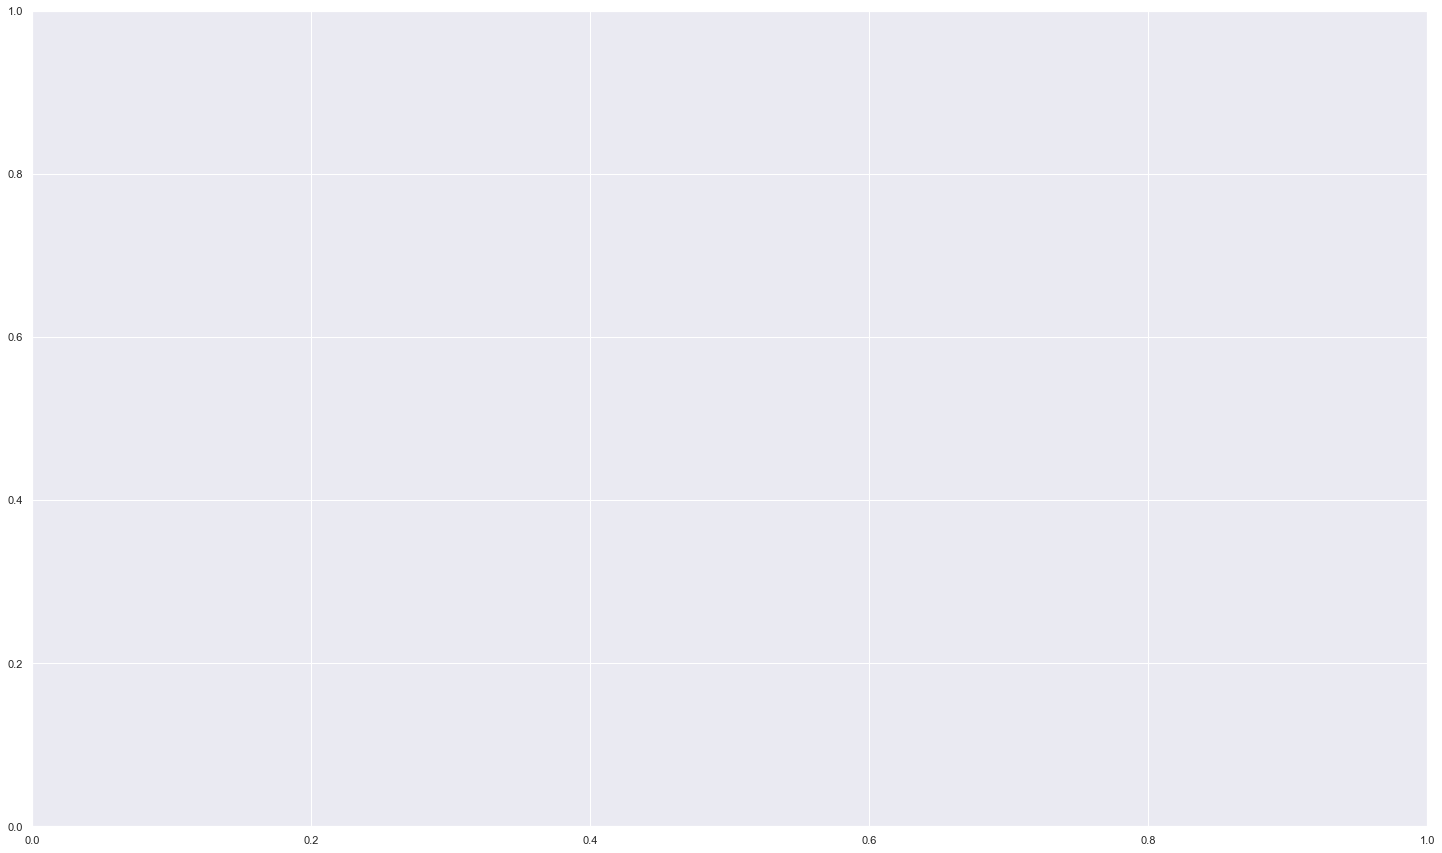

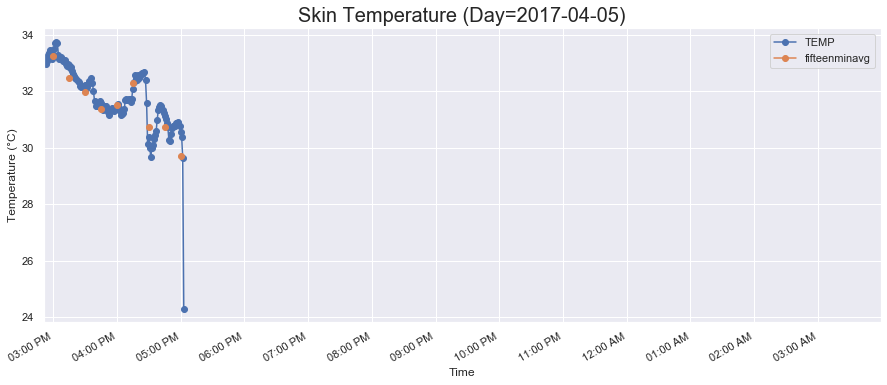

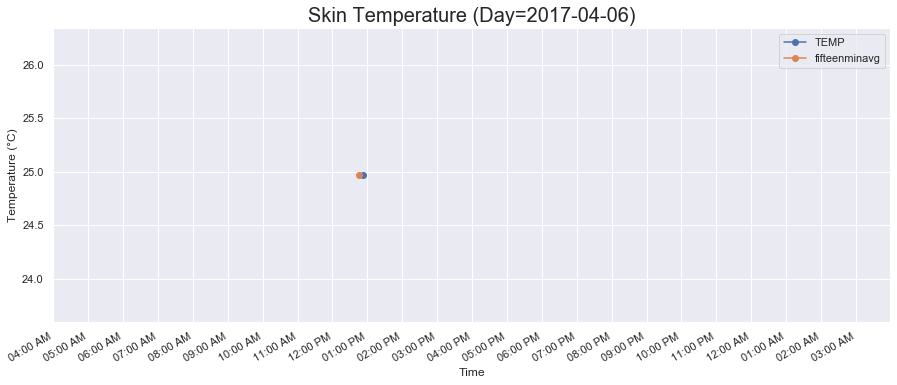

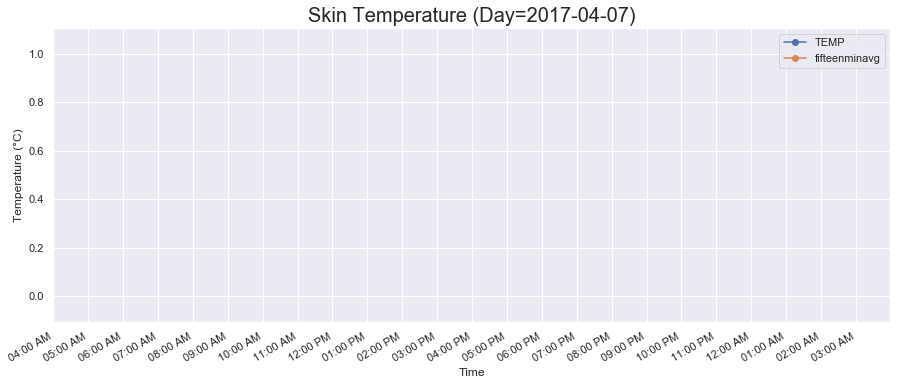

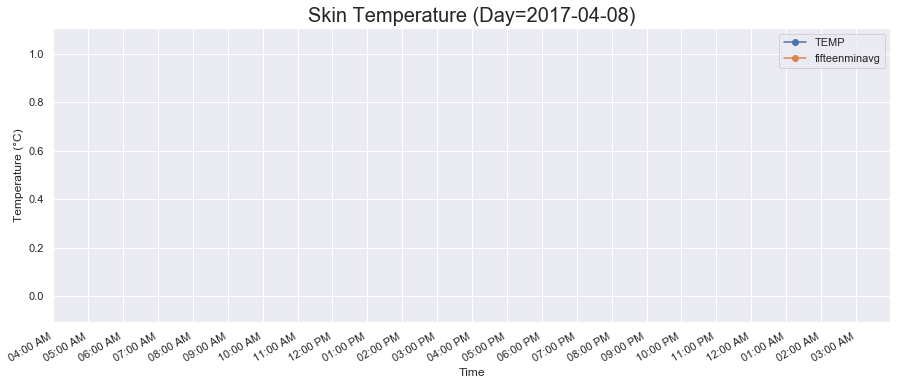

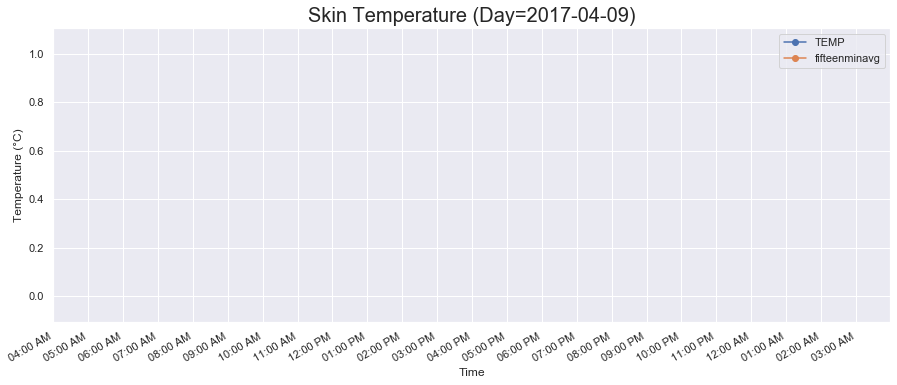

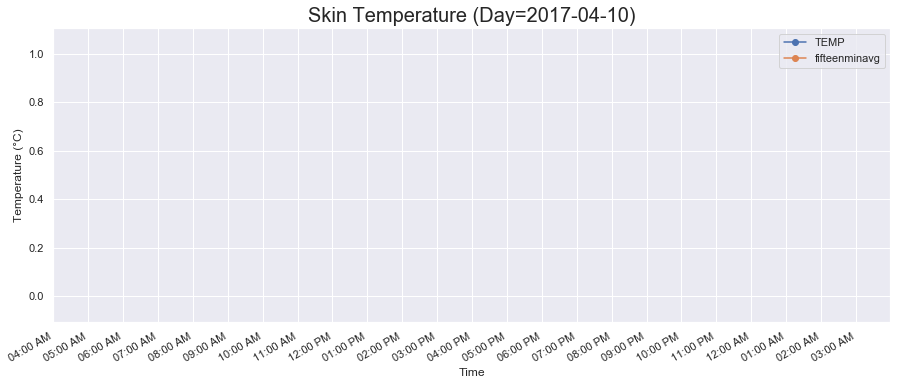

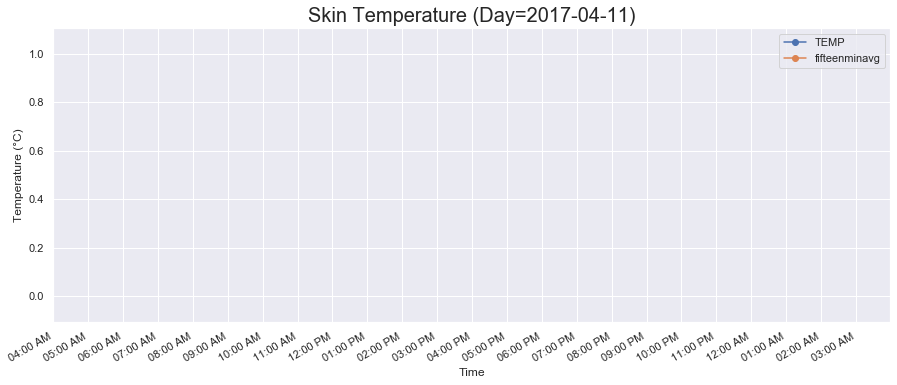

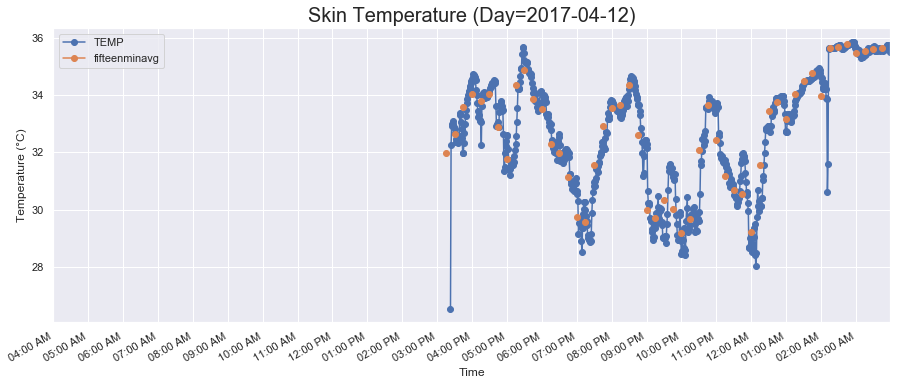

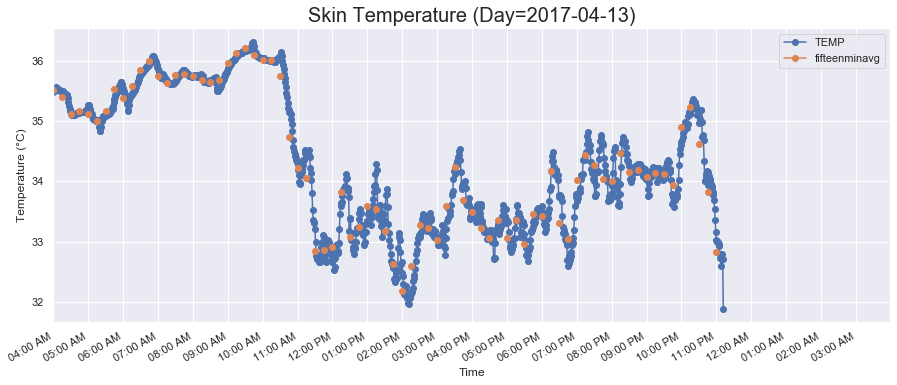

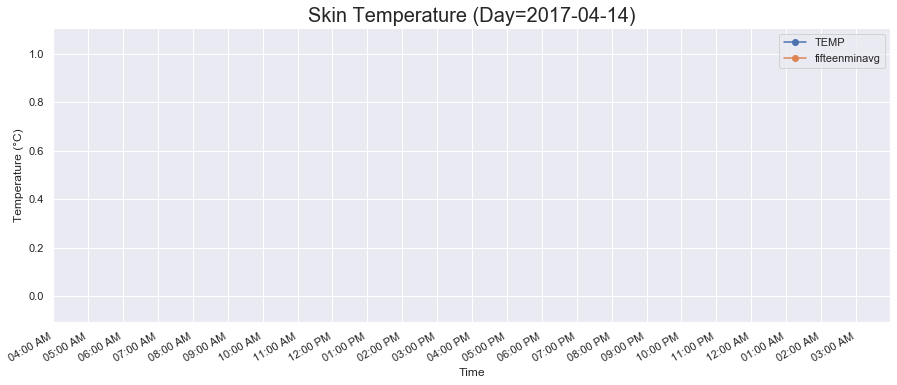

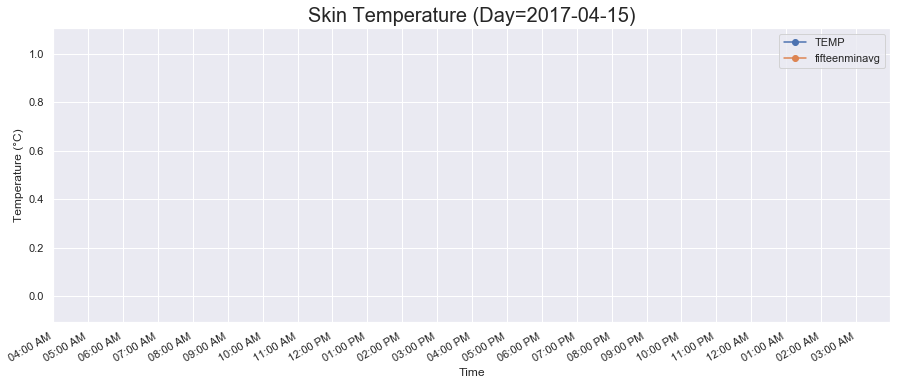

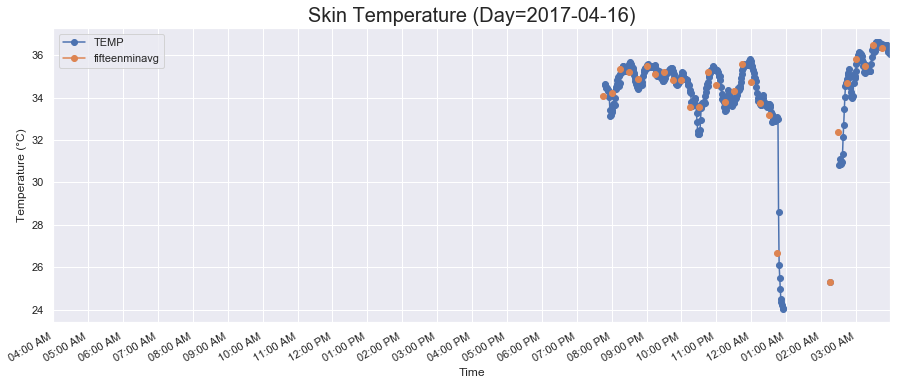

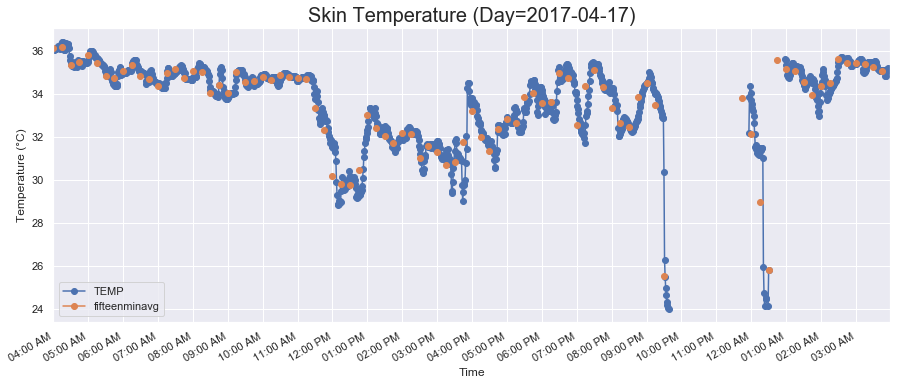

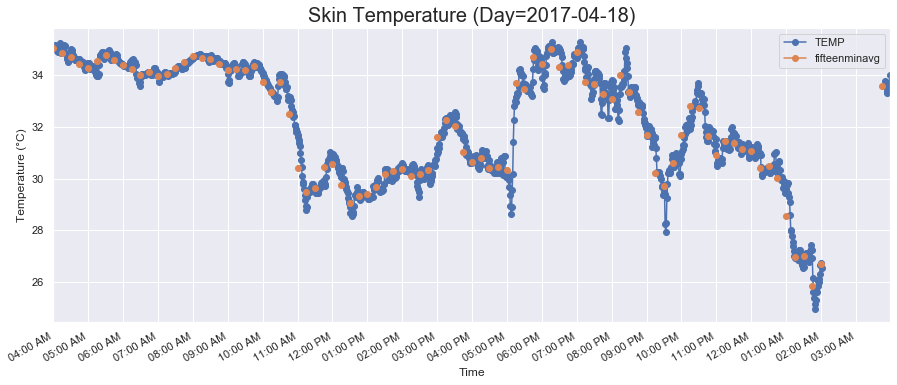

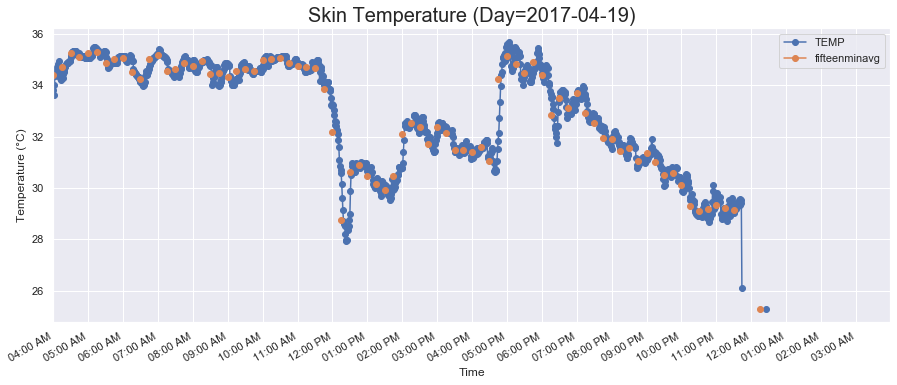

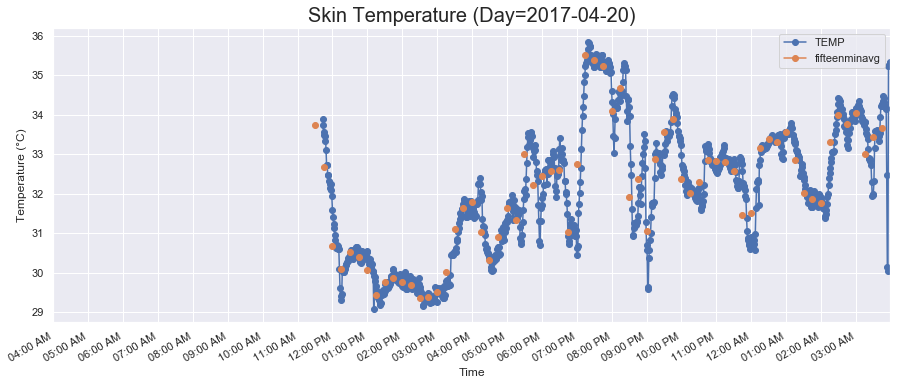

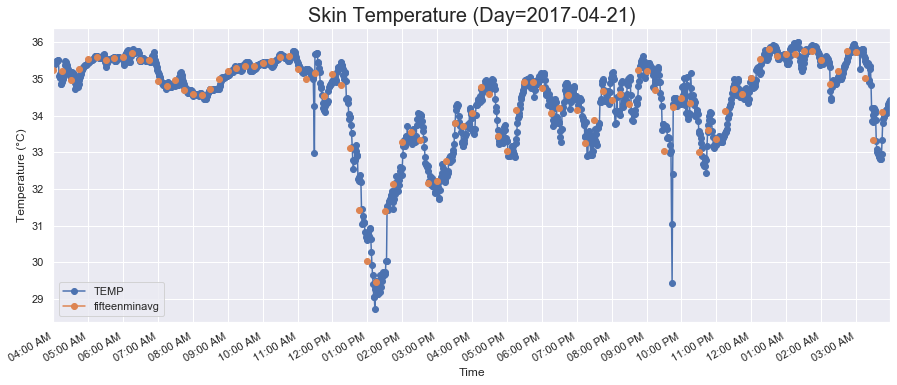

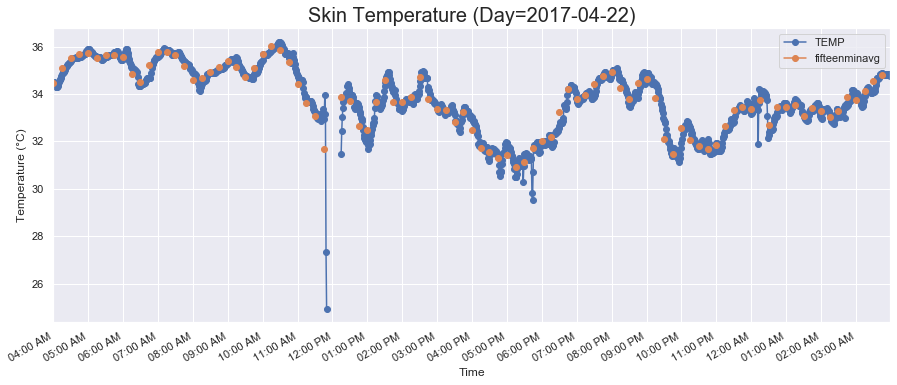

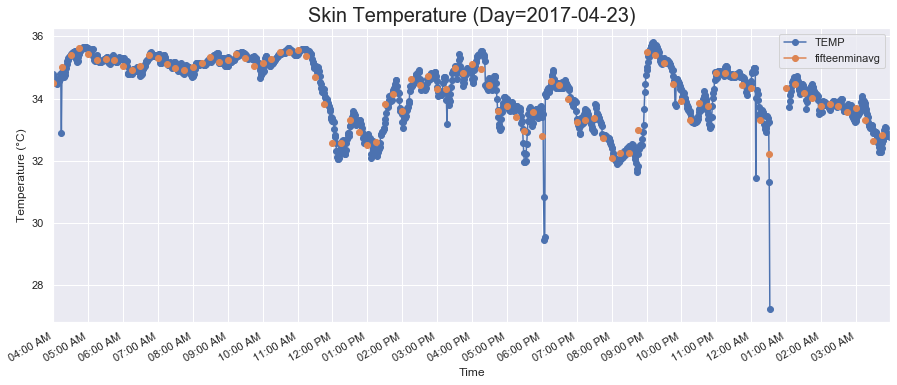

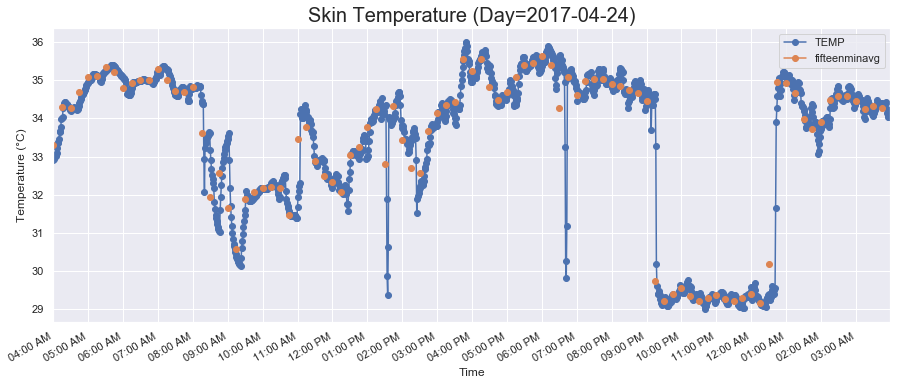

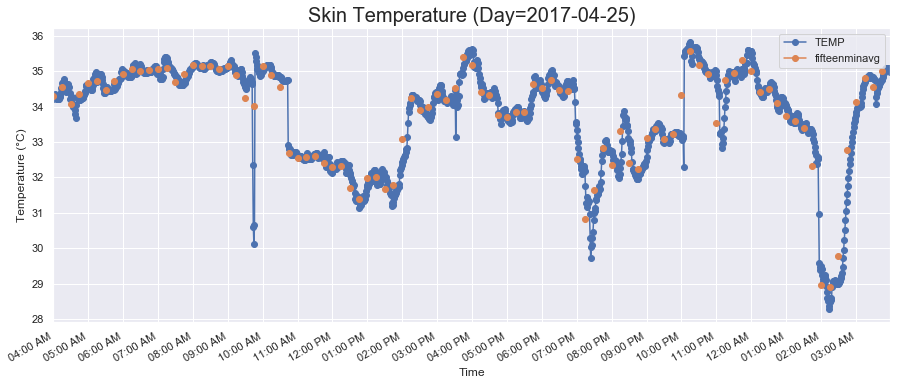

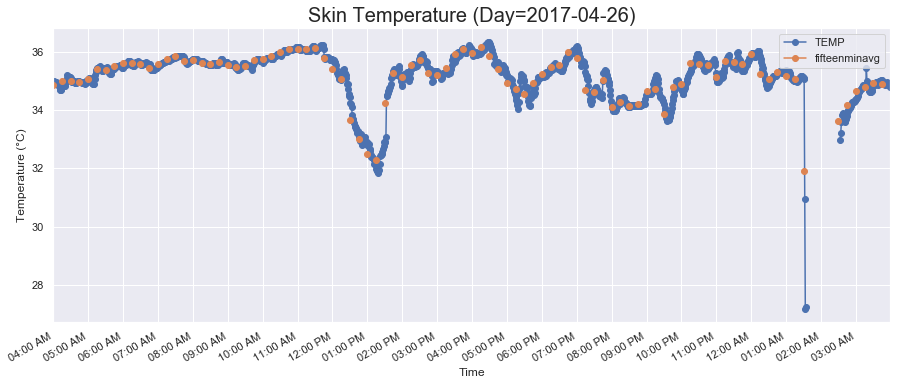

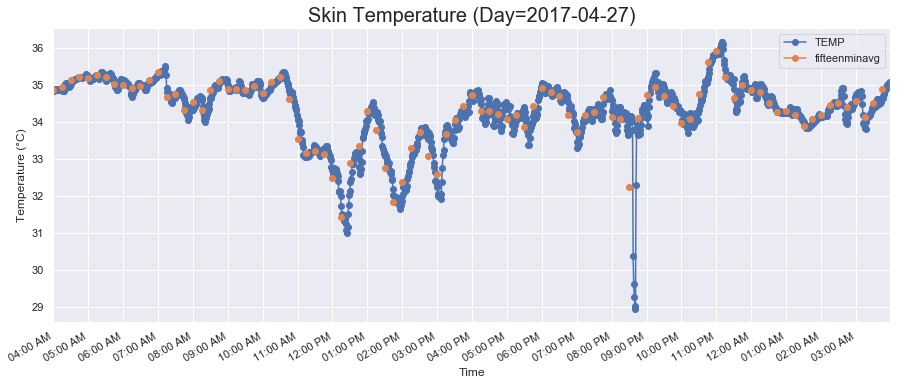

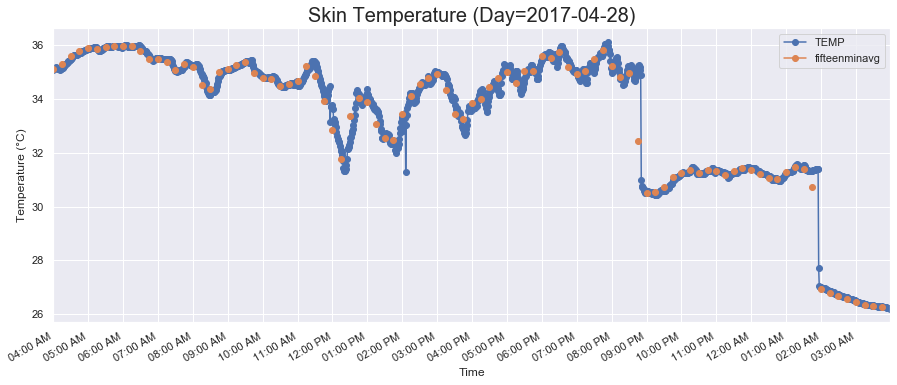

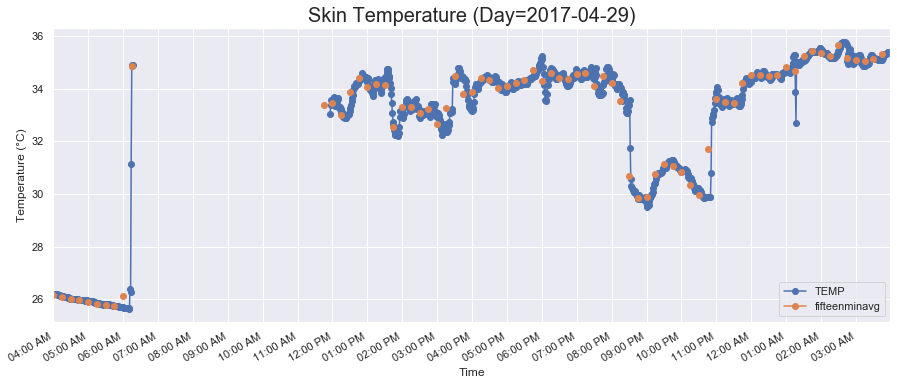

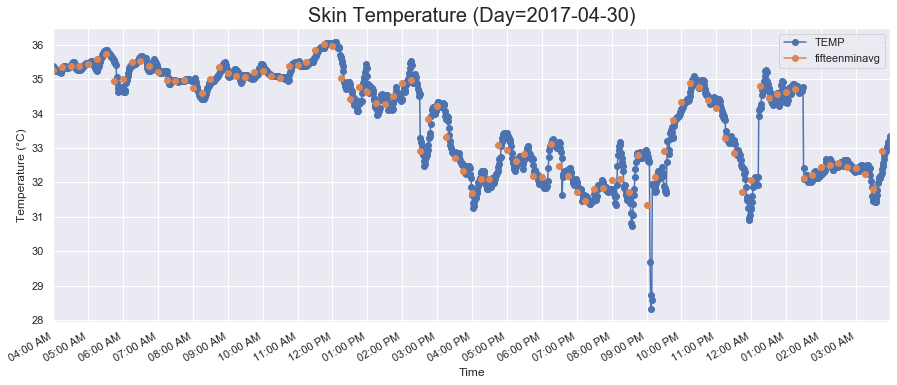

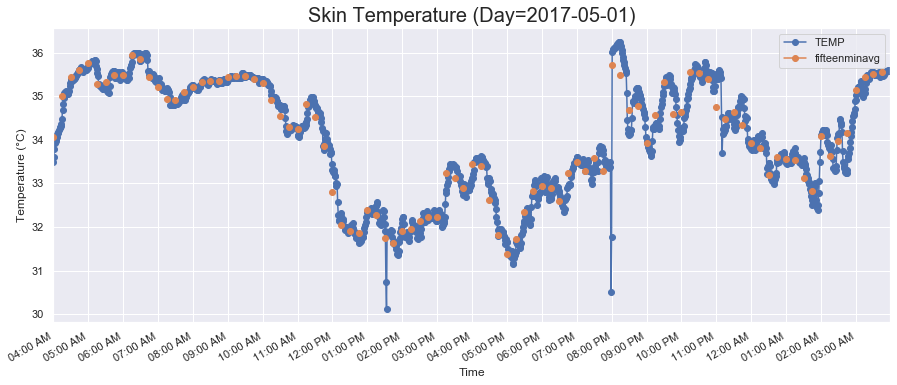

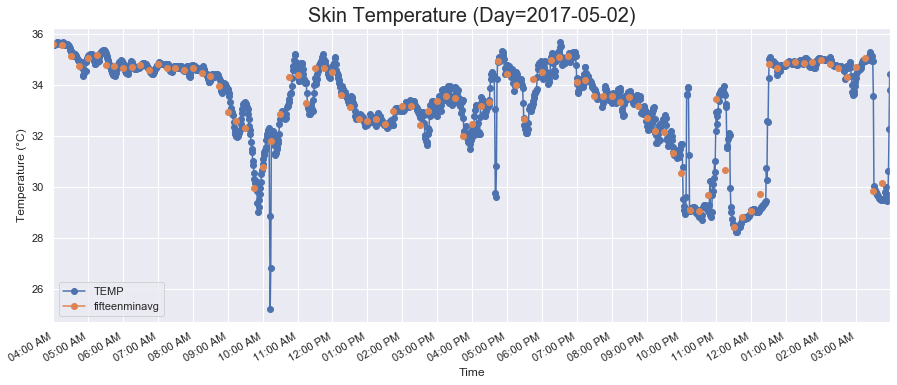

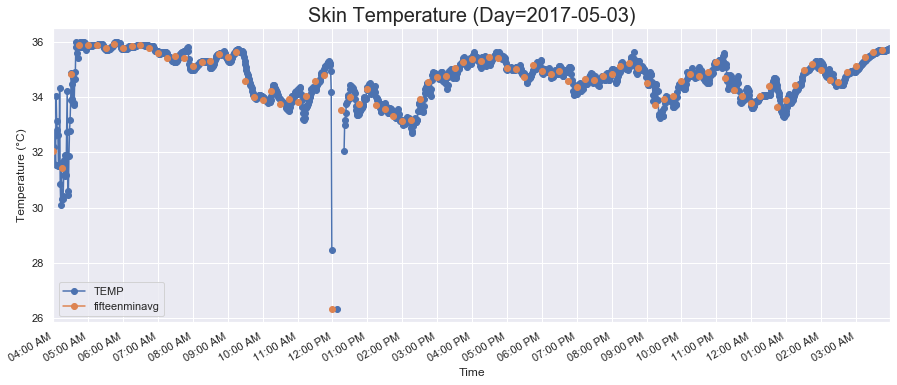

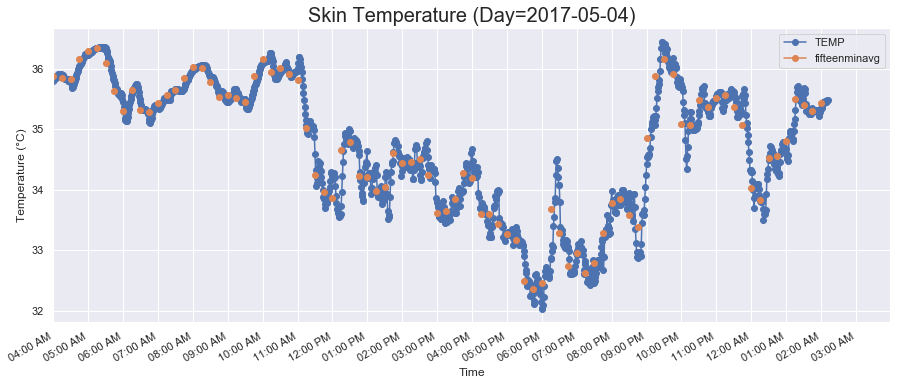

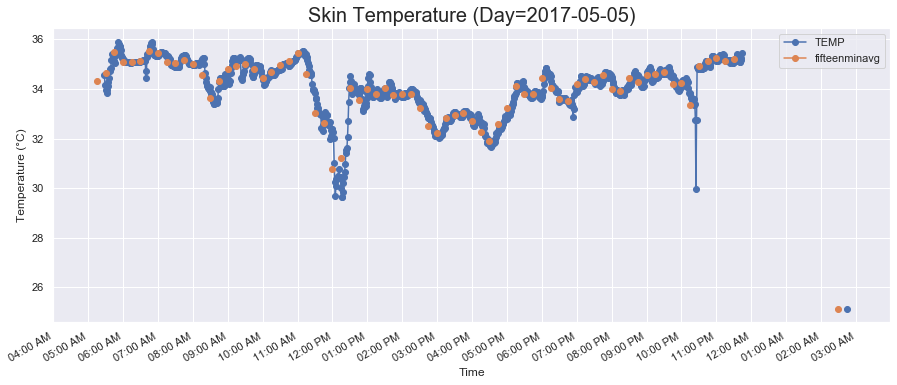

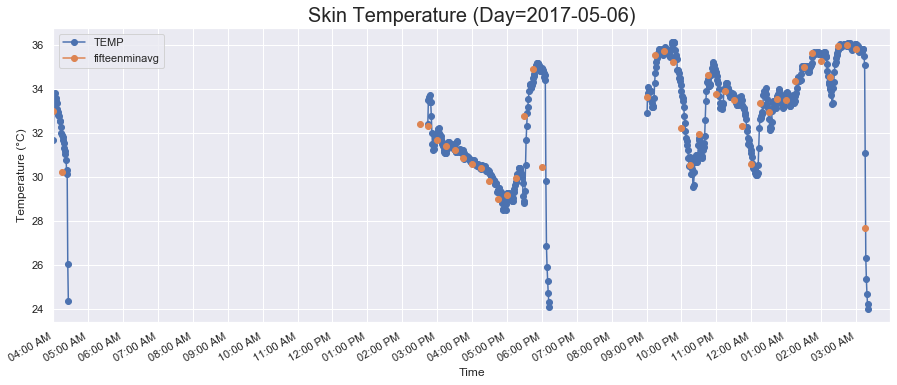

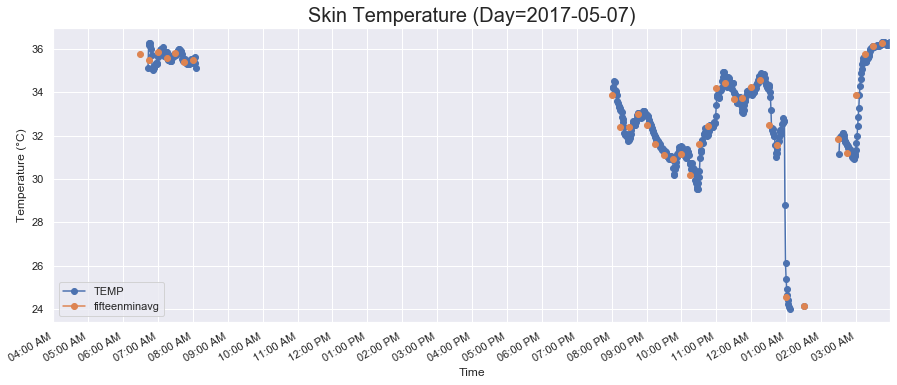

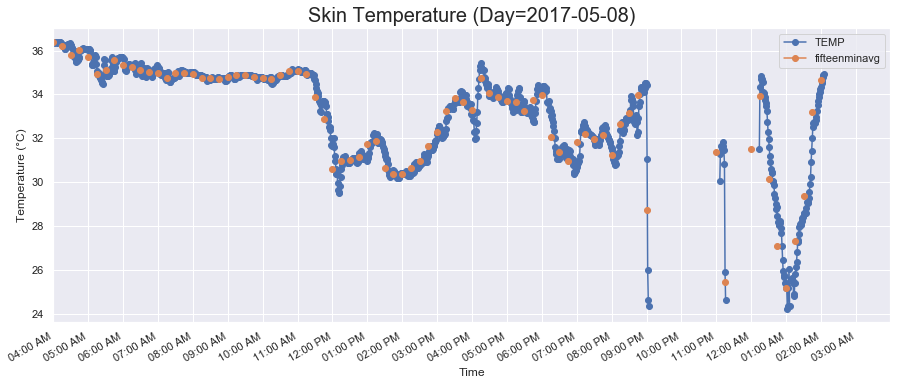

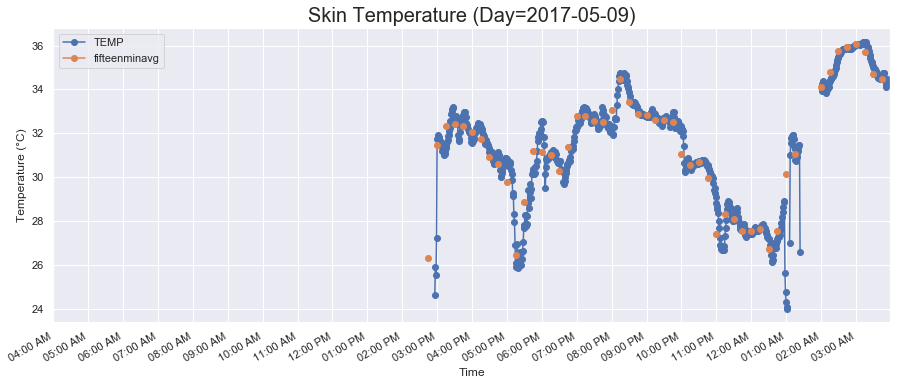

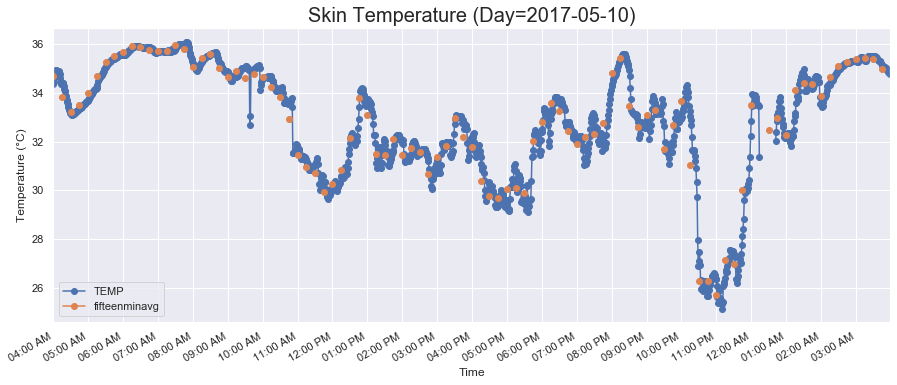

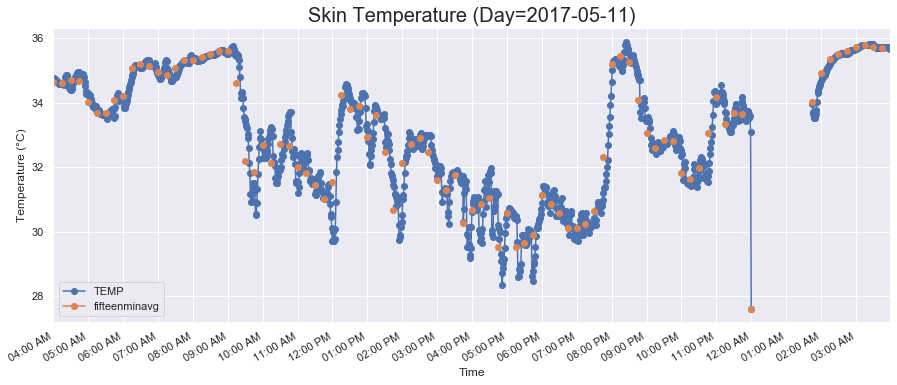

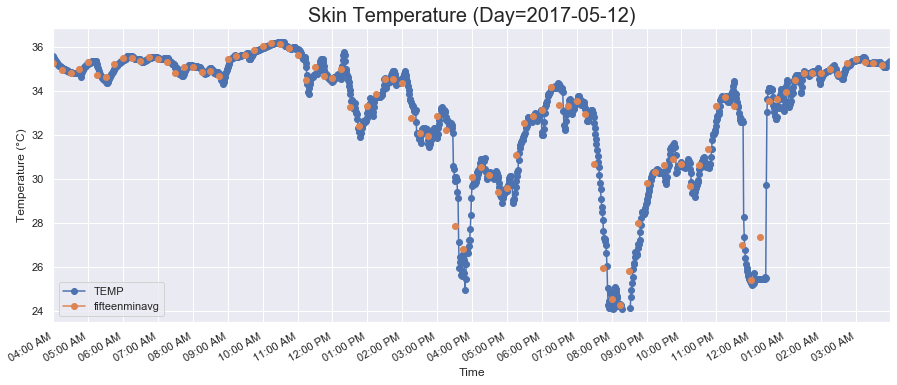

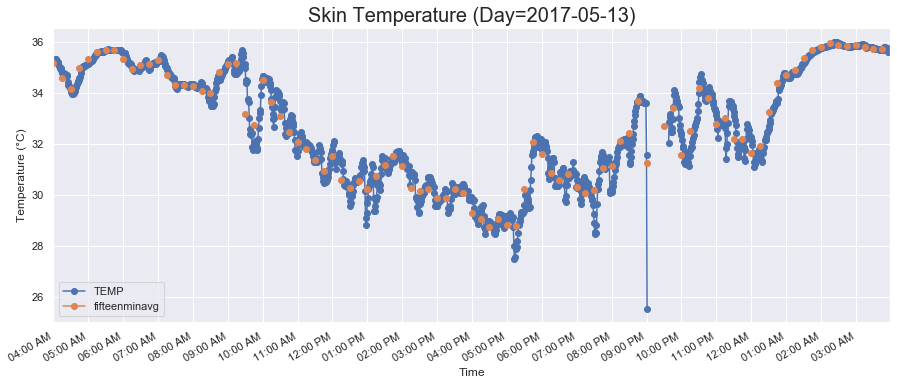

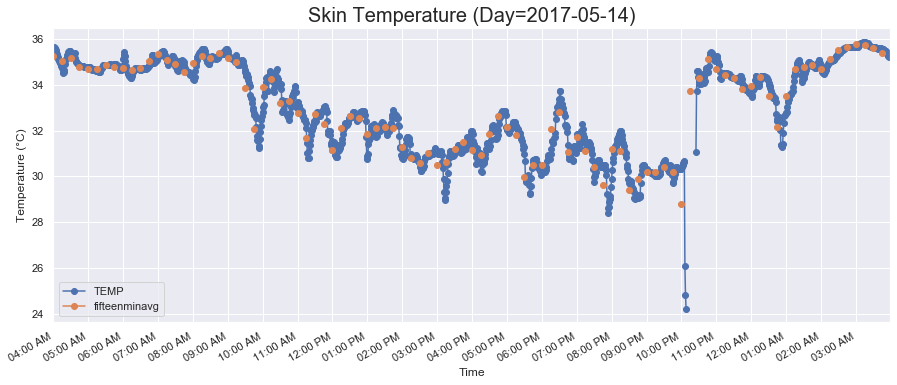

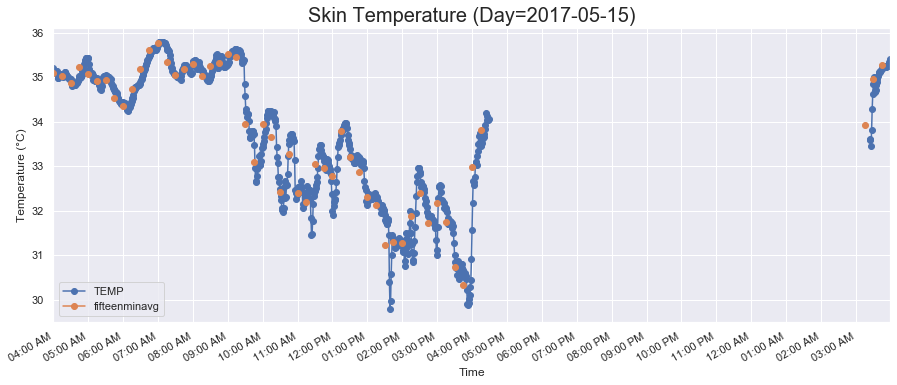

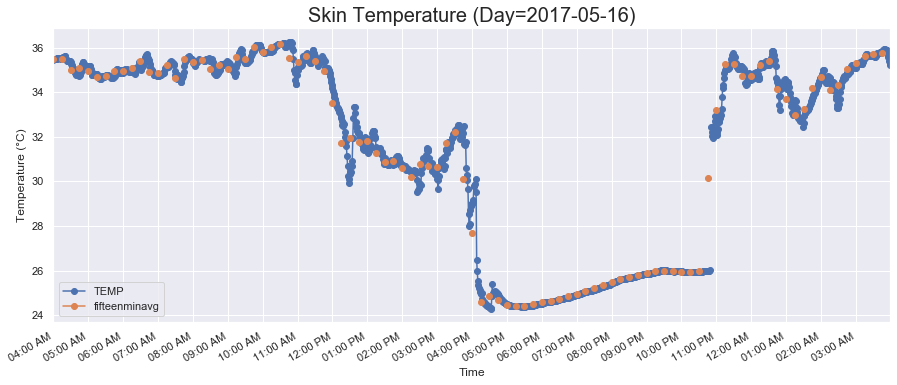

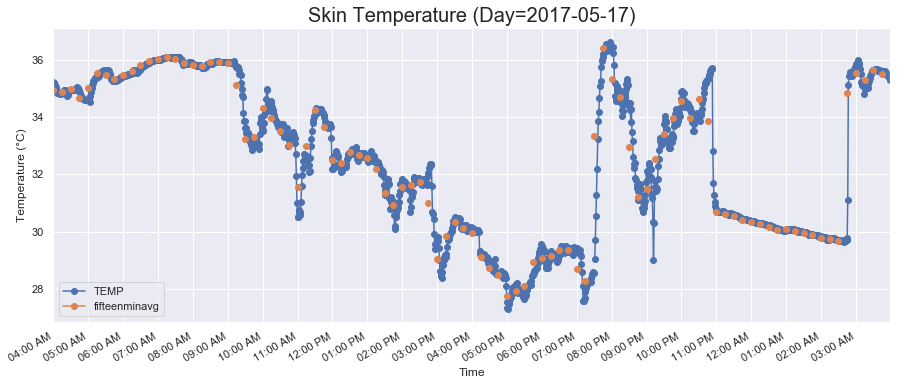

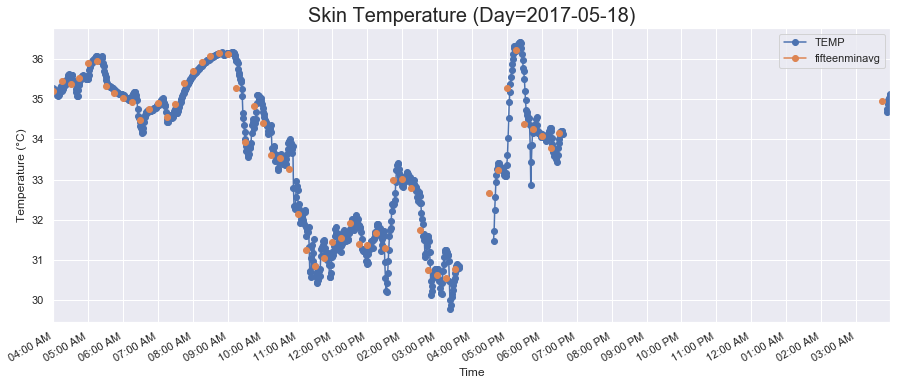

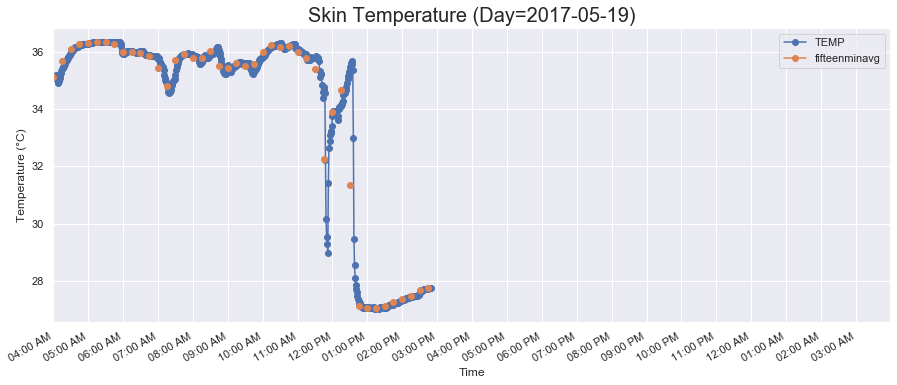

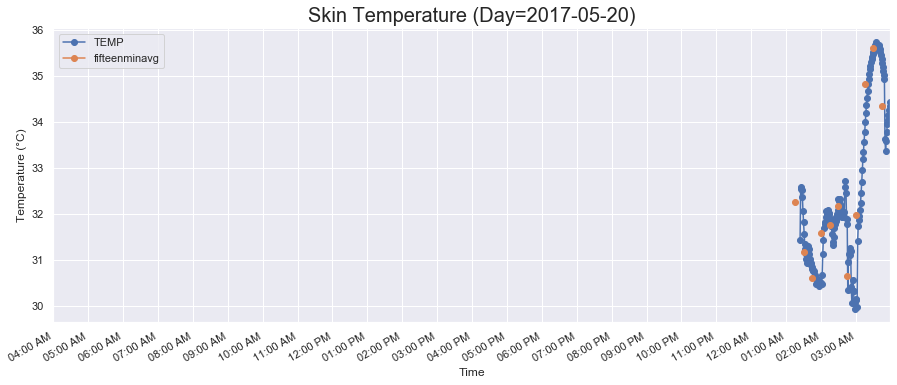

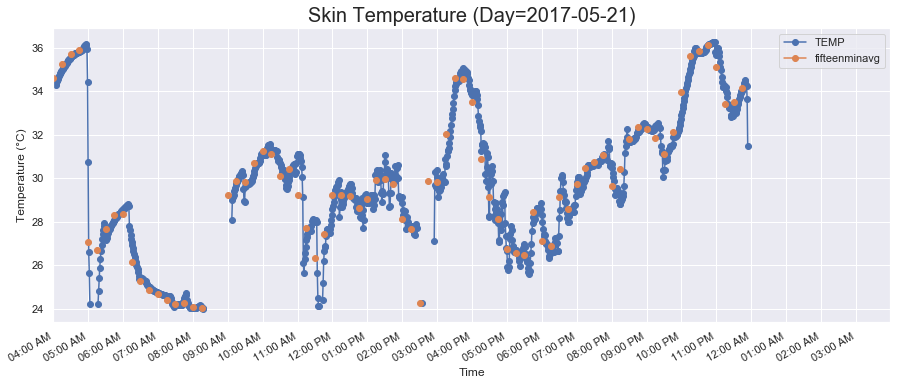

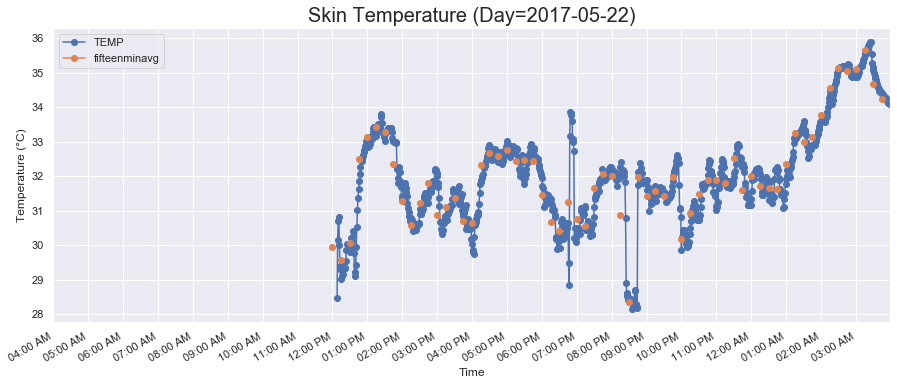

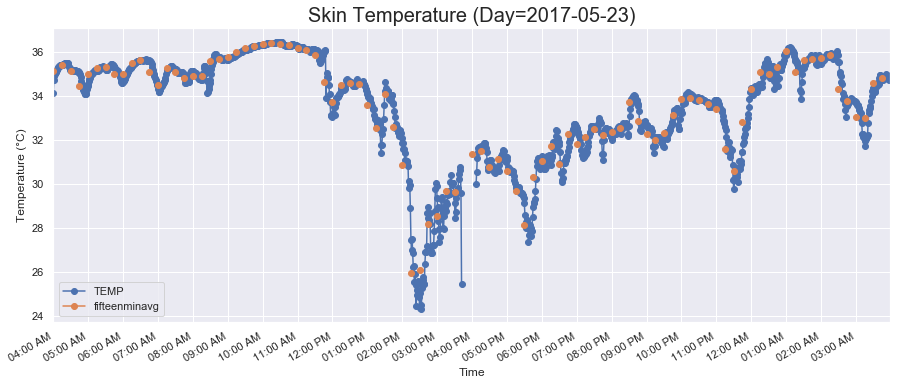

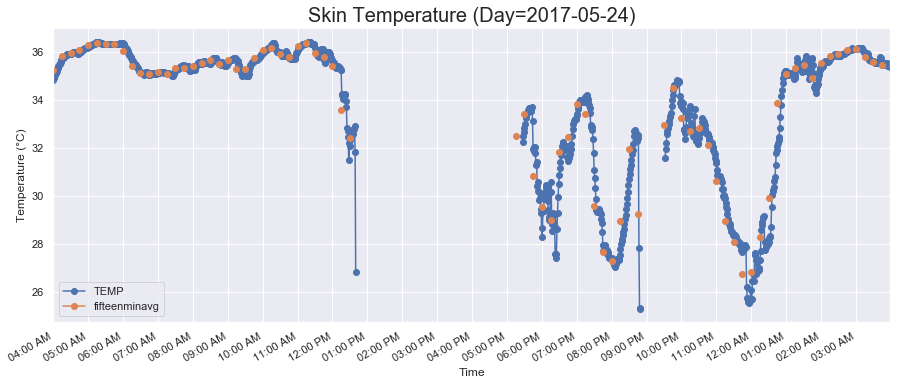

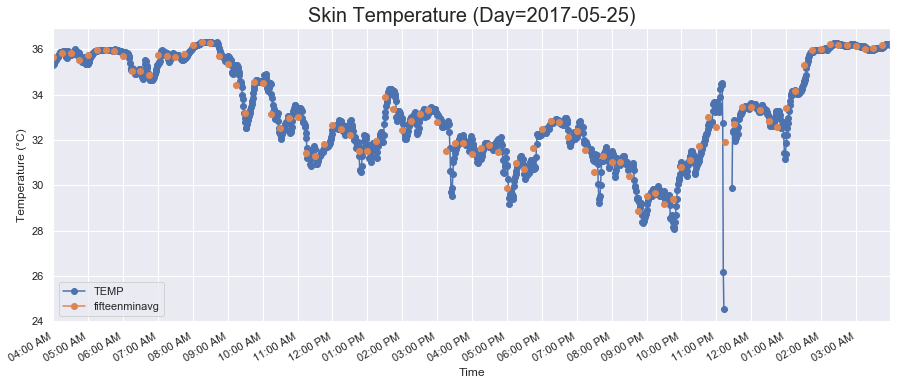

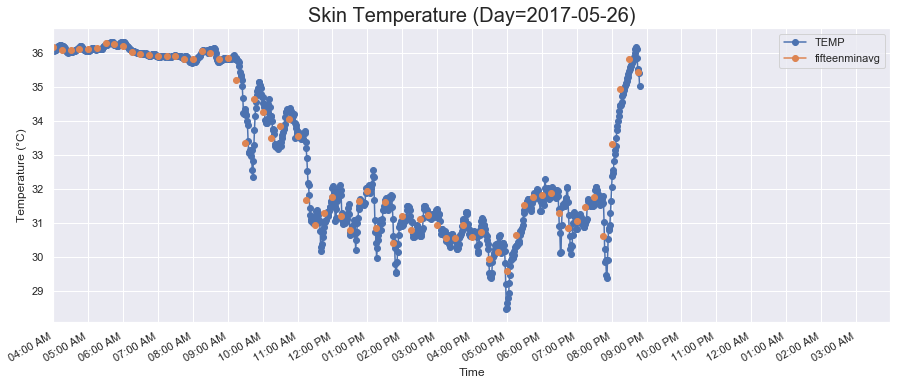

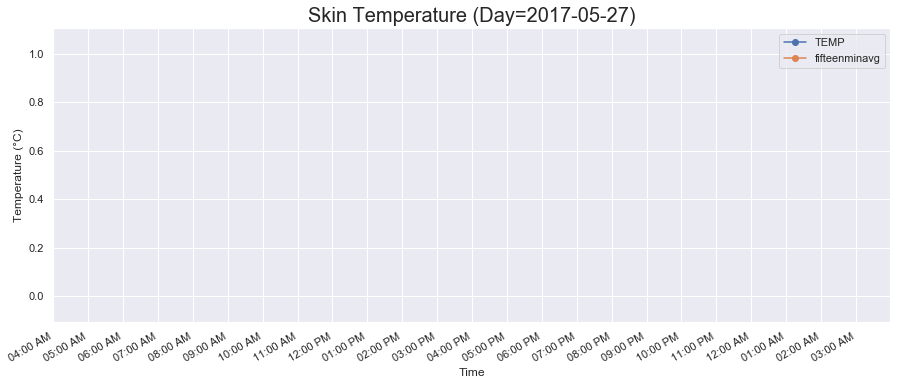

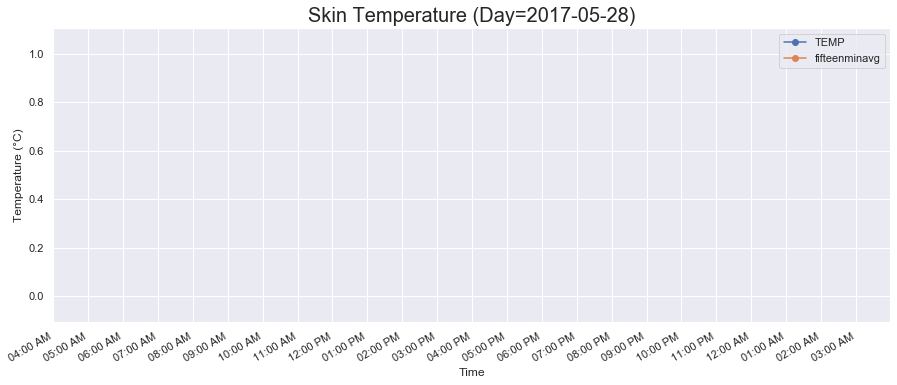

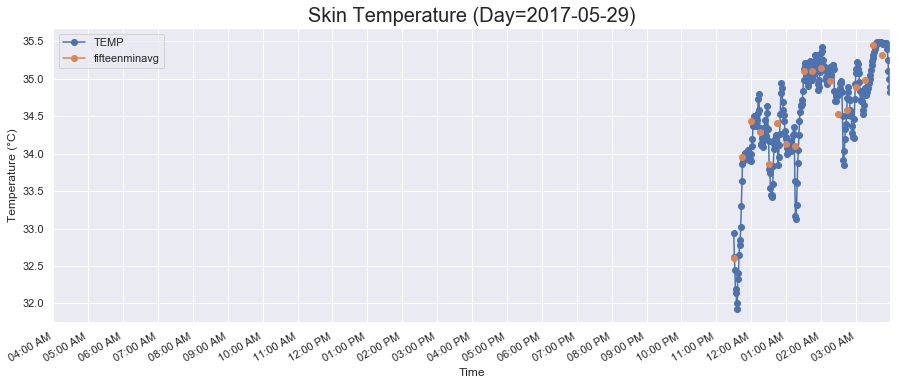

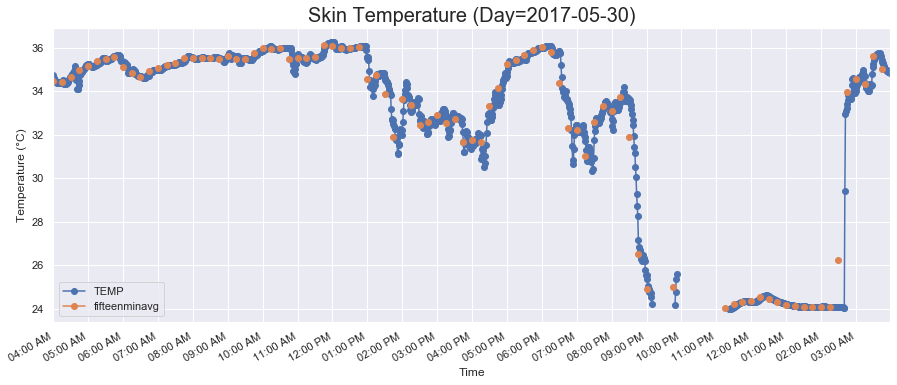

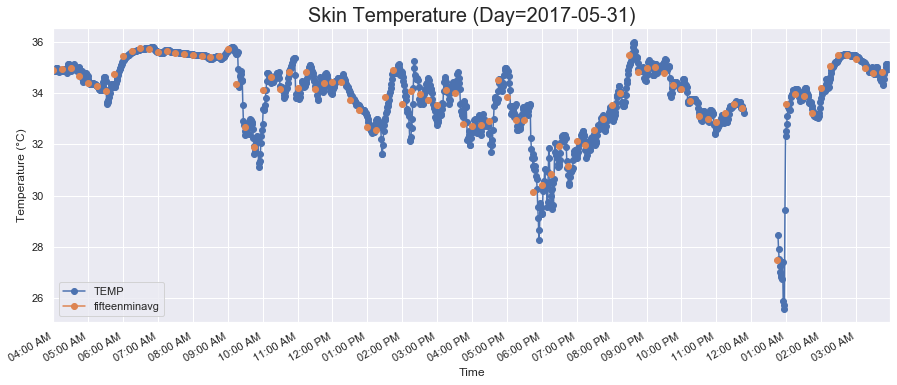

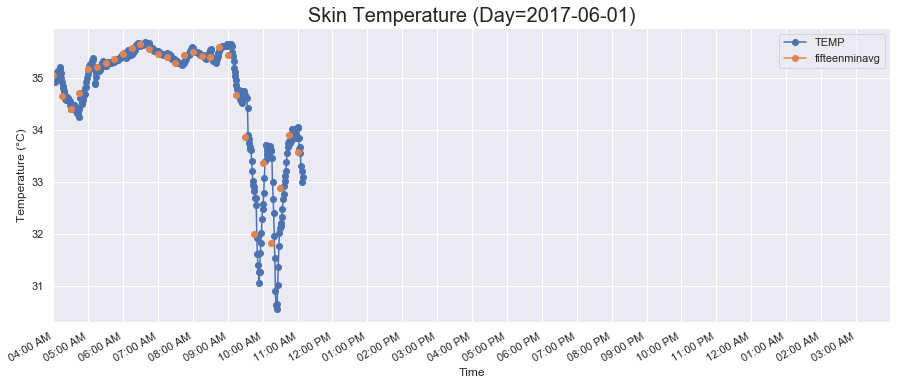

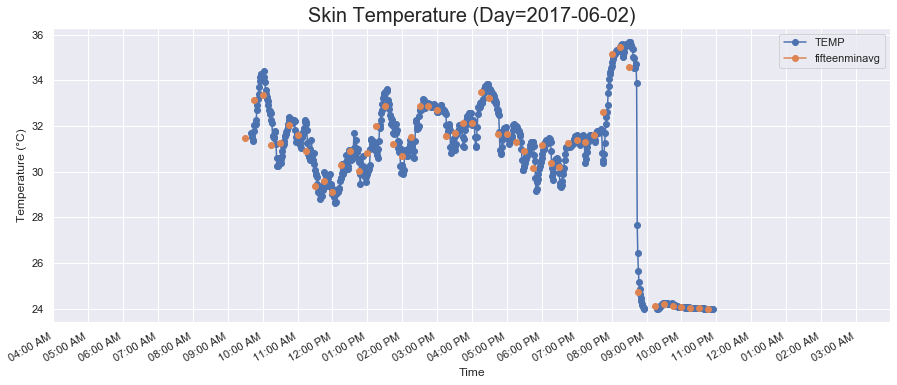

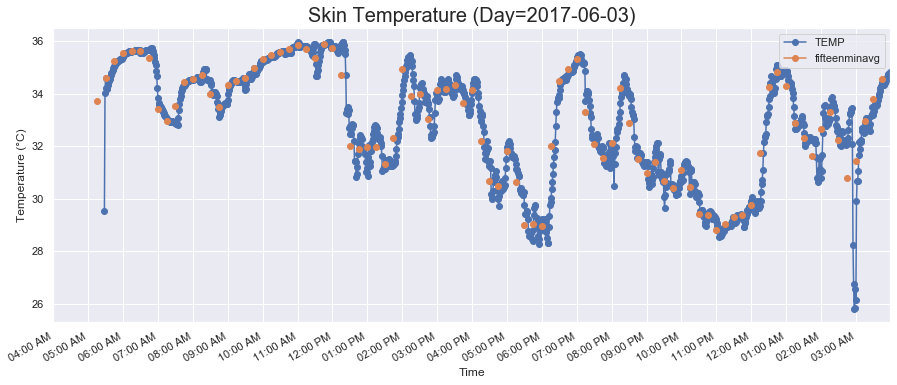

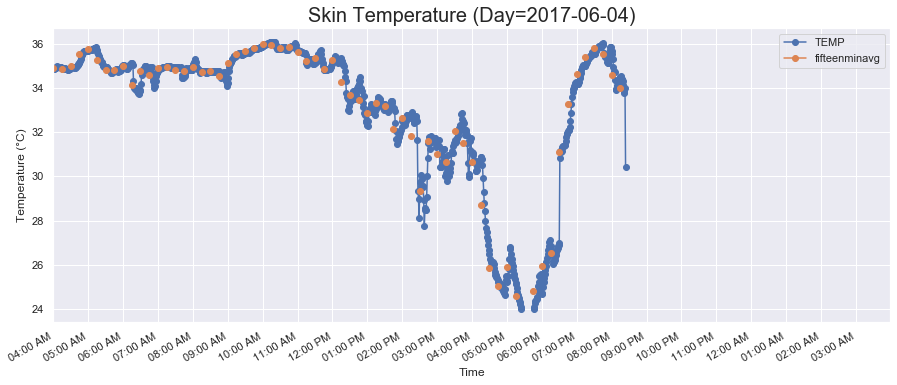

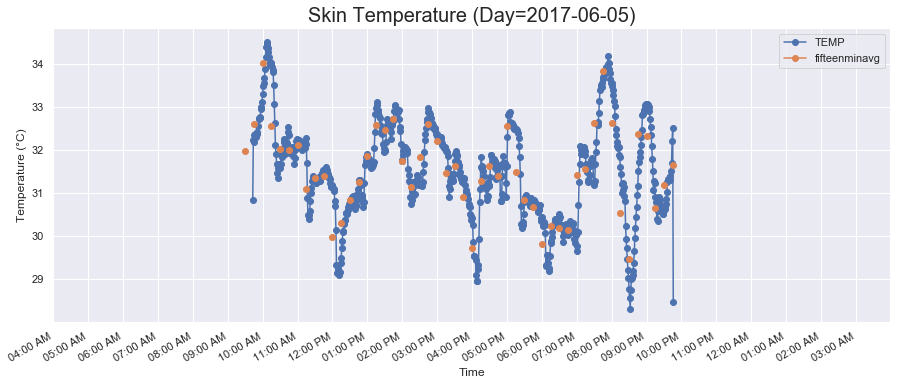

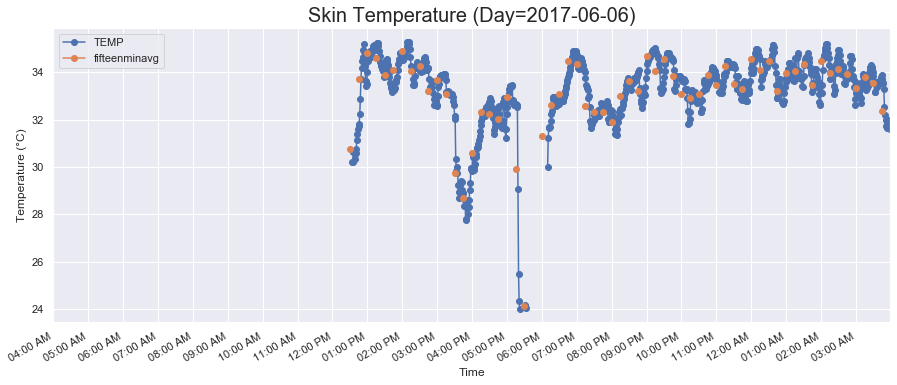

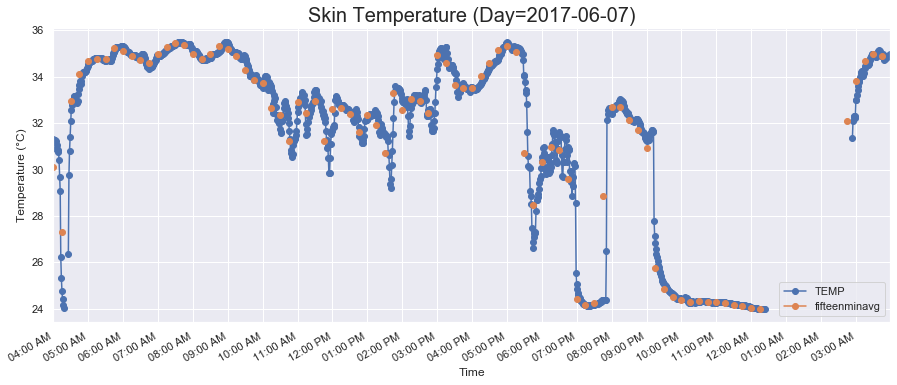

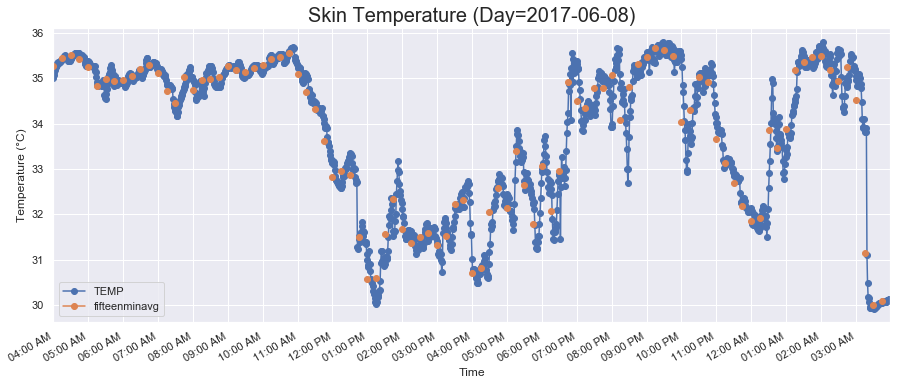

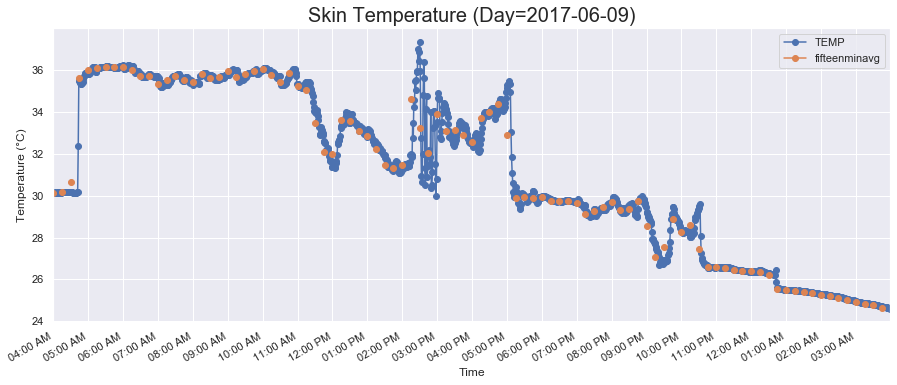

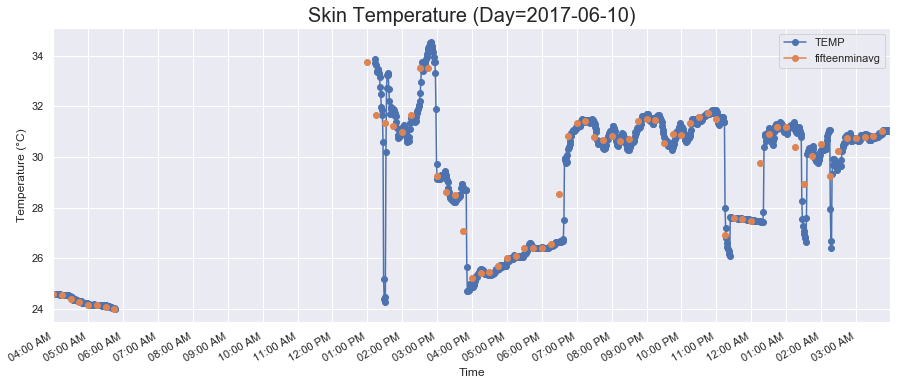

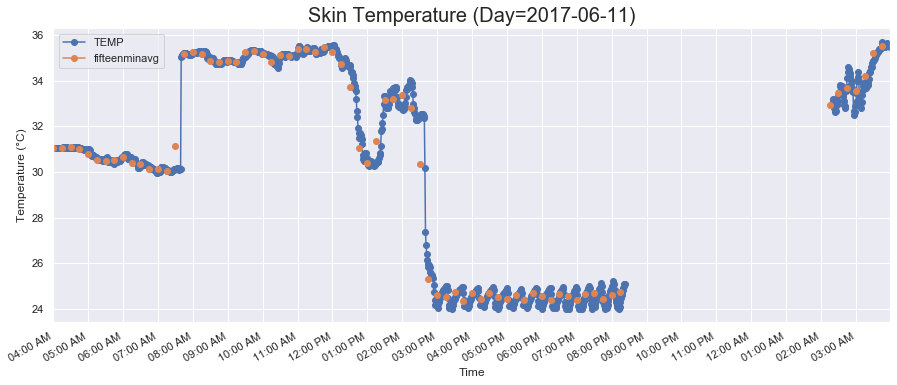

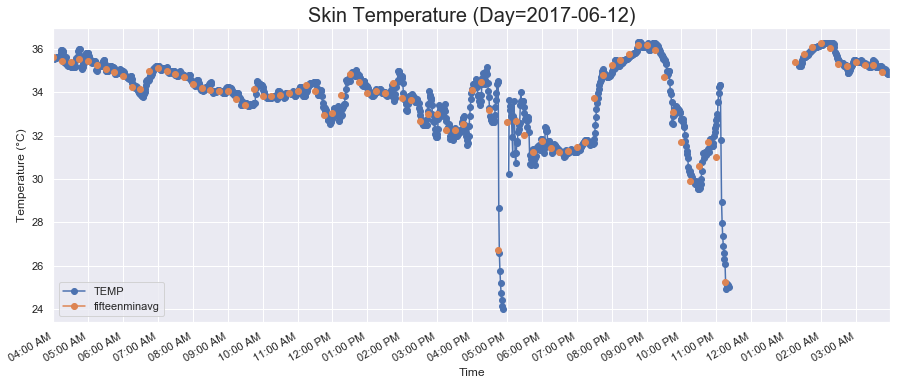

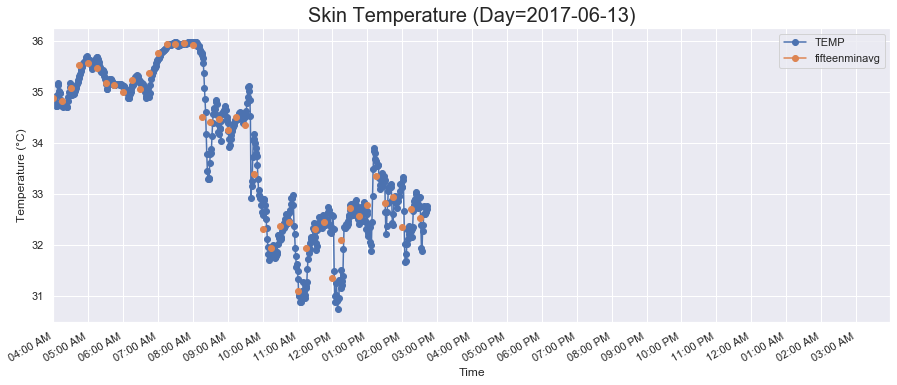

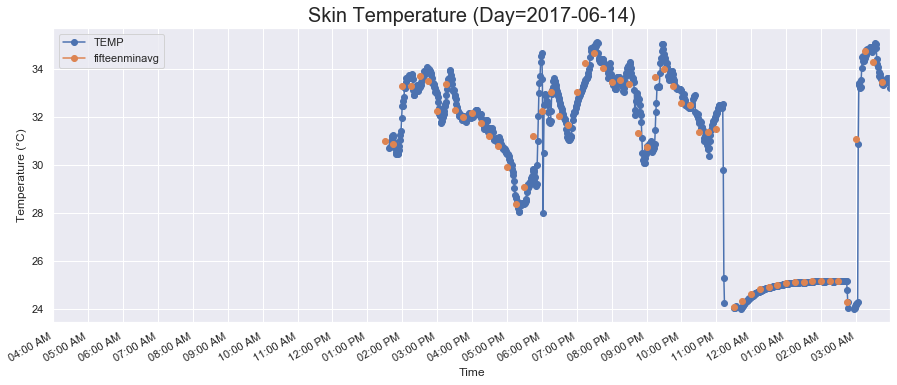

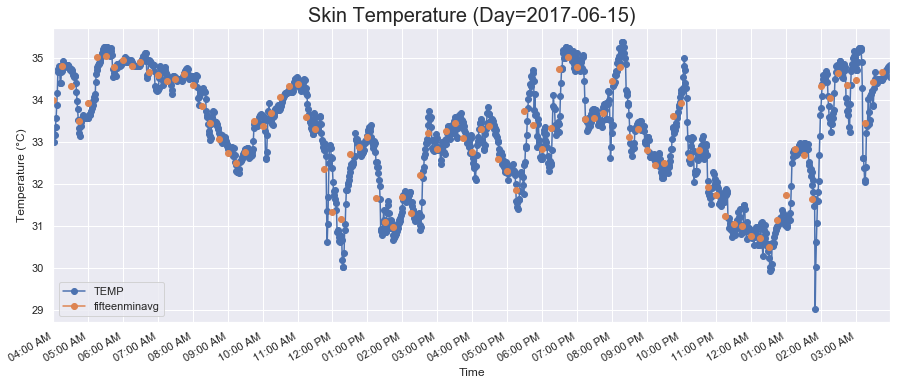

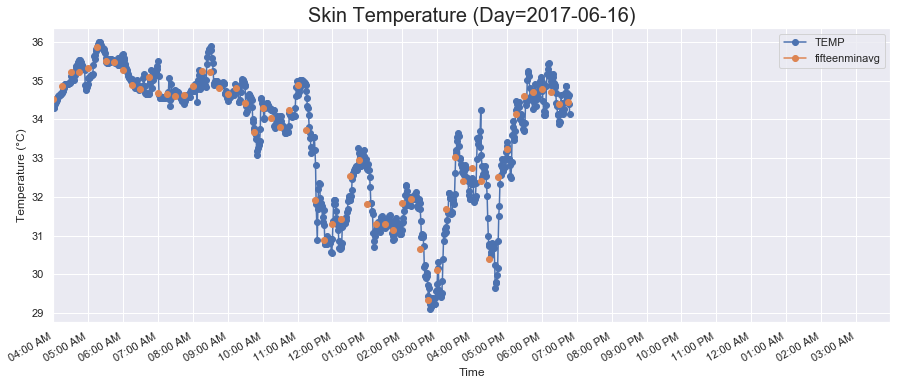

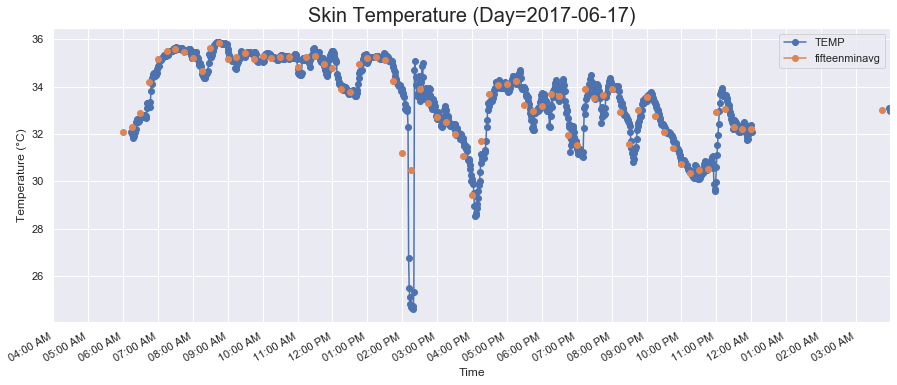

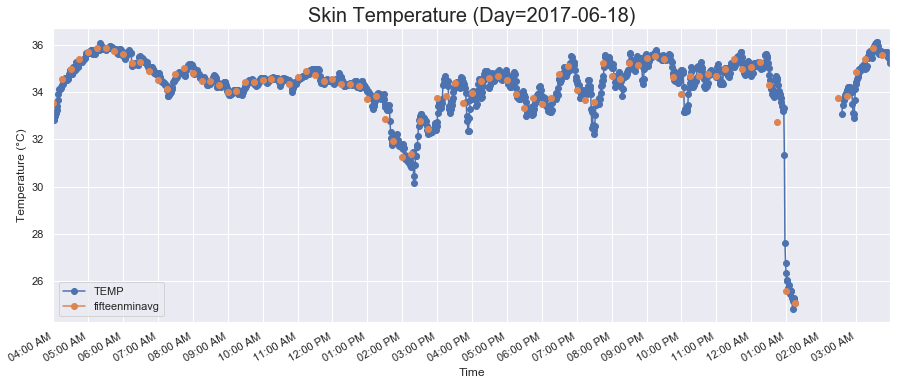

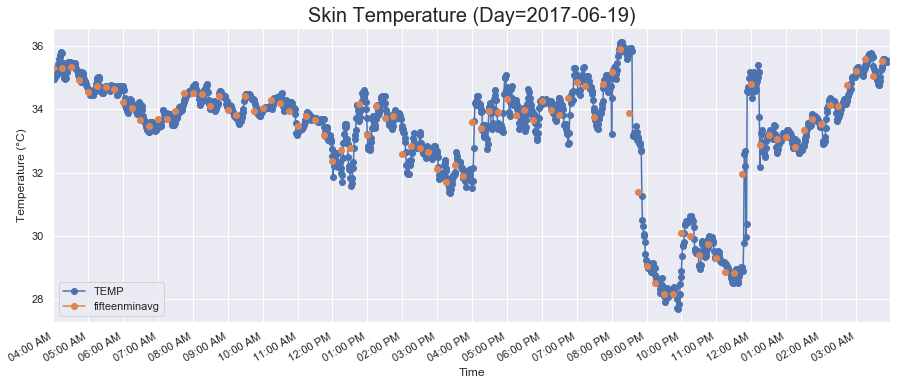

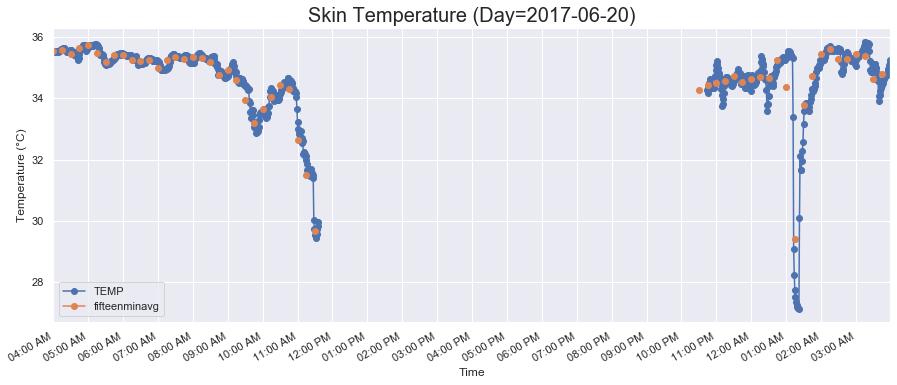

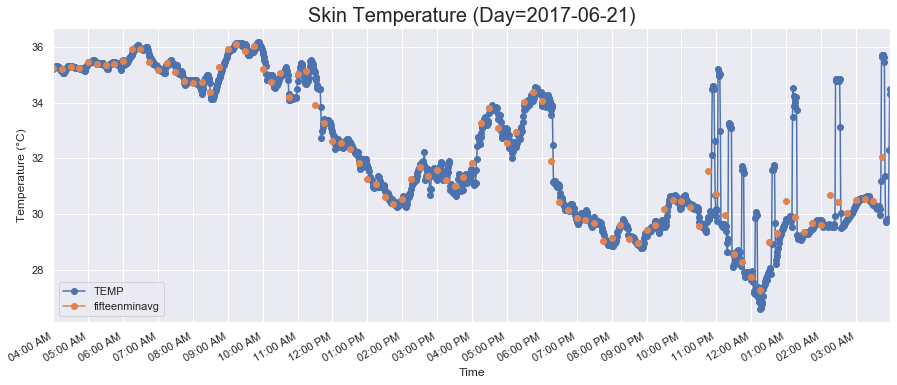

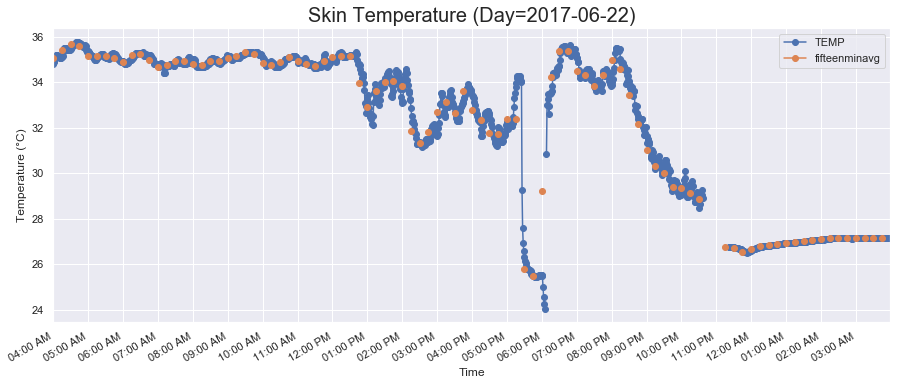

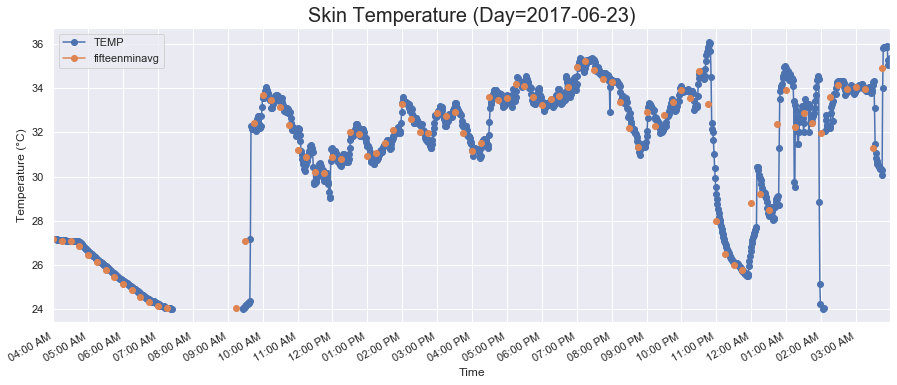

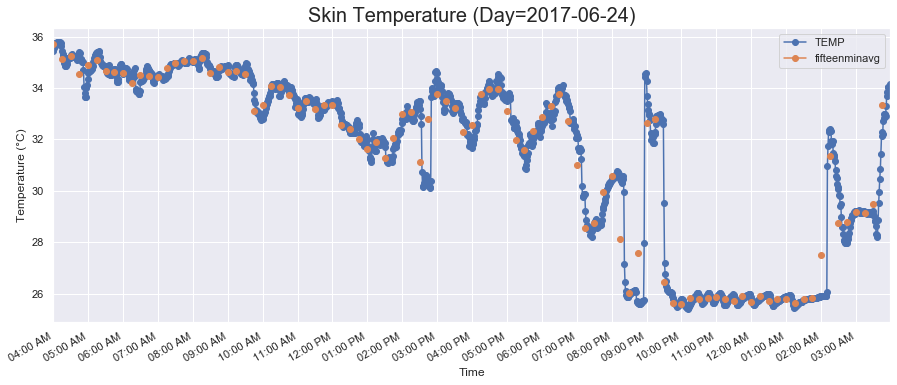

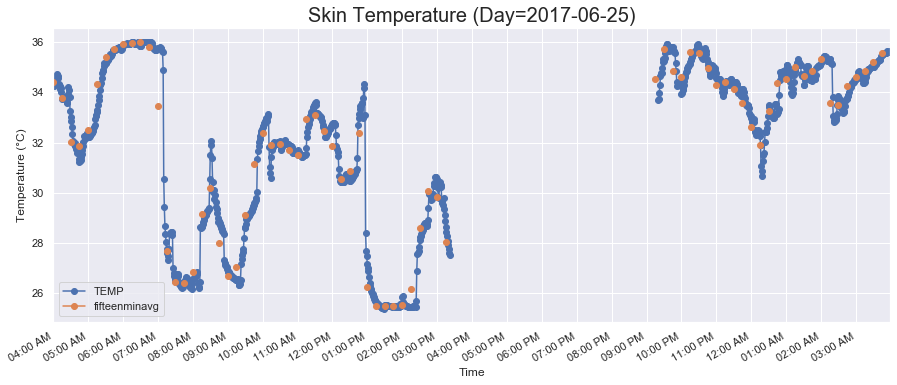

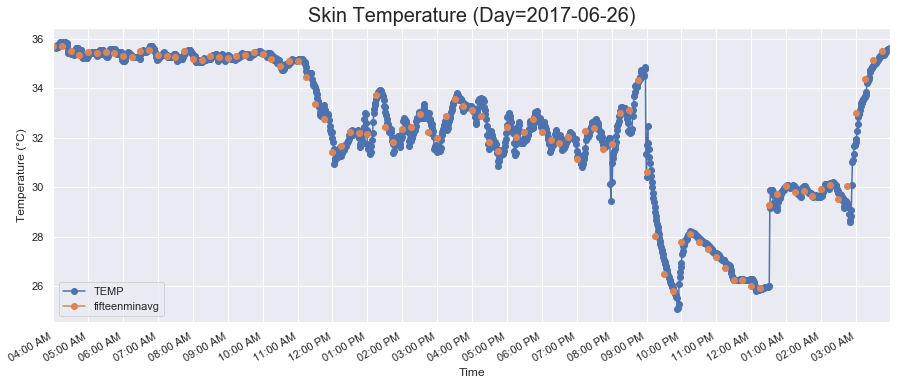

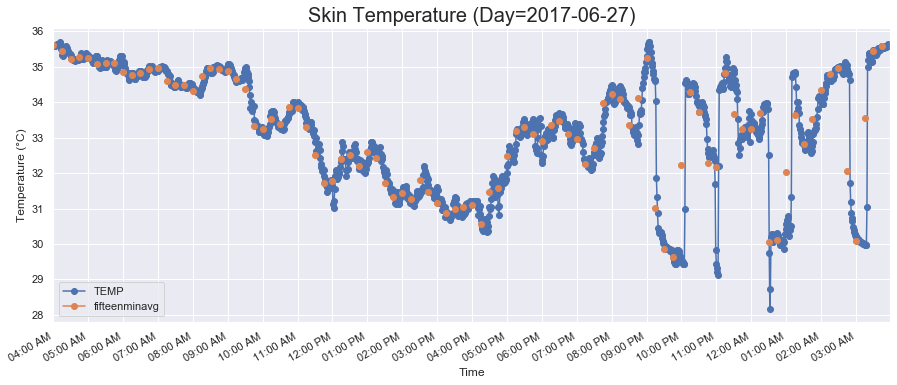

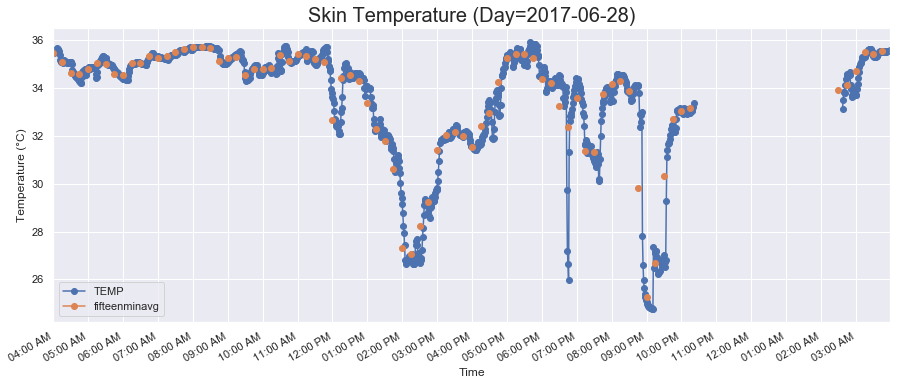

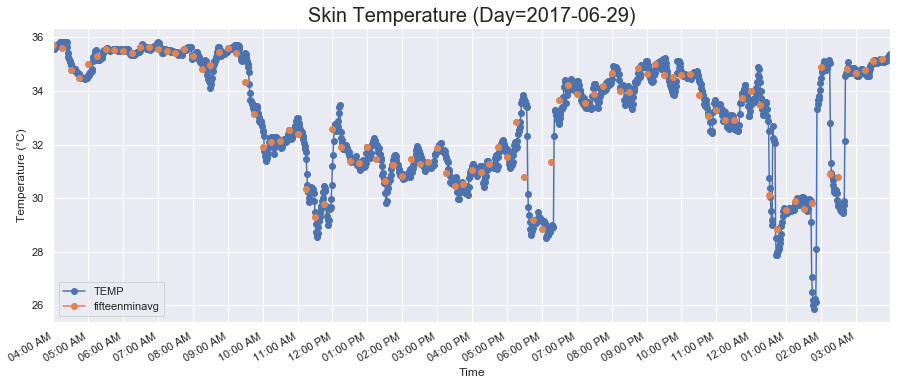

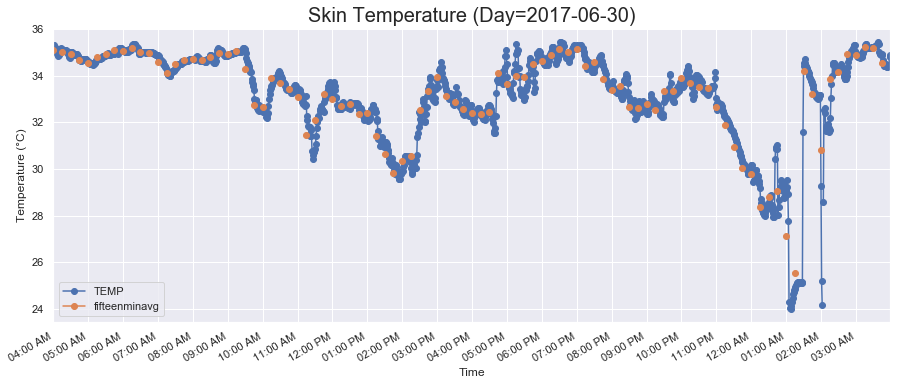

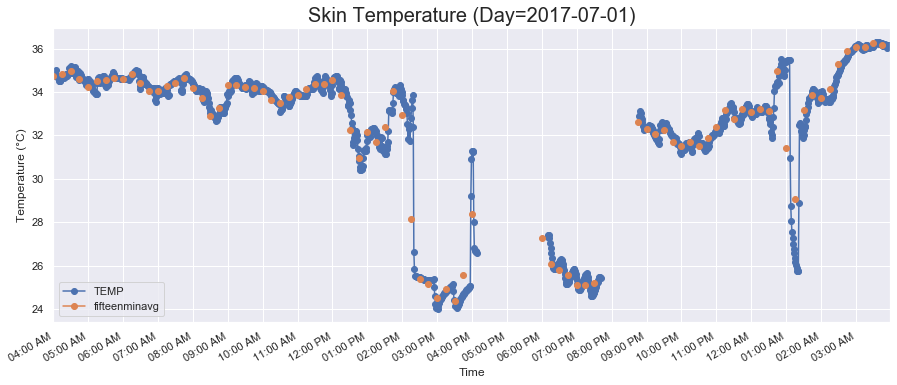

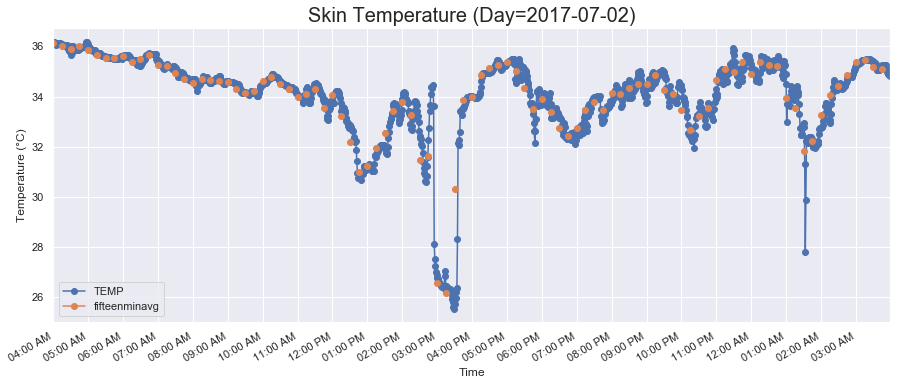

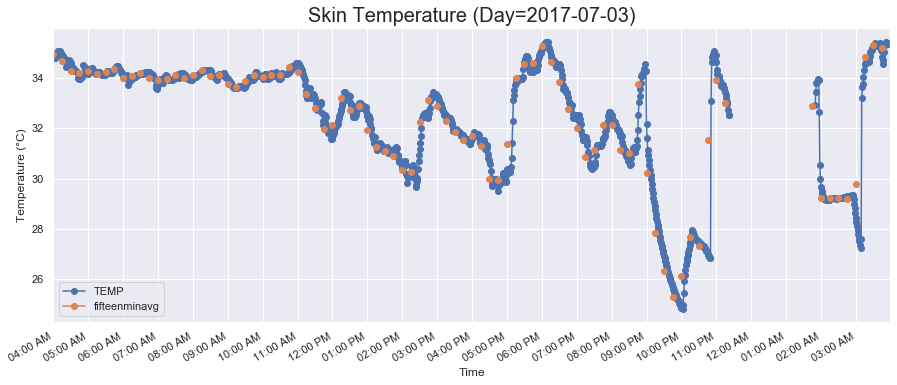

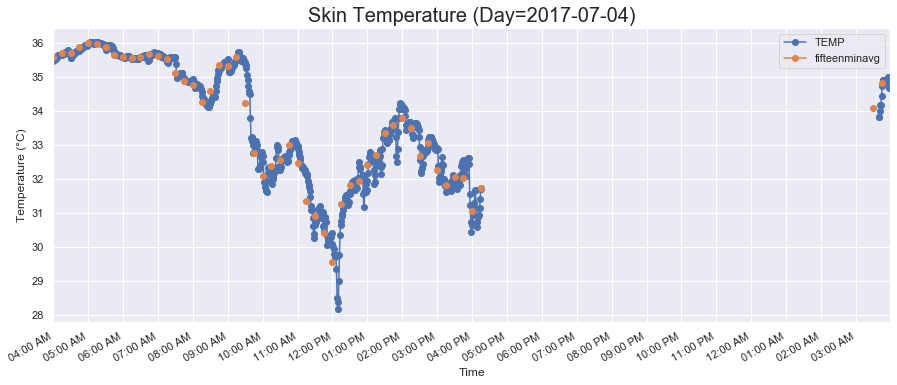

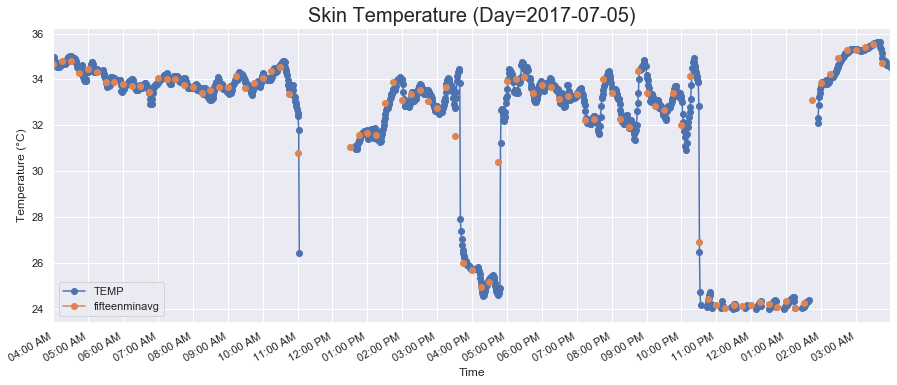

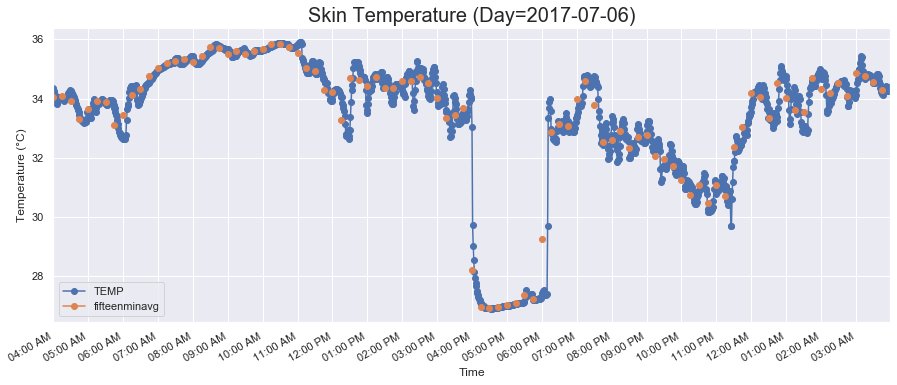

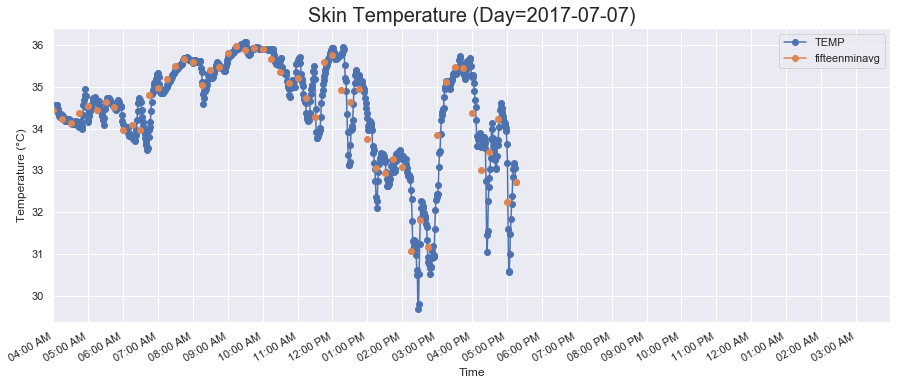

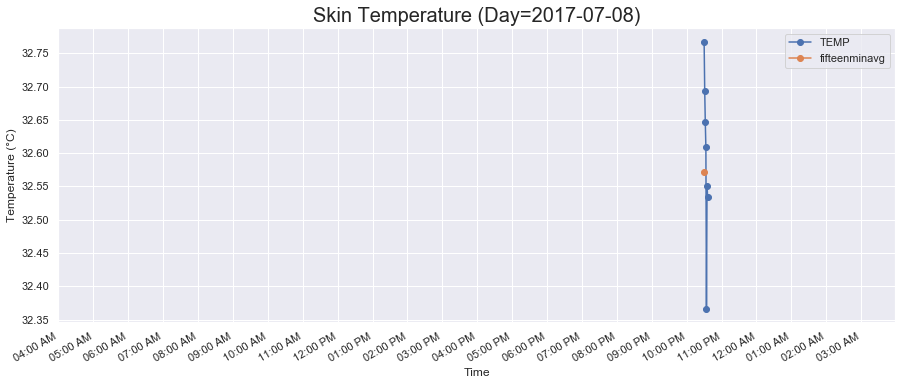

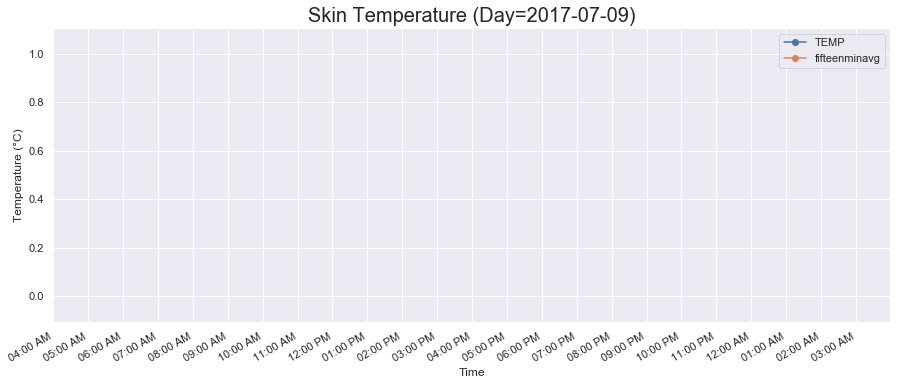

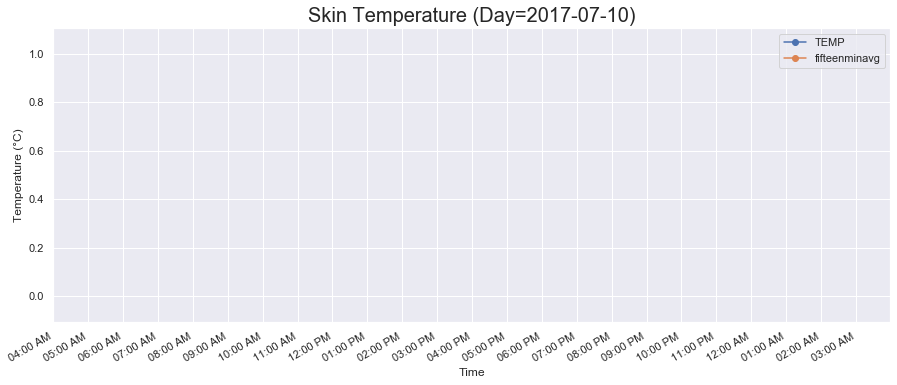

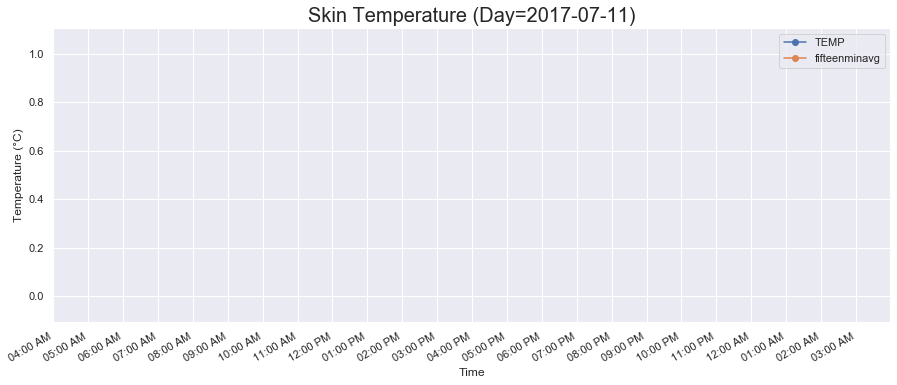

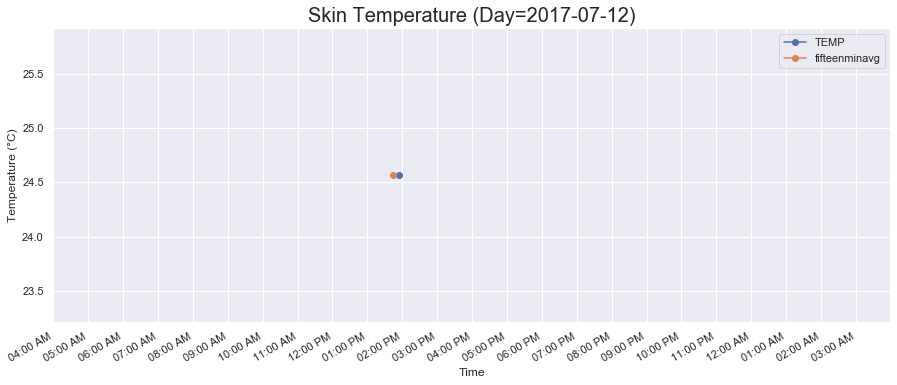

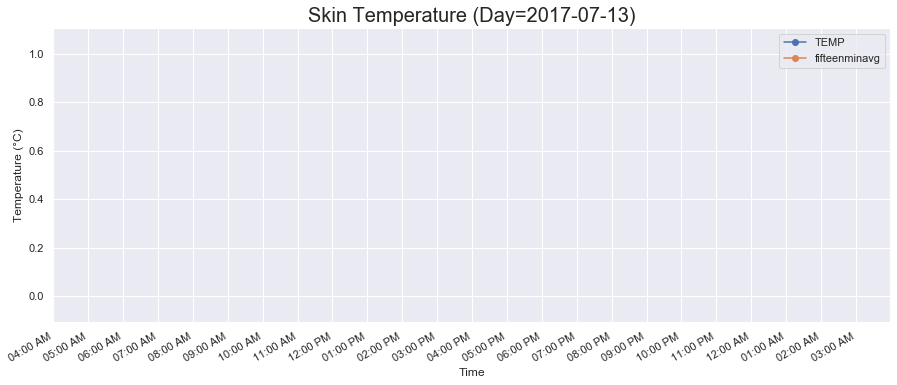

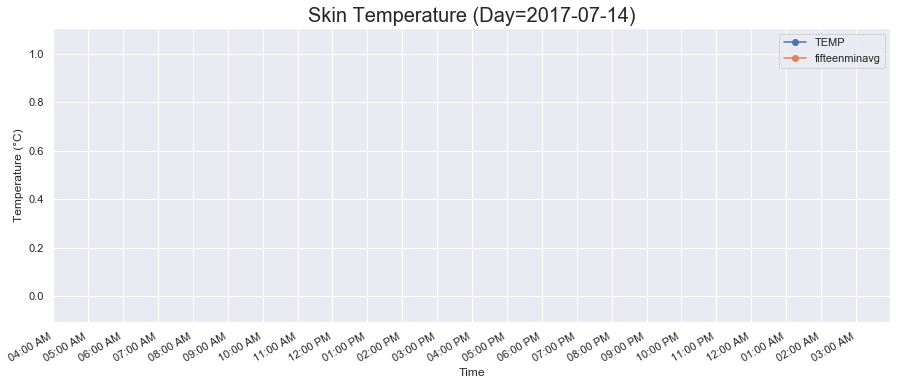

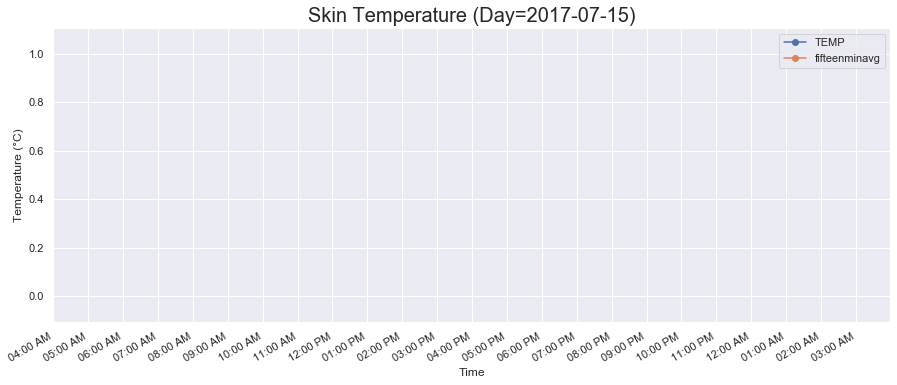

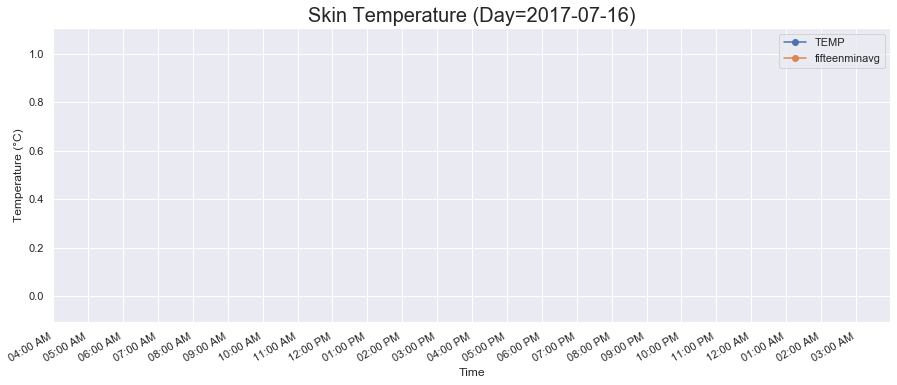

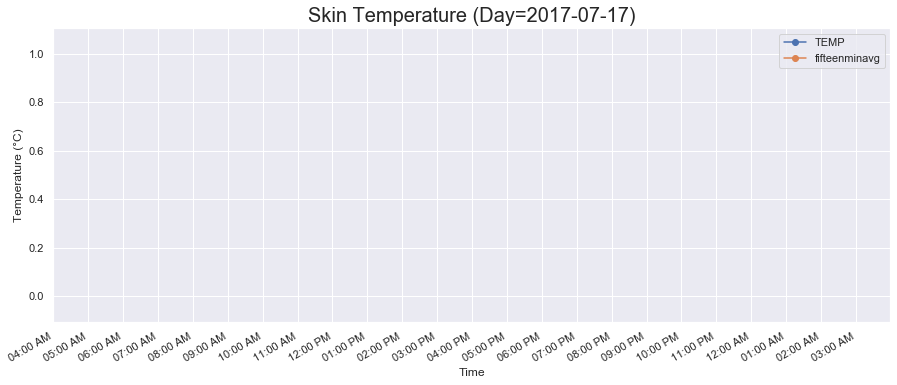

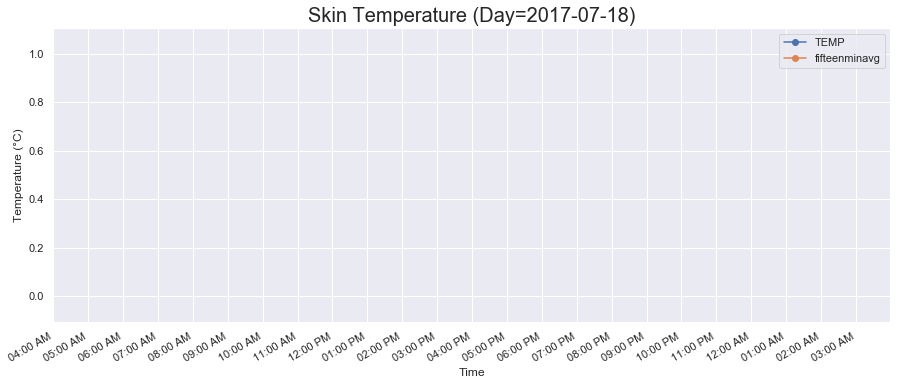

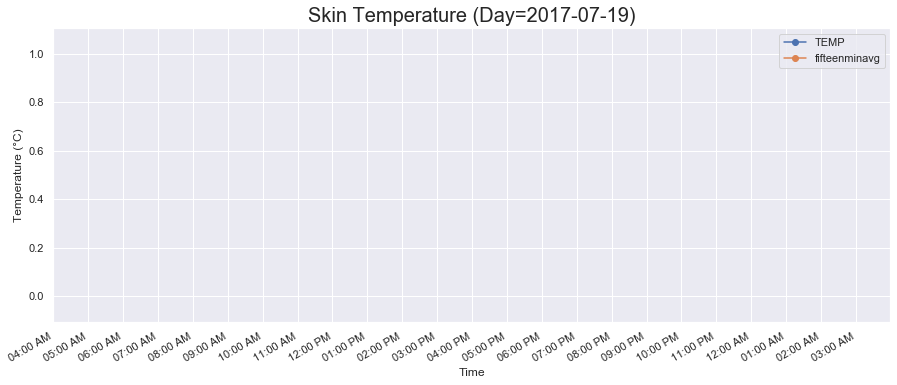

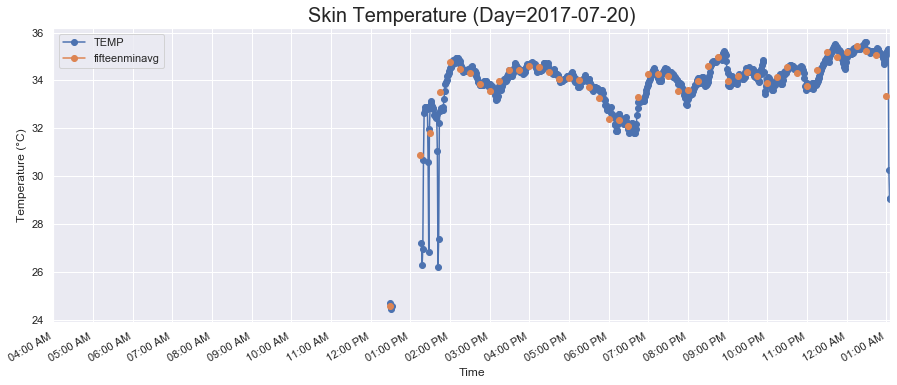

In [72]:
fig, ax = plt.subplots(figsize=(25,15))#figsize=(15,15)
for date in strdate:
    print(date)
    ax=df_sub.loc[date].plot(marker='o')
#     plt.xlim(xmin=datetime.datetime(2017, 1, 4, hour=0),xmax=datetime.datetime(2017, 1, 4, hour=24))
#     ax.set_xlim(["00:00", "23:59"])
    hours = mdates.HourLocator(interval = 1)
    h_fmt = mdates.DateFormatter('%I:%M %p')
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(h_fmt)
    ax=plt.gca()
#     ax.set_xticklabels(tickstime)
    plt.title("Skin Temperature (Day="+str(date)+")",fontsize=20)
    ax.set_ylabel('Temperature (°C)')
    ax.set_xlabel('Time')
#     plt.savefig("Migraine_Plots/Temperature/daily_temperature/Date="+str(date)+""+".png",bbox_inches="tight")


In [ ]:
print(dates)
strdate=[]
for date in dates:
    strdate.append(date.strftime('%Y-%m-%d'))
print(strdate)

In [ ]:
#Weekly with matplotlib sorting dates in correct order
import matplotlib.pyplot as plt
from datetime import time
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
sns.set(style="darkgrid")

# pd.plotting.register_matplotlib_converters()
# # df_temp.plot(x = "DatenTime", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
i = 0
fig, ax = plt.subplots(figsize=(18,8))#figsize=(15,15)
markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
i=0
df_temp.head(5)
for date in dates:
    df = df_sub[df_sub.date == date]
#     plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date+"='{0}'".format(markers[i]))
    plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date)
    
#     plt.plot(df.index,df['TEMP'],'o',label=date)

    i=i+1   
    if i % 1==0:
        i = 0
        print(date)
        plt.plot(df['NewTime'],df['fifteenminavg'], label='Mean', linestyle='--',c='darkgrey')
#         plt.xticks( rotation=25 )
#         ax=plt.gca()
        ax.set_xlim(["00:00:00", "23:59:59"])
        plt.title("Skin Temperature (Week="+str(date)+")",fontsize=20)
#         ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=True))
        # set the label names
        
#         ticks = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM','8 AM','9 AM','10 AM','11 AM','12 PM', '1 PM', '2 PM', '3 PM', '4 PM',  '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM' ]
#         ax.set_xticklabels(tickstime)
#         ax=plt.gca()
        
#         hours = mdates.HourLocator(interval = 1)
#         h_fmt = mdates.DateFormatter('%H:%M:%S')
#         ax.xaxis.set_major_locator(hours)
#         ax.xaxis.set_major_formatter(h_fmt)
        
        ax.set_ylabel('Temperature (°C)')
        ax.set_xlabel('Time')
        fig.autofmt_xdate()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         plt.grid(linestyle='--', alpha=0.5)
       
#         plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
#         plt.legend()
        fig.tight_layout()
#         fig.savefig('test.pdf')
#         plt.savefig("Migraine_Plots/Temperature/daily_temperature/Date="+str(date)+""+".png",bbox_inches="tight")
        plt.show()  
        fig, ax = plt.subplots(figsize=(18,8))#figsize=(15,15)

In [ ]:
#Weekly with matplotlib sorting dates in correct order
import matplotlib.pyplot as plt
from datetime import time
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
sns.set(style="darkgrid")
i = 0
fig, ax = plt.subplots(figsize=(18,8))#figsize=(15,15)
markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
i=0   # variable using for counter if i==7 (weekly)
#made a list of unique dates for loop  
for date in dates:
    # selecting dataframe for specific date
    df = df_sub[df_sub.date == date]
    plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date)   
    i=i+1   
    if i % 1==0:
        i = 0
        print(date)
        plt.plot(df['NewTime'],df['fifteenminavg'], label='Mean', linestyle='--',c='darkgrey')
#         plt.xticks( rotation=25 )
#         ax=plt.gca()
        ax.set_xlim(["00:00:00", "23:59:59"])
        plt.title("Skin Temperature (Week="+str(date)+")",fontsize=20)
#         ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=True))
#         ticks = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM','8 AM','9 AM','10 AM','11 AM','12 PM', '1 PM', '2 PM', '3 PM', '4 PM',  '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM' ]
#         ax.set_xticklabels(tickstime)
#         ax=plt.gca()
#         hours = mdates.HourLocator(interval = 1)
#         h_fmt = mdates.DateFormatter('%H:%M:%S')
#         ax.xaxis.set_major_locator(hours)
#         ax.xaxis.set_major_formatter(h_fmt) 
        ax.set_ylabel('Temperature (°C)')
        ax.set_xlabel('Time')
        fig.autofmt_xdate()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        fig.tight_layout()
        plt.show()  
        fig, ax = plt.subplots(figsize=(18,8))#figsize=(15,15)

In [ ]:
#Weekly with matplotlib sorting dates in correct order
import matplotlib.pyplot as plt
from datetime import time
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
sns.set(style="darkgrid")

# pd.plotting.register_matplotlib_converters()
# # df_temp.plot(x = "DatenTime", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
i = 0
fig, ax = plt.subplots(figsize=(18,8))#figsize=(15,15)
markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
i=0
df_temp.head(5)
for date in dates:
    df = df_sub[df_sub.date == date]
#     plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date+"='{0}'".format(markers[i]))
    plt.plot(df['NewTime'],df['fifteenminavg'],markers[i],label=date)
    
#     plt.plot(df.index,df['TEMP'],'o',label=date)

    i=i+1   
    if i % 7==0:
        i = 0
        print(date)
#         plt.plot(df['NewTime'],df['mean_total'], label='Mean', linestyle='--',c='darkgrey')
#         plt.xticks( rotation=25 )
#         ax=plt.gca()
        ax.set_xlim(["00:00:00", "23:59:59"])
        plt.title("Skin Temperature (Week="+str(date)+")",fontsize=20)
#         ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=True))
        # set the label names
        
#         ticks = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM','8 AM','9 AM','10 AM','11 AM','12 PM', '1 PM', '2 PM', '3 PM', '4 PM',  '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM' ]
#         ax.set_xticklabels(tickstime)
#         ax=plt.gca()
        
#         hours = mdates.HourLocator(interval = 1)
#         h_fmt = mdates.DateFormatter('%H:%M:%S')
#         ax.xaxis.set_major_locator(hours)
#         ax.xaxis.set_major_formatter(h_fmt)
        ax.set_ylabel('Temperature (°C)')
        ax.set_xlabel('Time')
        fig.autofmt_xdate()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         plt.grid(linestyle='--', alpha=0.5)
       
#         plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
#         plt.legend()
        fig.tight_layout()
#         fig.savefig('test.pdf')
        plt.savefig("Migraine_Plots/Temperature/weekly_temperature/Date="+str(date)+""+".png",bbox_inches="tight")
        plt.show()  
        fig, ax = plt.subplots(figsize=(18,8))#figsize=(15,15)

In [ ]:
#monthly with matplotlib sorting dates in correct order
import matplotlib.pyplot as plt
from datetime import time
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
sns.set(style="darkgrid")

# pd.plotting.register_matplotlib_converters()
# # df_temp.plot(x = "DatenTime", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
i = 0
fig, ax = plt.subplots(figsize=(18,8))#figsize=(15,15)
markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
i=0
df_temp.head(5)
for date in dates:
    df = df_sub[df_sub.date == date]
#     plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date+"='{0}'".format(markers[i]))
    plt.plot(df['NewTime'],df['fifteenminavg'],'o')
    
#     plt.plot(df.index,df['TEMP'],'o',label=date)

    i=i+1   
    if i % 30==0:
        i = 0
        print(date)
#         plt.plot(df['NewTime'],df['mean_total'], label='Mean', linestyle='--',c='darkgrey')
#         plt.xticks( rotation=25 )
#         ax=plt.gca()
        ax.set_xlim(["00:00:00", "23:59:59"])
        plt.title("Skin Temperature (Month="+str(date.strftime("%B"))+")",fontsize=20)
#         plt.title("Skin Temperature (Week="+str(date)+")",fontsize=20)
#         ax.set_xticks(np.linspace(0, 2*np.pi, 24, endpoint=True))
        # set the label names
        
#         ticks = ['12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM','8 AM','9 AM','10 AM','11 AM','12 PM', '1 PM', '2 PM', '3 PM', '4 PM',  '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM' ]
#         ax.set_xticklabels(tickstime)
#         ax=plt.gca()
        
#         hours = mdates.HourLocator(interval = 1)
#         h_fmt = mdates.DateFormatter('%H:%M:%S')
#         ax.xaxis.set_major_locator(hours)
#         ax.xaxis.set_major_formatter(h_fmt)
        ax.set_ylabel('Temperature (°C)')
        ax.set_xlabel('Time')
        fig.autofmt_xdate()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         plt.grid(linestyle='--', alpha=0.5)
       
#         plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
#         plt.legend()
        fig.tight_layout()
#         fig.savefig('test.pdf')
        plt.savefig("Migraine_Plots/Temperature/monthly_temperature/Date="+str(date)+""+".png",bbox_inches="tight")
        plt.show()  
        fig, ax = plt.subplots(figsize=(18,8))#figsize=(15,15)

In [ ]:
#Monthly with matplotlib sorting dates in correct order
import matplotlib.pyplot as plt
from datetime import time
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
# sns.set(style="darkgrid")
# df_sub = df_temp[['datess','NewTime','TEMP','mean_total','averagedaytemp']]

df_sub.sort_values(by='datess')
df_sub.head()
all_dates = set(df_sub['datess'])#Getting all dates
all_detes=sorted(all_dates) #sorting them
all_date_list = list(sorted(all_dates)) # putting in a list

pd.plotting.register_matplotlib_converters()
# df_temp.plot(x = "DatenTime", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
i = 0
# fig, ax = plt.subplots(figsize=(25,15))#figsize=(15,15)
markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
i=0
df_temp.head(5)
for date in all_date_list:
    df = df_sub[df_sub.datess == date]
#     plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date+"='{0}'".format(markers[i]))
    plt.plot(df['NewTime'],df['TEMP'],'o')
    i=i+1   
    if i % 30==0:
        i = 0
        print(date)
        plt.plot(df['NewTime'],df['mean_total'], label='Mean', linestyle='--',c='darkgrey')
#         datenums=md.date2num(date)
        plt.xticks( rotation=25 )
#         ax=plt.gca()
        #Set the circumference ticks
        
#         xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
#         ax.xaxis.set_major_formatter(xfmt)
#         ax.set_xlim(["00:00:00", "23:59:59"])
        plt.title("Skin Temperature (Month="+str(date.strftime("%B"))+")",fontsize=20)
        
#         hours = mdates.HourLocator(interval = 1)
#         h_fmt = mdates.DateFormatter('%H:%M:%S')
#         ax.xaxis.set_major_locator(hours)
#         ax.xaxis.set_major_formatter(h_fmt)
        ax.set_ylabel('Temperature (°C)')
        ax.set_xlabel('Time')
        fig.autofmt_xdate()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         plt.grid(linestyle='--', alpha=0.5)
       
#         plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
#         plt.legend()
#         fig.tight_layout()
#         fig.savefig('test.pdf')
#         plt.savefig("monthly_temperature/Date="+str(date)+""+".png",bbox_inches="tight")
        plt.show()  


# EDA(Electrodermal Activity)

In [7]:
#Reading Electrodermal Activity Data
df_eda = get_all_data(dict_vars['EDA'])
df_eda.reset_index(inplace=True,drop=True)

File name:  sensor_data\A010e9_170413-003439 / EDA.csv , Initial Time:  1492043679.0 , Frequency:  4.0 , No of Rows:  325832
File name:  sensor_data\A010e9_170417-154337 / EDA.csv , Initial Time:  1492443817.0 , Frequency:  4.0 , No of Rows:  1958
File name:  sensor_data\A010e9_170420-130630 / EDA.csv , Initial Time:  1492693590.0 , Frequency:  4.0 , No of Rows:  1346
File name:  sensor_data\A010e9_170421-001318 / EDA.csv , Initial Time:  1492733598.0 , Frequency:  4.0 , No of Rows:  162272
File name:  sensor_data\A010e9_170421-133357 / EDA.csv , Initial Time:  1492781637.0 , Frequency:  4.0 , No of Rows:  320738
File name:  sensor_data\A010e9_170422-121529 / EDA.csv , Initial Time:  1492863329.0 , Frequency:  4.0 , No of Rows:  75056
File name:  sensor_data\A010e9_170422-172924 / EDA.csv , Initial Time:  1492882164.0 , Frequency:  4.0 , No of Rows:  132638
File name:  sensor_data\A010e9_170423-024315 / EDA.csv , Initial Time:  1492915395.0 , Frequency:  4.0 , No of Rows:  180842
File 

File name:  sensor_data\A012ce_170420-114354 / EDA.csv , Initial Time:  1492688634.0 , Frequency:  4.0 , No of Rows:  236966
File name:  sensor_data\A012ce_170421-041235 / EDA.csv , Initial Time:  1492747955.0 , Frequency:  4.0 , No of Rows:  330332
File name:  sensor_data\A012ce_170422-122454 / EDA.csv , Initial Time:  1492863894.0 , Frequency:  4.0 , No of Rows:  520112
File name:  sensor_data\A012ce_170424-010522 / EDA.csv , Initial Time:  1492995922.0 , Frequency:  4.0 , No of Rows:  475370
File name:  sensor_data\A012ce_170425-104408 / EDA.csv , Initial Time:  1493117048.0 , Frequency:  4.0 , No of Rows:  386084
File name:  sensor_data\A012ce_170427-031805 / EDA.csv , Initial Time:  1493263085.0 , Frequency:  4.0 , No of Rows:  734240
File name:  sensor_data\A012ce_170429-152714 / EDA.csv , Initial Time:  1493479634.0 , Frequency:  4.0 , No of Rows:  141728
File name:  sensor_data\A012ce_170430-143057 / EDA.csv , Initial Time:  1493562657.0 , Frequency:  4.0 , No of Rows:  139688


In [8]:

print(df_eda.head(10))
df_eda.describe()



     time_stamp       EDA
0  1.492044e+09  0.000000
1  1.492044e+09  0.540559
2  1.492044e+09  0.713487
3  1.492044e+09  1.080104
4  1.492044e+09  0.626718
5  1.492044e+09  0.679237
6  1.492044e+09  0.680518
7  1.492044e+09  0.658742
8  1.492044e+09  0.695889
9  1.492044e+09  0.709980


time_stamp           EDA
count  3.273439e+07  3.273439e+07
mean   1.495503e+09  4.757900e-01
std    2.349490e+06  1.182335e+00
min    1.491404e+09  0.000000e+00
25%    1.493329e+09  2.049100e-02
50%    1.495350e+09  1.613510e-01
75%    1.497788e+09  5.147540e-01
max    1.500599e+09  6.002896e+01

RangeIndex(start=0, stop=32734392, step=1)


NameError: name 'butter_lowpass_filter' is not defined

In [21]:
# Deleting outliers


print("Keeping Values between: ",dict_vars['EDA']['min']," and ",dict_vars['EDA']['max'])
df_eda = df_eda[(df_eda.EDA >= dict_vars['EDA']['min']) &
                                (df_eda.EDA <= dict_vars['EDA']['max'])] #Only keeping values lower than 200

Keeping Values between:  0.0  and  20.0


In [22]:
#Displaying Bar Graph of Count
# display_frequency_bar_chart(df_eda['EDA'],"Electrodermal Activity Micro siemens (μS)","Count")
# print("Data Size after removing outliers" + str(df_eda.shape))
df_eda.sort_values('time_stamp',inplace=True)#Sorting by index time_stamp
df_eda['mydatentime'] = df_eda['time_stamp'].map(r)
df_eda.set_index('mydatentime', inplace=True)
df_eda1=df_eda.resample('T').mean()
# oneminuteaverage=df_temp.resample('T').mean()
# print(len(oneminuteaverage.index))
df_eda1['Mean']=df_eda1['EDA'].resample('15T').mean()

df_eda1.drop('time_stamp', axis=1, inplace=True)
df_eda1['date']=df_eda1.index.map(lambda t: t.date())
df_eda1['NewTime']=df_eda1.index.map(lambda t: t.time())
df_eda1.head(20)

EDA      Mean        date   NewTime
mydatentime                                                        
2017-04-05 10:51:00-04:00  4.313292       NaN  2017-04-05  10:51:00
2017-04-05 10:52:00-04:00  4.588625       NaN  2017-04-05  10:52:00
2017-04-05 10:53:00-04:00  3.591433       NaN  2017-04-05  10:53:00
2017-04-05 10:54:00-04:00  2.990061       NaN  2017-04-05  10:54:00
2017-04-05 10:55:00-04:00  2.497858       NaN  2017-04-05  10:55:00
2017-04-05 10:56:00-04:00  2.083676       NaN  2017-04-05  10:56:00
2017-04-05 10:57:00-04:00  1.586507       NaN  2017-04-05  10:57:00
2017-04-05 10:58:00-04:00  1.289447       NaN  2017-04-05  10:58:00
2017-04-05 10:59:00-04:00  1.292472       NaN  2017-04-05  10:59:00
2017-04-05 11:00:00-04:00  0.847288  0.317669  2017-04-05  11:00:00
2017-04-05 11:01:00-04:00  0.380312       NaN  2017-04-05  11:01:00
2017-04-05 11:02:00-04:00  0.233149       NaN  2017-04-05  11:02:00
2017-04-05 11:03:00-04:00  0.310394       NaN  2017-04-05  11:03:00
2017-04-05 11:04:00-04:00  0.353256       NaN  2017-04-05  11:04:00
2017-04-05 11:05:00-04:00  0.432484       NaN  2017-04-05  11:05:00
2017-04-05 11:06:00-04:00  0.285962       NaN  2017-04-05  11:06:00
2017-04-05 11:07:00-04:00  0.344759       NaN  2017-04-05  11:07:00
2017-04-05 11:08:00-04:00  0.225275       NaN  2017-04-05  11:08:00
2017-04-05 11:09:00-04:00  0.196670       NaN  2017-04-05  11:09:00
2017-04-05 11:10:00-04:00  0.192400       NaN  2017-04-05  11:10:00

In [23]:

dates=df_eda1.index.map(lambda t: t.date()).unique()
df_eda1.head(30)
strdate=[]
for date in dates:
    strdate.append(date.strftime('%Y-%m-%d'))
print(strdate)

['2017-04-05', '2017-04-06', '2017-04-07', '2017-04-08', '2017-04-09', '2017-04-10', '2017-04-11', '2017-04-12', '2017-04-13', '2017-04-14', '2017-04-15', '2017-04-16', '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20', '2017-04-21', '2017-04-22', '2017-04-23', '2017-04-24', '2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28', '2017-04-29', '2017-04-30', '2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04', '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08', '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12', '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16', '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20', '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28', '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01', '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05', '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13', '2017-06-14', '2017

In [28]:
# resampling to 8hz
def interpolateEmptyValues(data):
    cols = data.columns.values
    for c in cols:
        data.loc[:, c] = data[c].interpolate()

    return data

def interpolateDataTo8Hz(data,sample_rate,startTime):
    if sample_rate<8:
        # Upsample by linear interpolation
        if sample_rate==2:
            data.index = pd.date_range(start=startTime, periods=len(data), freq='500L')
        elif sample_rate==4:
            data.index = pd.date_range(start=startTime, periods=len(data), freq='250L')
        data = data.resample("125L").mean()
    else:
        if sample_rate>8:
            # Downsample
            idx_range = list(range(0,len(data))) # TODO: double check this one
            data = data.iloc[idx_range[0::int(int(sample_rate)/8)]]
        # Set the index to be 8Hz
        data.index = pd.date_range(start=startTime, periods=len(data), freq='125L')

    # Interpolate all empty values
    data = interpolateEmptyValues(data)
    return data

startTime=df_eda.index[0]

interpolateDataTo8Hz(df_eda,4,startTime)

time_stamp       EDA
2017-04-05 10:51:39-04:00         1.491404e+09  0.000000
2017-04-05 10:51:39.125000-04:00  1.491404e+09  0.421919
2017-04-05 10:51:39.250000-04:00  1.491404e+09  0.843838
2017-04-05 10:51:39.375000-04:00  1.491404e+09  1.017477
2017-04-05 10:51:39.500000-04:00  1.491404e+09  1.191116
2017-04-05 10:51:39.625000-04:00  1.491404e+09  1.410113
2017-04-05 10:51:39.750000-04:00  1.491404e+09  1.629110
2017-04-05 10:51:39.875000-04:00  1.491404e+09  1.867970
2017-04-05 10:51:40-04:00         1.491404e+09  2.106829
2017-04-05 10:51:40.125000-04:00  1.491404e+09  2.350861
2017-04-05 10:51:40.250000-04:00  1.491404e+09  2.594893
2017-04-05 10:51:40.375000-04:00  1.491404e+09  2.856167
2017-04-05 10:51:40.500000-04:00  1.491404e+09  3.117440
2017-04-05 10:51:40.625000-04:00  1.491404e+09  3.365530
2017-04-05 10:51:40.750000-04:00  1.491404e+09  3.613620
2017-04-05 10:51:40.875000-04:00  1.491404e+09  3.861706
2017-04-05 10:51:41-04:00         1.491404e+09  4.109793
2017-04-05 10:51:41.125000-04:00  1.491404e+09  4.158677
2017-04-05 10:51:41.250000-04:00  1.491404e+09  4.207560
2017-04-05 10:51:41.375000-04:00  1.491404e+09  4.281828
2017-04-05 10:51:41.500000-04:00  1.491404e+09  4.356096
2017-04-05 10:51:41.625000-04:00  1.491404e+09  4.362499
2017-04-05 10:51:41.750000-04:00  1.491404e+09  4.368901
2017-04-05 10:51:41.875000-04:00  1.491404e+09  4.445730
2017-04-05 10:51:42-04:00         1.491404e+09  4.522559
2017-04-05 10:51:42.125000-04:00  1.491404e+09  4.628508
2017-04-05 10:51:42.250000-04:00  1.491404e+09  4.734458
2017-04-05 10:51:42.375000-04:00  1.491404e+09  4.763909
2017-04-05 10:51:42.500000-04:00  1.491404e+09  4.793360
2017-04-05 10:51:42.625000-04:00  1.491404e+09  4.826013
...                                        ...       ...
2017-07-09 02:39:09.875000-04:00  1.500599e+09  0.038412
2017-07-09 02:39:10-04:00         1.500599e+09  0.038412
2017-07-09 02:39:10.125000-04:00  1.500599e+09  0.038412
2017-07-09 02:39:10.250000-04:00  1.500599e+09  0.038412
2017-07-09 02:39:10.375000-04:00  1.500599e+09  0.038412
2017-07-09 02:39:10.500000-04:00  1.500599e+09  0.038412
2017-07-09 02:39:10.625000-04:00  1.500599e+09  0.038412
2017-07-09 02:39:10.750000-04:00  1.500599e+09  0.038412
2017-07-09 02:39:10.875000-04:00  1.500599e+09  0.038412
2017-07-09 02:39:11-04:00         1.500599e+09  0.038412
2017-07-09 02:39:11.125000-04:00  1.500599e+09  0.039053
2017-07-09 02:39:11.250000-04:00  1.500599e+09  0.039693
2017-07-09 02:39:11.375000-04:00  1.500599e+09  0.039053
2017-07-09 02:39:11.500000-04:00  1.500599e+09  0.038412
2017-07-09 02:39:11.625000-04:00  1.500599e+09  0.037772
2017-07-09 02:39:11.750000-04:00  1.500599e+09  0.037132
2017-07-09 02:39:11.875000-04:00  1.500599e+09  0.032650
2017-07-09 02:39:12-04:00         1.500599e+09  0.028169
2017-07-09 02:39:12.125000-04:00  1.500599e+09  0.071063
2017-07-09 02:39:12.250000-04:00  1.500599e+09  0.113956
2017-07-09 02:39:12.375000-04:00  1.500599e+09  0.076184
2017-07-09 02:39:12.500000-04:00  1.500599e+09  0.038412
2017-07-09 02:39:12.625000-04:00  1.500599e+09  0.037772
2017-07-09 02:39:12.750000-04:00  1.500599e+09  0.037132
2017-07-09 02:39:12.875000-04:00  1.500599e+09  0.038413
2017-07-09 02:39:13-04:00         1.500599e+09  0.039693
2017-07-09 02:39:13.125000-04:00  1.500599e+09  0.039053
2017-07-09 02:39:13.250000-04:00  1.500599e+09  0.038412
2017-07-09 02:39:13.375000-04:00  1.500599e+09  0.038412
2017-07-09 02:39:13.500000-04:00  1.500599e+09  0.038412

[65427637 rows x 2 columns]

In [29]:

def butter_lowpass(cutoff, fs, order=5):
    # Filtering Helper functions
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = scisig.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a
#low pass filter
def butter_lowpass_filter(data, cutoff, fs, order=5):
    # Filtering Helper functions
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = scisig.lfilter(b, a, data)
    return y

df_eda['filtered_eda'] =  butter_lowpass_filter(df_eda['EDA'], 1.0, 8, 6)



NameError: name 'butter_lowpass' is not defined

In [11]:
# df_eda1.head(30)
df_sub1=df_eda1
df_sub1.describe()

EDA         Mean
count  105669.000000  7092.000000
mean        0.477382     0.479637
std         1.039224     1.015601
min         0.000000     0.000000
25%         0.048675     0.057180
50%         0.196077     0.206874
75%         0.503959     0.499682
max        19.874187    19.391089

(736530.1666666666, 736531.0458333333)

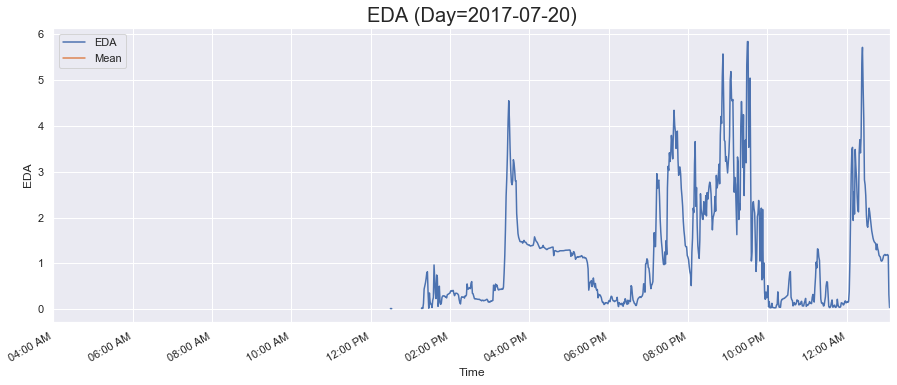

In [103]:
#eda daily
import seaborn as sns


ax=df_sub1.loc[date].plot()
hours = mdates.HourLocator(interval = 2)
h_fmt = mdates.DateFormatter('%I:%M %p')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
# ax.set_xlim([date+" 00:00", date+" 23:59"])
# ax.set_xlim(["00:00:00", "23:59:59"])
# ax=plt.gca()
# plt.gcf().autofmt_xdate()
#     ax.set_xticklabels(tickstime)
plt.title("EDA (Day="+str(date)+")",fontsize=20)
ax.set_ylabel('EDA')
ax.set_xlabel('Time')
# ax.set_xticks(xlabels)
# ax.set_xticklabels(rotation=20)
ax.set_xlim()
# plt.savefig("Migraine_Plots/EDA/daily_eda/Date="+str(date)+""+".png",bbox_inches="tight")


In [24]:
#eda daily
import seaborn as sns
for date in strdate:
    ax=df_sub1.loc[date].plot()
    ax.set_xlim([date+" 00:00:00", date+" 23:59:59"])
    hours = mdates.HourLocator(interval = 1)
    h_fmt = mdates.DateFormatter('%I:%M %p')
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(h_fmt)
    ax=plt.gca()
#     ax.set_xticklabels(tickstime)
    plt.title("EDA (Day="+str(date)+")",fontsize=20)
    ax.set_ylabel('EDA')
    ax.set_xlabel('Time')
    plt.savefig("Migraine_Plots/EDA/daily_eda/Date="+str(date)+""+".png",bbox_inches="tight")


In [ ]:
# ticks = ['12:00 AM', '1:00 AM', '2:00 AM', '3:00 AM', '4:00 AM', '5:00 AM', '6:00 AM', '7:00 AM','8:00 AM','9:00 AM','10:00 AM','11:00 AM','12:00 PM', '1:00 PM', '2:00 PM', '3:00 PM', '4:00 PM',  '5:00 PM', '6:00 PM', '7:00 PM', '8:00 PM', '9:00 PM', '10:00 PM', '11:00 PM' ]
# tickstime=[]
# format = '%H:%M %p'
# for tic in ticks:
#     tickstime.append(datetime.strptime(tic, format).time())
# print(tickstime)
import seaborn as sns

df_sub1.loc[date].plot()
# ax=plt.gca()
# # ax.set_xlim(["12:00 AM", "11:59 AM"])
# hours = mdates.HourLocator(interval = 1)
# h_fmt = mdates.DateFormatter('%I:%M')
# ax.xaxis.set_major_locator(hours)
# ax.xaxis.set_major_formatter(h_fmt)

# # ax.set_xticklabels(tickstime)
# plt.title("EDA (Day="+str(date)+")",fontsize=20)
# ax.set_ylabel('EDA')
# ax.set_xlabel('Time')
# plt.savefig("Migraine_Plots/EDA/daily_eda/Date="+str(date)+""+".png",bbox_inches="tight")


In [ ]:
df_sub1.loc['2017-05-31 08']

In [ ]:
#eda pangaaas
from datetime import date, timedelta
df_s=df_sub1[['EDA','Mean']]
df_s.loc[strdate[14]:strdate[20]].plot(linestyle='--',marker='o')
# ax.set_xlim(["00:00:00", "23:59:59"])
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%I:%M %p')
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
# ax=plt.gca()
# ax.set_xticklabels(tickstime)
plt.title("EDA (Day="+str(date)+")",fontsize=20)
ax.set_ylabel('EDA')
ax.set_xlabel('Time')
# plt.savefig("Migraine_Plots/EDA/daily_eda/Date="+str(date)+""+".png",bbox_inches="tight")


2017-04-11


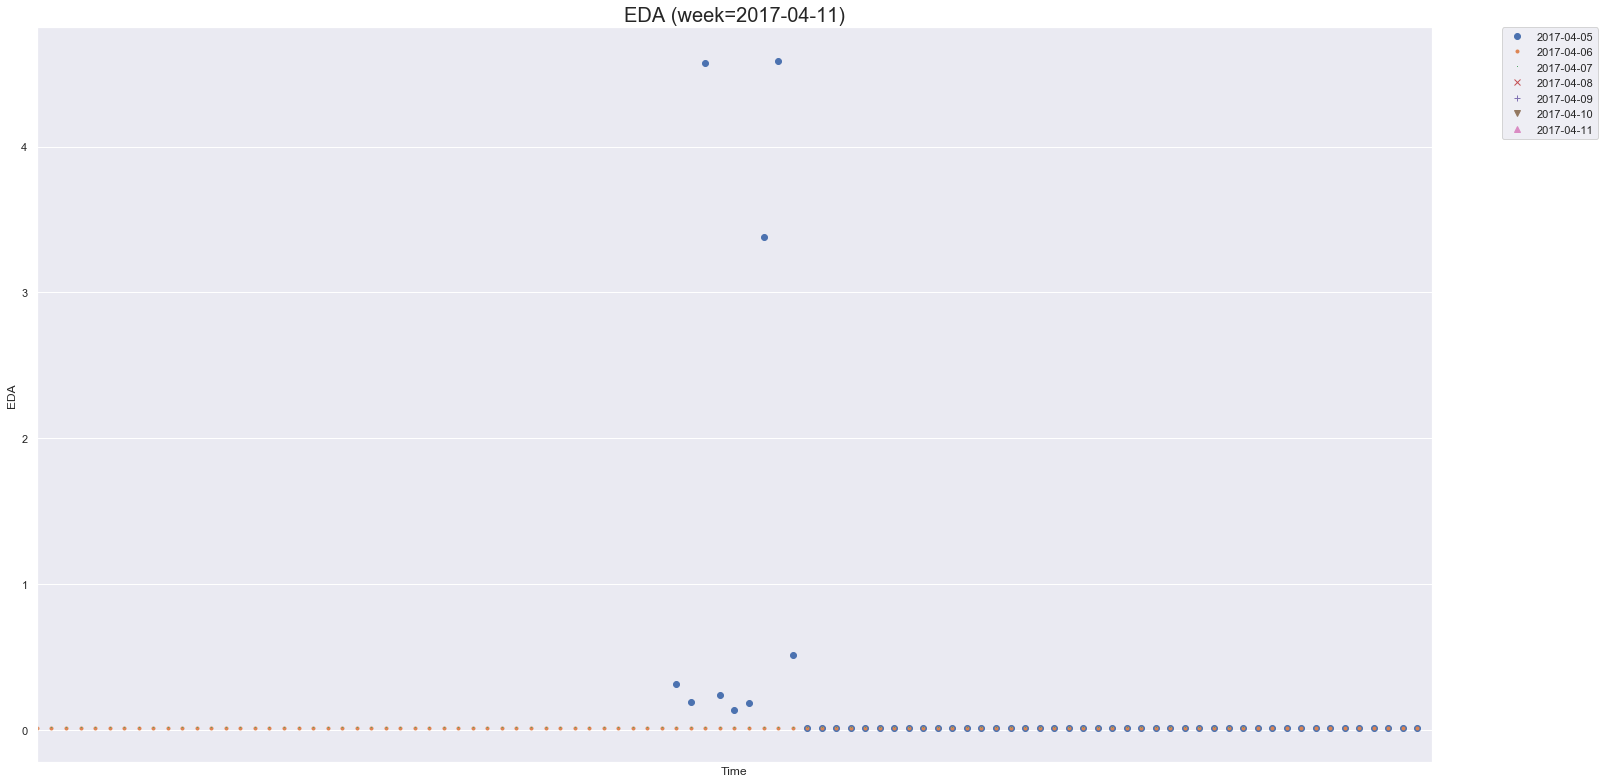

2017-04-18


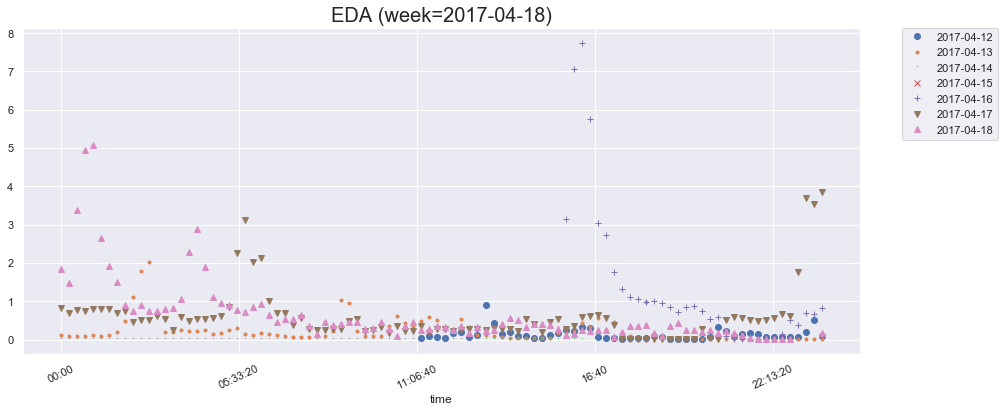

2017-04-25


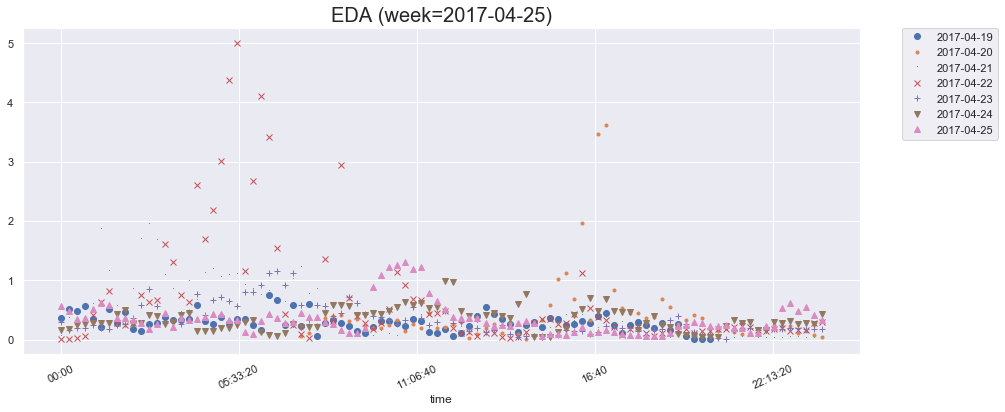

2017-05-02


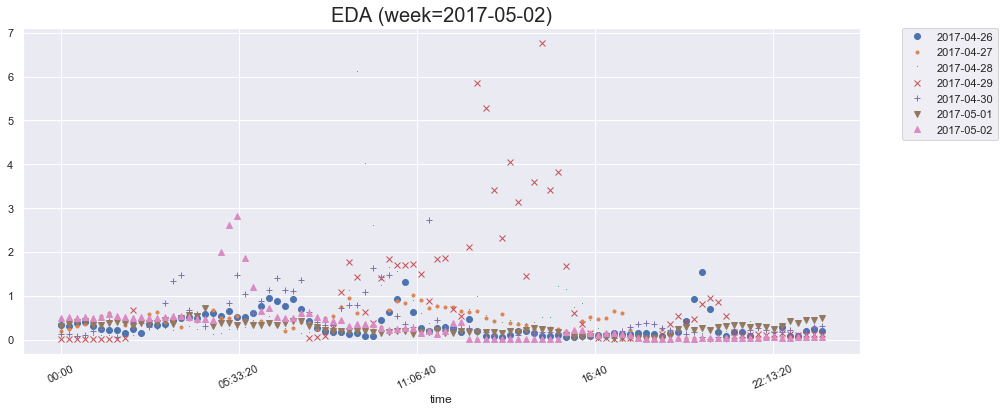

2017-05-09


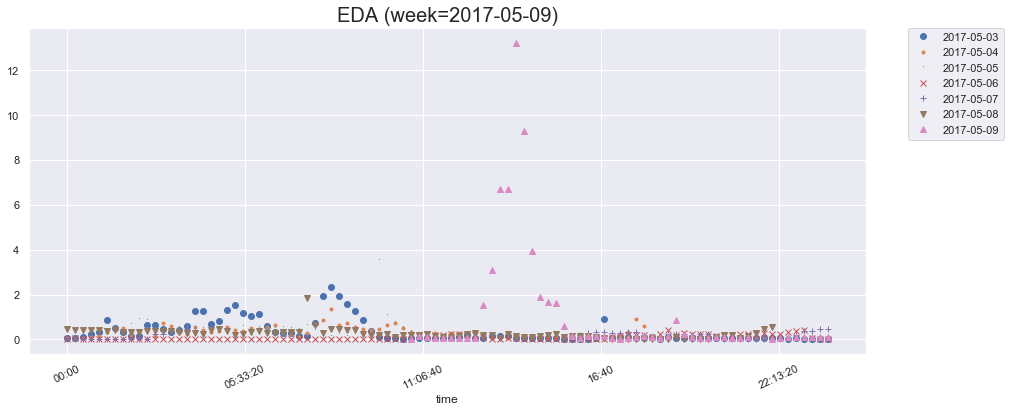

2017-05-16


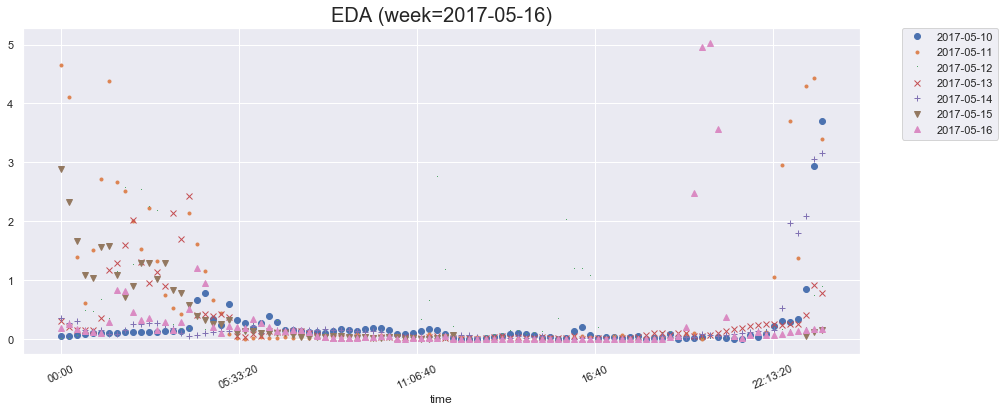

2017-05-23


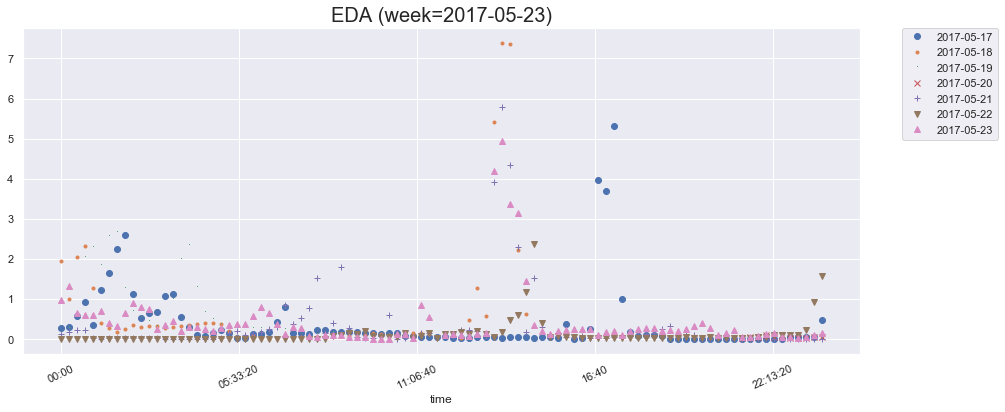

2017-05-30


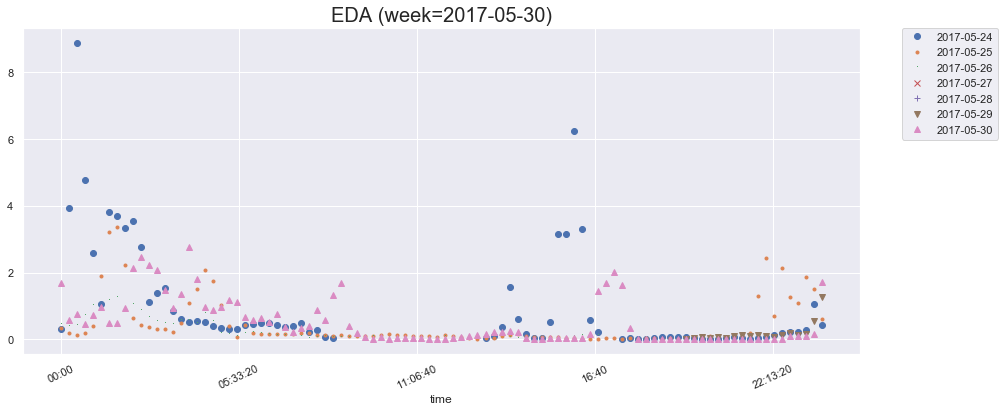

2017-06-06


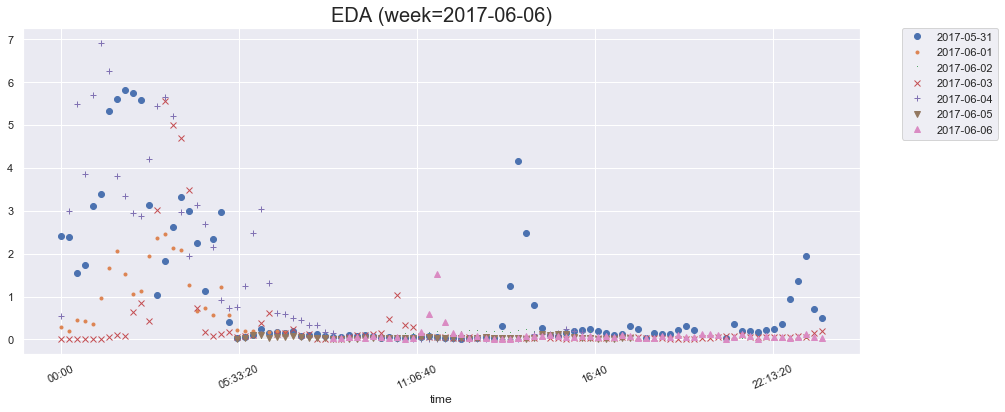

2017-06-13


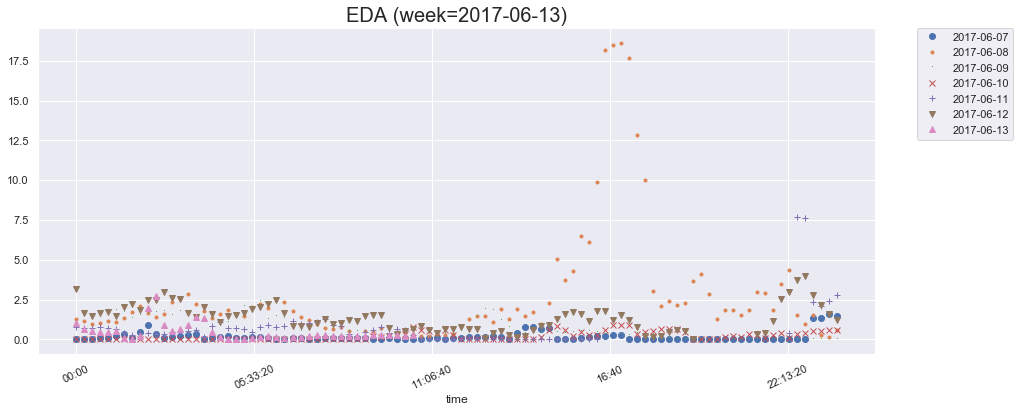

2017-06-20


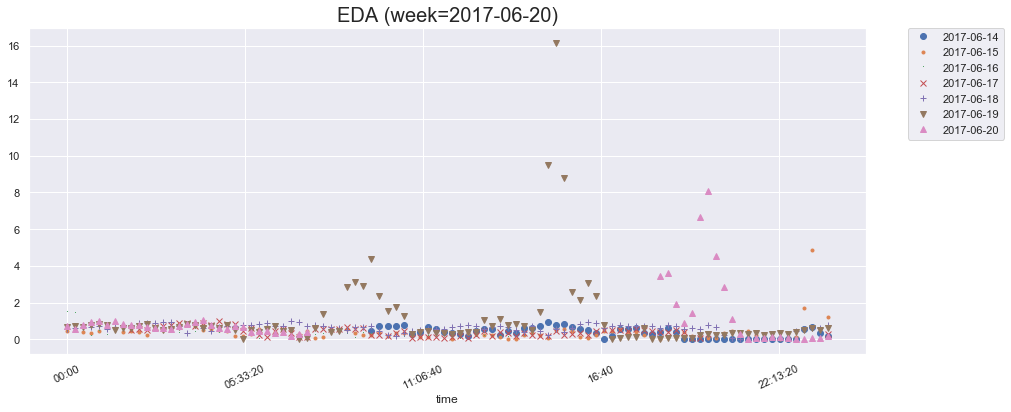

2017-06-27


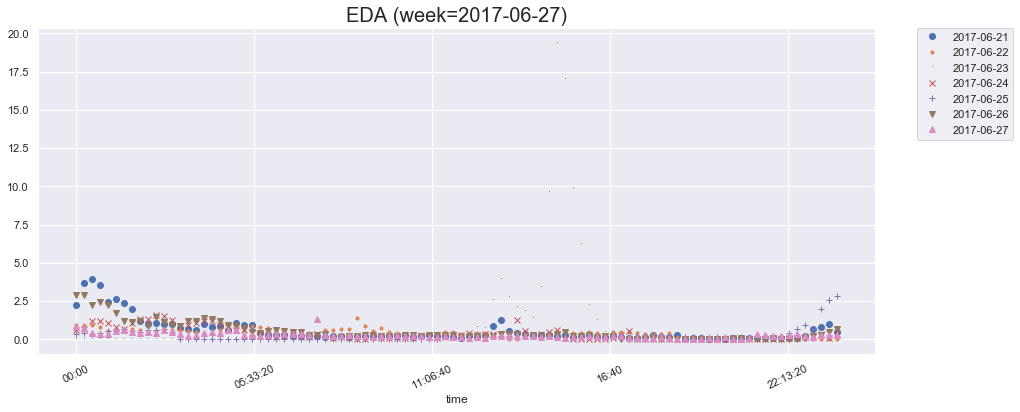

2017-07-04


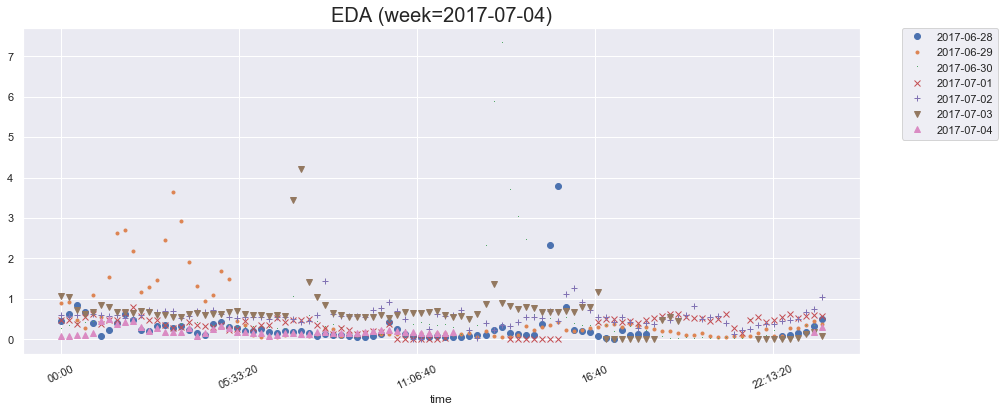

2017-07-11


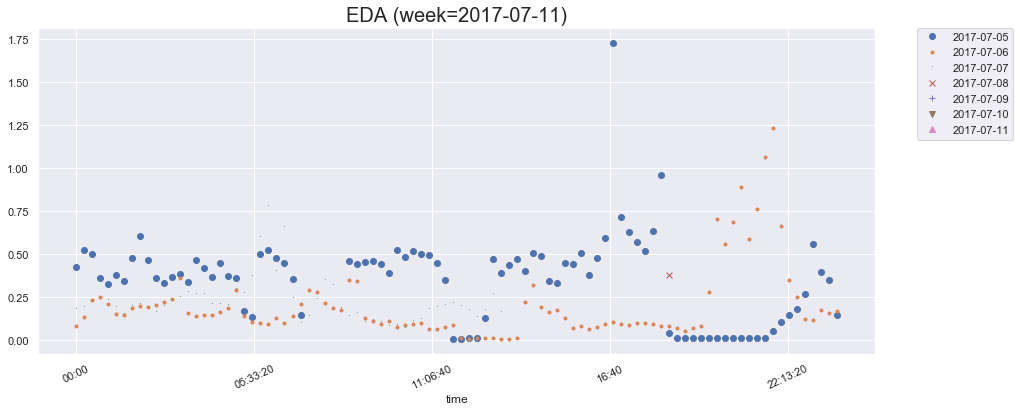

2017-07-18


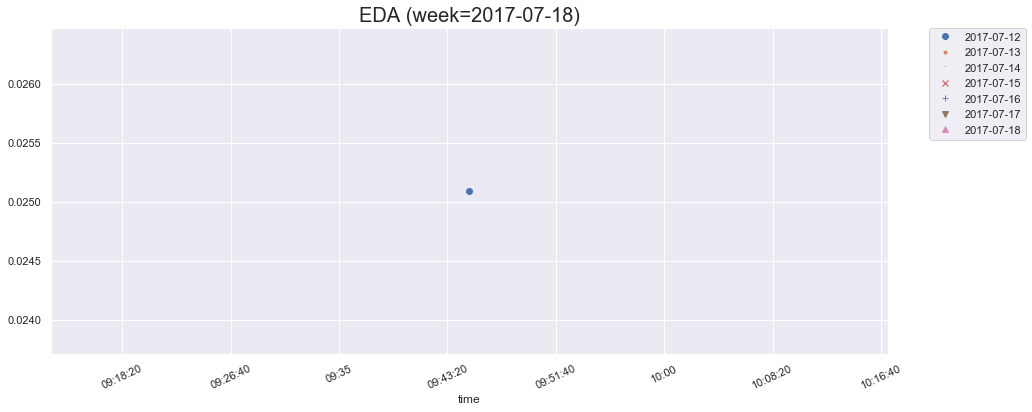

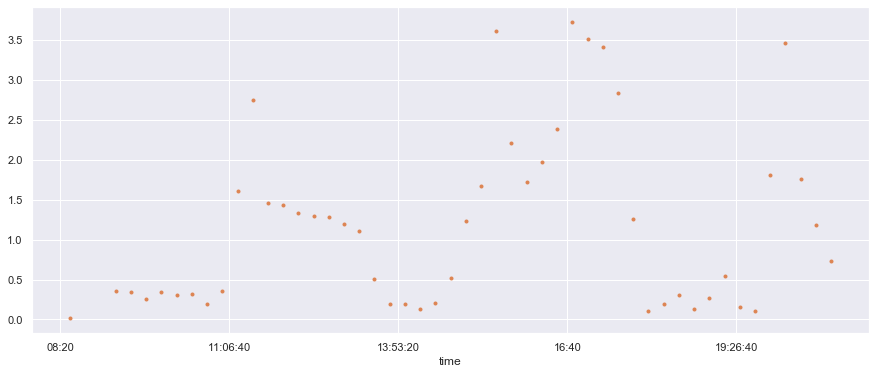

In [114]:
#Weekly with matplotlib sorting dates in correct order
import matplotlib.pyplot as plt
from datetime import time
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
sns.set(style="darkgrid")


# df_sub.sort_values(by='datess')
# df_sub.head()
# all_dates = set(df_sub['datess'])#Getting all dates
# all_detes=sorted(all_dates)
# all_date_list = list(sorted(all_dates))

pd.plotting.register_matplotlib_converters()
# df_temp.plot(x = "DatenTime", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
i = 0
fig, ax = plt.subplots(figsize=(25,15))#figsize=(15,15)
markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
i=0
for date in strdate:
    df = df_sub1.loc[date]
#     plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date+"='{0}'".format(markers[i]))
    plt.plot(df['NewTime'],df['Mean'],markers[i],label=date)
    i=i+1   
    if i % 7==0:
        i = 0
        print(date)
#         plt.plot(df['NewTime'],df['Mean'], label='Mean', linestyle='--',c='darkgrey')
#         datenums=md.date2num(date)
        plt.xticks( rotation=25 )
#         ax=plt.gca()
#         xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
#         ax.xaxis.set_major_formatter(xfmt)
        ax.set_xlim([date+" 00:00:00", date+" 23:59:59"])

#         ax.set_xlim(["00:00:00", "23:59:59"])
        plt.title("EDA (week="+str(date)+")",fontsize=20)
#         plt.title("Skin Temperature (Month="+str(date.strftime("%B"))+")",fontsize=20)
        
        hours = mdates.HourLocator(interval = 1)
        h_fmt = mdates.DateFormatter('%H:%M:%S')
        ax.xaxis.set_major_locator(hours)
        ax.xaxis.set_major_formatter(h_fmt)
        ax.set_ylabel('EDA')
        ax.set_xlabel('Time')
        fig.autofmt_xdate()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         plt.grid(linestyle='--', alpha=0.5)
       
#         plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
#         plt.legend()
#         fig.tight_layout()
#         fig.savefig('test.pdf')
#         plt.savefig("Migraine_Plots/EDA/weekly_eda/week="+str(date)+""+".png",bbox_inches="tight")
        plt.show()  
        


In [ ]:
#monthly with matplotlib sorting dates in correct order
import matplotlib.pyplot as plt
from datetime import time
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
sns.set(style="darkgrid")


# df_sub.sort_values(by='datess')
# df_sub.head()
# all_dates = set(df_sub['datess'])#Getting all dates
# all_detes=sorted(all_dates)
# all_date_list = list(sorted(all_dates))

pd.plotting.register_matplotlib_converters()
# df_temp.plot(x = "DatenTime", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
i = 0
fig, ax = plt.subplots()#figsize=(15,15)
markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
i=0
for date in strdate:
    df = df_sub1.loc[date]
#     plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date+"='{0}'".format(markers[i]))
    plt.plot(df['NewTime'],df['EDA'],'o')
    i=i+1   
    if i % 90==0:
        i = 0
        print(date)
#         plt.plot(df['NewTime'],df['Mean'], label='Mean', linestyle='--',c='darkgrey')
#         datenums=md.date2num(date)
        plt.xticks( rotation=25 )
        ax=plt.gca()
#         xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
#         ax.xaxis.set_major_formatter(xfmt)
        ax.set_xlim(["00:00:00", "23:59:59"])
        plt.title("EDA",fontsize=20)
#         plt.title("EDA (week="+str(date)+")",fontsize=20)
#         plt.title("Skin Temperature (Month="+str(date.strftime("%B"))+")",fontsize=20)
        
#         hours = mdates.HourLocator(interval = 1)
#         h_fmt = mdates.DateFormatter('%H:%M:%S')
#         ax.xaxis.set_major_locator(hours)
#         ax.xaxis.set_major_formatter(h_fmt)
        ax.set_ylabel('EDA')
        ax.set_xlabel('Time')
#         fig.autofmt_xdate()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         plt.grid(linestyle='--', alpha=0.5)
       
#         plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
#         plt.legend()
#         fig.tight_layout()
#         fig.savefig('test.pdf')
        plt.savefig("Migraine_Plots/EDA/monthly_eda/3months="+str(date)+""+".png",bbox_inches="tight")
        plt.show()  
        


In [15]:
import numpy
import cvxEDA
# import matplotlib as plt
import matplotlib.pyplot as plt
#  r: phasic component
#        p: sparse SMNA driver of phasic component
#        t: tonic component
#        l: coefficients of tonic spline
#        d: offset and slope of the linear drift term
#        e: model residuals
#        obj: value of objective function being minimized (eq 15 of paper)
#     """
# 2017-6-18
df_eda.drop('time_stamp', axis=1, inplace=True)

df_eda.head()
y1=df_eda.loc['2017-05-19']



[[0.106293]
 [0.106293]
 [0.106293]
 ...
 [0.008964]
 [0.008964]
 [0.007684]]


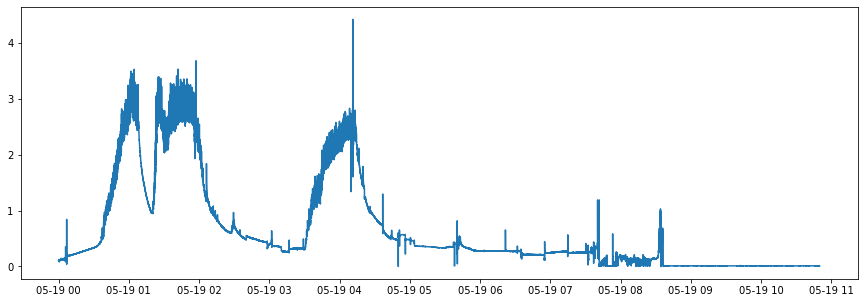

In [22]:
x=y1.loc['2017-05-19']
plt.plot(y1.index,y1.values)
print(x.values)
y=x

     pcost       dcost       gap    pres   dres
 0: -7.7644e+04 -7.7426e+04  2e+05  5e+02  2e-01
 1: -7.7547e+04 -9.4870e+04  2e+04  4e+01  2e-02
 2: -7.7586e+04 -8.2580e+04  5e+03  9e+00  4e-03
 3: -7.7577e+04 -8.0360e+04  3e+03  4e+00  2e-03
 4: -7.7581e+04 -7.9226e+04  2e+03  2e+00  8e-04
 5: -7.7572e+04 -7.8975e+04  1e+03  1e+00  6e-04
 6: -7.7606e+04 -7.8313e+04  7e+02  5e-01  3e-04
 7: -7.7608e+04 -7.8211e+04  6e+02  4e-01  2e-04
 8: -7.7697e+04 -7.7938e+04  2e+02  1e-01  6e-05
 9: -7.7792e+04 -7.7866e+04  7e+01  3e-02  1e-05
10: -7.7819e+04 -7.7858e+04  4e+01  1e-02  6e-06
11: -7.7831e+04 -7.7855e+04  2e+01  8e-03  4e-06
12: -7.7840e+04 -7.7853e+04  1e+01  3e-03  2e-06
13: -7.7846e+04 -7.7852e+04  7e+00  1e-03  5e-07
14: -7.7849e+04 -7.7852e+04  3e+00  4e-04  2e-07
15: -7.7850e+04 -7.7851e+04  1e+00  8e-05  4e-08
16: -7.7851e+04 -7.7851e+04  6e-01  3e-05  1e-08
17: -7.7851e+04 -7.7851e+04  2e-01  8e-06  4e-09
18: -7.7851e+04 -7.7851e+04  9e-02  1e-06  6e-10
19: -7.7851e+04 -7.78

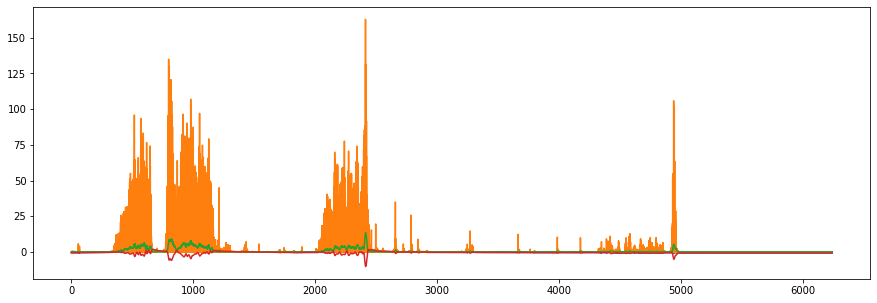

In [28]:
import cvxEDA
y=x.to_numpy()
yn = (y - y.mean()) / y.std()
Fs = 25.
[r, p, t, l, d, e, obj] = cvxEDA.cvxEDA(yn, 1./Fs)
import pylab as pl
tm = pl.arange(1., len(y)+1.) / Fs
# pl.hold(True)
pl.plot(tm, yn)
pl.plot(tm, p)
pl.plot(tm, r)

pl.plot(tm, t)
pl.show()

(-5, 5)

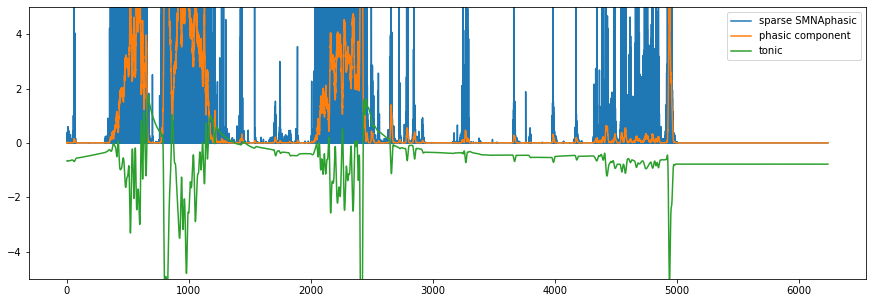

In [31]:

# # # print(y.loc['2017-06-18 00:00'])
# yn = (y - y.mean()) / y.std()
# Fs = 25.
# [r, p, t, l, d, e, obj] = cvxEDA.cvxEDA(yn, 1./Fs)
# import pylab as pl
# tm = pl.arange(1., len(y)+1.) / Fs
# print(tm)
plt.plot(tm,p,label="sparse SMNAphasic")


plt.plot(tm,r,label="phasic component")
plt.plot(tm,t,label="tonic")
# plt.plot(tm,l,label="coefficient")
# plt.plot(tm,d,label="offset of slope")
# # plt.plot(tm,e,label="model residual")
plt.legend()
plt.ylim([-5,5])
# plt.xlim([7500,10000])
# plt.show()
# pl.hold(True
# plt.savefig("phasic+tonic"+".png",bbox_inches="tight")
# plt.plot(tm, yn)
# plt.plot(tm, r)
# plt.plot(tm, p)
# plt.plot(tm, t)
# plt.show()

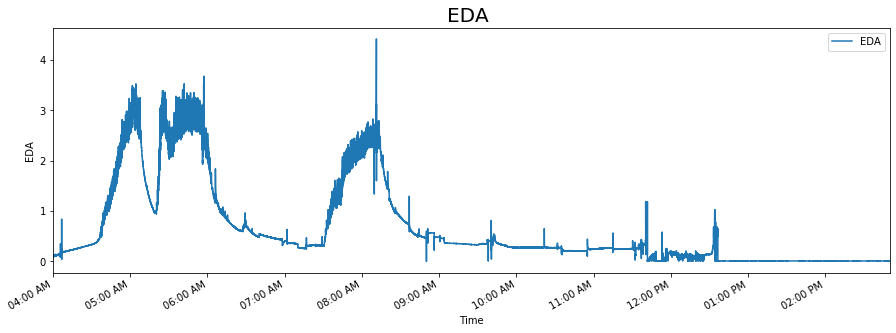

In [30]:
import matplotlib.dates as mdates
# fig, ax = plt.subplots()#figsize=(15,15)
ax=x.plot()
# hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%I:%M %p')
# ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
ax=plt.gca()
#     ax.set_xticklabels(tickstime)
plt.title("EDA ",fontsize=20)
ax.set_ylabel('EDA')
ax.set_xlabel('Time')
plt.savefig("original"+".png",bbox_inches="tight")

In [ ]:


#monthly with matplotlib sorting dates in correct order
import matplotlib.pyplot as plt
from datetime import time
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
# sns.set(style="darkgrid")
df_sub = df_eda[['datess','NewTime','EDA','mean_total']]

df_sub.sort_values(by='datess')
df_sub.head()
all_dates = set(df_sub['datess'])#Getting all dates
all_detes=sorted(all_dates)
all_date_list = list(sorted(all_dates))

pd.plotting.register_matplotlib_converters()
# df_temp.plot(x = "DatenTime", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
i = 0
# fig, ax = plt.subplots(figsize=(25,15))#figsize=(15,15)
markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
i=0
df_temp.head(5)
for date in all_date_list:
    df = df_sub[df_sub.datess == date]
#     plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date+"='{0}'".format(markers[i]))
    plt.plot(df['NewTime'],df['EDA'],'o')
    i=i+1   
    if i % 30==0:
        i = 0
        print(date)
        plt.plot(df['NewTime'],df['mean_total'], label='Mean', linestyle='--',c='darkgrey')
#         datenums=md.date2num(date)
        plt.xticks( rotation=25 )
        ax=plt.gca()
#         xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
#         ax.xaxis.set_major_formatter(xfmt)
        ax.set_xlim(["00:00:00", "23:59:59"])
        plt.title("EDA (month="+str(date.strftime("%B"))+")",fontsize=20)
#         plt.title("Skin Temperature (Month="+str(date.strftime("%B"))+")",fontsize=20)
        
#         hours = mdates.HourLocator(interval = 1)
#         h_fmt = mdates.DateFormatter('%H:%M:%S')
#         ax.xaxis.set_major_locator(hours)
#         ax.xaxis.set_major_formatter(h_fmt)
        ax.set_ylabel('EDA')
        ax.set_xlabel('Time')
        fig.autofmt_xdate()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         plt.grid(linestyle='--', alpha=0.5)
       
#         plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
#         plt.legend()
#         fig.tight_layout()
#         fig.savefig('test.pdf')
        plt.savefig("monthly_eda/="+str(date)+""+".png",bbox_inches="tight")
        plt.show()  
        


###### Daily EDA Plots

In [ ]:
# #daily with matplotlib sorting dates in correct order
import matplotlib.pyplot as plt
from datetime import time
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
# sns.set(style="darkgrid")
df_sub = df_eda[['datess','NewTime','EDA','mean_total']]

df_sub.sort_values(by='datess')
df_sub.head()
all_dates = set(df_sub['datess'])#Getting all dates
all_detes=sorted(all_dates)
all_date_list = list(sorted(all_dates))

pd.plotting.register_matplotlib_converters()
# df_temp.plot(x = "DatenTime", y = "TEMP",ax = ax, use_index =True, label = date,marker = 'o', rot=90)
i = 0
# fig, ax = plt.subplots(figsize=(25,15))#figsize=(15,15)
markers=['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']
i=0
df_temp.head(5)
for date in all_date_list:
    df = df_sub[df_sub.datess == date]
#     plt.plot(df['NewTime'],df['TEMP'],markers[i],label=date+"='{0}'".format(markers[i]))
    plt.plot(df['NewTime'],df['EDA'],'o',c='red',label=str(date))
    i=i+1   
    if i % 1==0:
        i = 0
        print(date)
        plt.plot(df['NewTime'],df['mean_total'], label='Mean', linestyle='--',c='darkgrey')
#         datenums=md.date2num(date)
        plt.xticks( rotation=25 )
        ax=plt.gca()
#         xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
#         ax.xaxis.set_major_formatter(xfmt)
        ax.set_xlim(["00:00:00", "23:59:59"])
        plt.title("EDA (Day="+str(date.strftime("%A"))+")",fontsize=20)
#         plt.title("Skin Temperature (Month="+str(date.strftime("%B"))+")",fontsize=20)
        
#         hours = mdates.HourLocator(interval = 1)
#         h_fmt = mdates.DateFormatter('%H:%M:%S')
#         ax.xaxis.set_major_locator(hours)
#         ax.xaxis.set_major_formatter(h_fmt)
        ax.set_ylabel('EDA')
        ax.set_xlabel('Time')
        fig.autofmt_xdate()
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#         plt.grid(linestyle='--', alpha=0.5)
       
#         plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
#         plt.legend()
#         fig.tight_layout()
#         fig.savefig('test.pdf')
        plt.savefig("daily_eda/Date="+str(date)+""+".png",bbox_inches="tight")
        plt.show()  
        


# Heart Rate

In [ ]:
# #Reading HR Data
# df_hr = get_all_data(dict_vars['HR'])
# df_hr.reset_index(inplace=True,drop=True)

In [ ]:
# #Decribing Content of HR
# print("\nInitially Data Size: " , df_hr.shape,"\n")
# print("Diplaying top 10 values: ")
# print(df_hr.head(10 
# df_hr.describe()

In [ ]:
# #Displaying Bar Graph of Count
# display_frequency_bar_chart(df_hr['HR'],"Heart Rate (Hz)","Count")
# print("Data Size" + str(df_hr.shape))
# df_hr.describe()

# BVP

In [ ]:
# #Reading BVP Data
# df_bvp = get_all_data(dict_vars['BVP'])
# df_bvp.reset_index(inplace=True,drop=True)

In [ ]:
# #Decribing Content of BVP
# print("\nInitially Data Size: " , df_bvp.shape,"\n")
# print("Diplaying top 10 values: ")
# print(df_bvp.head(10))
# df_bvp.describe()

In [ ]:
# #Displaying Bar Graph of Count
# display_frequency_bar_chart(df_hr['HR'],"Heart Rate (Hz)","Count")
# print("Data Size" + str(df_hr.shape))
# df_bvp.describe()

# Accelerometer

In [ ]:
# #Reading Accelerometer Data
# df_bvp = get_all_data(dict_vars['BVP'])
# df_bvp.reset_index(inplace=True,drop=True)